## <a id='toc1_'></a>[Top Zip Codes For Investment](#toc0_)

### <a id='toc1_1_1_'></a>[Final Project Phase 4 Group 2 Members](#toc0_)
* Emmanuel Kiprotich
* Winnie Onduru
* Denis Sang
* Phelix Okumu
* Hellen Mwangi
* Ismail Ibrahim
* Sheila Machaha

  ### <a id='toc1_2_1_'></a>[Executive Summary](#toc0_)



## <a id='toc1_2_'></a>[Step 1 : Business Understanding](#toc0_)

  ### <a id='toc1_2_1_'></a>[1.1 Background](#toc0_)

In a constantly evolving real estate landscape, various elements, including economic shifts, population dynamics, market emotions, and regulatory shifts, converge to shape market trends. Acknowledging this complexity, the Kar-Dak Investment Group acknowledges the strategic advantage of harnessing data science methodologies to proactively uncover lucrative investment prospects.

### <a id='toc1_2_3_'></a>[1.2 Business Problem](#toc0_)



Property investment offers multiple revenue streams including leasing income and asset growth, and provides benefits such as passive income and portfolio diversification, which makes it an attractive option for many investors. However, the critical issue at hand is identifying optimal locations for real estate investment. The primary objective of this project is to facilitate informed real estate investment decisions for the Kar-Dak Investment Group. By leveraging the extensive Zillow housing dataset, which spans from April 1996 to April 2018, the project aims to identify the top 5 most favorable zip codes for potential investment opportunities.

### <a id='toc1_2_4_'></a>[1.3 Project Question](#toc0_)

This Project aims at answering the question:

1. What are the top 5 best zipcode for the Kar-Dak Investments to consider?

### <a id='toc1_2_5_'></a>[1.4 Objectives](#toc0_)

1. To identify the top 5 zip codes with the highest ROI.

2. To develop time series models to forecast real estate prices for different zip codes over various time horizons.

3. To establish cities that are optimal for both short-term and long-term investment


## <a id='toc1_3_'></a>[Step 2.Data Understanding](#toc0_)

In this section, we will do the following to get more insights about our dataset before proceeding to subsequent steps.
1. Import the Libraries
2. Load and Explore the Time Series Data
3. Inspect the Data Types
4. Inspect the column values



> ### <a id='toc1_3_3'></a>[2.1 Summary Of The Dataset](#toc0_)




The key columns in the dataset are as follows:

RegionID - This is unique Id for the Regions.

SizeRank - This is the ranking done based on the size of the Region.

RegionName - This field contains the zip code of the Region.

RegionType - Type of Region is Zip.

StateName - State.

City - This column provide the specific City Name of Housing Data.

Metro - This provide the name of the metro city around that Region.

County Name - This is the County Name for that Region.

Months Column - These Columns contains the prices of Region for every month.

By analyzing this dataset, we can gain a comprehensive understanding of the top five most promising real estate investment zip code areas.

The dataset covers a significant time period (April 1996 to April 2018), allowing for the exploration of long-term trends and capturing various market conditions. It provides a valuable resource for conducting time series analysis and developing predictive models to forecast future stock prices


> ### <a id='toc1_3_1'></a>[2.2 Importing Necessary Packages](#toc0_)

In the cell below import various libraries.

In [ ]:
pip install pmdarima

In [ ]:
#Importing the libraries to use
import pandas as pd
import numpy as np
import pmdarima as pm
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import folium
import numpy as np
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.dates as mdates
import math
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf



> ### <a id='toc1_3_2'></a>[2.3 Loading and Exploring the Dataset](#toc0_)



Below cell loads the csv file of zillow dataset, using a read_csv method, as a dataframe and saving it in a variable df, for purposes of subsequent work.

In [ ]:
#Loading dataset into pandas DataFrame
df = pd.read_csv('zillow_data.csv')

The following code cell does a general view of the df, checking on top5 and bottom 5 of the df with a general indication of number of rows and columns at the bottom

In [ ]:
# viewing df
df.head()


RegionID  RegionName      City State              Metro CountyName  \
0     84654       60657   Chicago    IL            Chicago       Cook   
1     90668       75070  McKinney    TX  Dallas-Fort Worth     Collin   
2     91982       77494      Katy    TX            Houston     Harris   
3     84616       60614   Chicago    IL            Chicago       Cook   
4     93144       79936   El Paso    TX            El Paso    El Paso   

   SizeRank   1996-04   1996-05   1996-06  ...  2017-07  2017-08  2017-09  \
0         1  334200.0  335400.0  336500.0  ...  1005500  1007500  1007800   
1         2  235700.0  236900.0  236700.0  ...   308000   310000   312500   
2         3  210400.0  212200.0  212200.0  ...   321000   320600   320200   
3         4  498100.0  500900.0  503100.0  ...  1289800  1287700  1287400   
4         5   77300.0   77300.0   77300.0  ...   119100   119400   120000   

   2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
0  1009600  1013300  1018700  1024400  1030700  1033800  1030600  
1   314100   315000   316600   318100   319600   321100   321800  
2   320400   320800   321200   321200   323000   326900   329900  
3  1291500  1296600  1299000  1302700  1306400  1308500  1307000  
4   120300   120300   120300   120300   120500   121000   121500  

[5 rows x 272 columns]

In [ ]:
df.tail()

RegionID  RegionName                 City State            Metro  \
14718     58333        1338             Ashfield    MA  Greenfield Town   
14719     59107        3293            Woodstock    NH        Claremont   
14720     75672       40404                Berea    KY         Richmond   
14721     93733       81225  Mount Crested Butte    CO              NaN   
14722     95851       89155             Mesquite    NV        Las Vegas   

      CountyName  SizeRank   1996-04   1996-05   1996-06  ...  2017-07  \
14718   Franklin     14719   94600.0   94300.0   94000.0  ...   216800   
14719    Grafton     14720   92700.0   92500.0   92400.0  ...   202100   
14720    Madison     14721   57100.0   57300.0   57500.0  ...   121800   
14721   Gunnison     14722  191100.0  192400.0  193700.0  ...   662800   
14722      Clark     14723  176400.0  176300.0  176100.0  ...   333800   

       2017-08  2017-09  2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  \
14718   217700   218600   218500   218100   216400   213100   209800   209200   
14719   208400   212200   215200   214300   213100   213700   218300   222700   
14720   122800   124600   126700   128800   130600   131700   132500   133000   
14721   671200   682400   695600   695500   694700   706400   705300   681500   
14722   336400   339700   343800   346800   348900   350400   353000   356000   

       2018-04  
14718   209300  
14719   225800  
14720   133400  
14721   664400  
14722   357200  

[5 rows x 272 columns]

In [ ]:
#Checking on the shape of the dataset
df.shape

(14723, 272)

From above preview of df DataFrame, it is evident that the df has 14723 rows and 272 columns. The data is in a wide Format, evident by having columns 8 onwards being with dates. We will need to convert this to a long format where we will have time represented by a single column with another column representing value.

In [ ]:
# Checking the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In general, the dataset we are using has the below attributes:

The dataframe has a total of 14723 entries, indexed from 0 to 14722 and a total of 272 Columns.
The dataset contains three main data types:

* 219 columns with the floating point numbers data type.
* 49 columns with the integer data type.
* 4 columns with the object data type.
And it consumes approximately 30.6 megabytes of memory.

In [ ]:
# checking descriptive statistics of the df dataset

df.describe()

RegionID    RegionName      SizeRank       1996-04       1996-05  \
count   14723.000000  14723.000000  14723.000000  1.368400e+04  1.368400e+04   
mean    81075.010052  48222.348706   7362.000000  1.182991e+05  1.184190e+05   
std     31934.118525  29359.325439   4250.308342  8.600251e+04  8.615567e+04   
min     58196.000000   1001.000000      1.000000  1.130000e+04  1.150000e+04   
25%     67174.500000  22101.500000   3681.500000  6.880000e+04  6.890000e+04   
50%     78007.000000  46106.000000   7362.000000  9.950000e+04  9.950000e+04   
75%     90920.500000  75205.500000  11042.500000  1.432000e+05  1.433000e+05   
max    753844.000000  99901.000000  14723.000000  3.676700e+06  3.704200e+06   

            1996-06       1996-07       1996-08       1996-09       1996-10  \
count  1.368400e+04  1.368400e+04  1.368400e+04  1.368400e+04  1.368400e+04   
mean   1.185374e+05  1.186531e+05  1.187803e+05  1.189275e+05  1.191205e+05   
std    8.630923e+04  8.646795e+04  8.665094e+04  8.687208e+04  8.715185e+04   
min    1.160000e+04  1.180000e+04  1.180000e+04  1.200000e+04  1.210000e+04   
25%    6.910000e+04  6.920000e+04  6.937500e+04  6.950000e+04  6.960000e+04   
50%    9.970000e+04  9.970000e+04  9.980000e+04  9.990000e+04  9.995000e+04   
75%    1.432250e+05  1.432250e+05  1.435000e+05  1.437000e+05  1.439000e+05   
max    3.729600e+06  3.754600e+06  3.781800e+06  3.813500e+06  3.849600e+06   

       ...       2017-07       2017-08       2017-09       2017-10  \
count  ...  1.472300e+04  1.472300e+04  1.472300e+04  1.472300e+04   
mean   ...  2.733354e+05  2.748658e+05  2.764646e+05  2.780332e+05   
std    ...  3.603984e+05  3.614678e+05  3.627563e+05  3.644610e+05   
min    ...  1.440000e+04  1.450000e+04  1.470000e+04  1.480000e+04   
25%    ...  1.269000e+05  1.275000e+05  1.282000e+05  1.287000e+05   
50%    ...  1.884000e+05  1.896000e+05  1.905000e+05  1.914000e+05   
75%    ...  3.050000e+05  3.066500e+05  3.085000e+05  3.098000e+05   
max    ...  1.888990e+07  1.870350e+07  1.860530e+07  1.856940e+07   

            2017-11       2017-12       2018-01       2018-02       2018-03  \
count  1.472300e+04  1.472300e+04  1.472300e+04  1.472300e+04  1.472300e+04   
mean   2.795209e+05  2.810953e+05  2.826571e+05  2.843687e+05  2.865114e+05   
std    3.656003e+05  3.670454e+05  3.695727e+05  3.717739e+05  3.724612e+05   
min    1.450000e+04  1.430000e+04  1.410000e+04  1.390000e+04  1.380000e+04   
25%    1.292500e+05  1.299000e+05  1.306000e+05  1.310500e+05  1.319500e+05   
50%    1.925000e+05  1.934000e+05  1.941000e+05  1.950000e+05  1.967000e+05   
75%    3.117000e+05  3.134000e+05  3.151000e+05  3.168500e+05  3.188500e+05   
max    1.842880e+07  1.830710e+07  1.836590e+07  1.853040e+07  1.833770e+07   

            2018-04  
count  1.472300e+04  
mean   2.880399e+05  
std    3.720544e+05  
min    1.380000e+04  
25%    1.324000e+05  
50%    1.981000e+05  
75%    3.211000e+05  
max    1.789490e+07  

[8 rows x 268 columns]

In [ ]:
# Checking the null values in the dataset by percentage of total values
# Calculate the percentage of null values for each column and get the top 30 based on the computed percentages.


top_null_columns = (df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False).head(20)

# Display the top 20 columns with the highest percentage of null values
print("Top 20 Columns with Highest Percentage of Null Values:")
for column, percentage in top_null_columns.items():
    print(f"{column}: {percentage:.2f}%")

Top 20 Columns with Highest Percentage of Null Values:
Metro: 7.08%
1997-04: 7.06%
1996-08: 7.06%
1997-06: 7.06%
1997-05: 7.06%
1997-03: 7.06%
1997-02: 7.06%
1997-01: 7.06%
1996-11: 7.06%
1996-10: 7.06%
1996-09: 7.06%
1996-12: 7.06%
1996-07: 7.06%
1996-05: 7.06%
1996-04: 7.06%
1996-06: 7.06%
1997-08: 7.05%
1997-12: 7.05%
1997-11: 7.05%
1997-10: 7.05%


* Based on the above analysis Metro column has the highest percentage of null values at 7.08% with the rest betweeen 7.06% and 7.05%

In [ ]:
# Checking for null values in the first 7 columns
# Assuming df is your DataFrame

null_counts = df.iloc[:, :7].isnull().sum()

print("Null Value Counts in the First 7 Columns:")
print(null_counts)

Null Value Counts in the First 7 Columns:
RegionID         0
RegionName       0
City             0
State            0
Metro         1043
CountyName       0
SizeRank         0
dtype: int64


* It is noted that the Metro column has the highest number of null values with 1,043, which was previously captured to be 7.08%

In [ ]:
#Checking on the duplicates
df.duplicated().sum()

0

It is noted that the dataset have no duplicated datapoints

## <a id='toc1_3_'></a>[3 Reshape from Wide to Long Format](#toc0_)


Within this section, a transformation is executed on the data, transitioning it from a wide format to a long format. Furthermore, supplementary columns are incorporated into the dataset. These newly added columns encompass two vital metrics: percentage Return on Investment (ROI) and ROI in terms of price

In [ ]:
# Creating a Column of %ROI

df["%ROI"] = ((df["2018-04"] / df["2009-01"]) ** (1 / (2018-2009)) - 1) * 100
df["%ROI"]

0        2.596098
1        5.287075
2        3.281773
3        2.296917
4       -0.009141
           ...   
14718    1.039444
14719    0.921918
14720    2.416872
14721    0.329810
14722    2.923535
Name: %ROI, Length: 14723, dtype: float64

In [ ]:
# Creating a Column of Actual ROI
df['ROIPrice'] = df["2018-04"] - df["2009-01"] - 1
df.ROIPrice

0        212299.0
1        119399.0
2         83199.0
3        241599.0
4          -101.0
           ...   
14718     18599.0
14719     17899.0
14720     25799.0
14721     19399.0
14722     81599.0
Name: ROIPrice, Length: 14723, dtype: float64

The newly created %ROI

In [ ]:
# Convert Wide Format to Long format and checking on the first five rows
data = pd.melt(df,
               id_vars=['RegionID','RegionName', 'SizeRank', 'City', 'State', 'Metro', 'CountyName','%ROI','ROIPrice'],
               var_name='Date')

# rename RegionID to zipcode
data = data.rename(columns={'RegionName': 'Zipcode','value':'Price'})

#convert zipcode to categorical datatype
data['Zipcode'] = data['Zipcode'].astype('str')

# convert date to datetime
data['Date'] = pd.to_datetime(data['Date'],format='%Y-%m')

data.head()

RegionID Zipcode  SizeRank      City State              Metro CountyName  \
0     84654   60657         1   Chicago    IL            Chicago       Cook   
1     90668   75070         2  McKinney    TX  Dallas-Fort Worth     Collin   
2     91982   77494         3      Katy    TX            Houston     Harris   
3     84616   60614         4   Chicago    IL            Chicago       Cook   
4     93144   79936         5   El Paso    TX            El Paso    El Paso   

       %ROI  ROIPrice       Date     Price  
0  2.596098  212299.0 1996-04-01  334200.0  
1  5.287075  119399.0 1996-04-01  235700.0  
2  3.281773   83199.0 1996-04-01  210400.0  
3  2.296917  241599.0 1996-04-01  498100.0  
4 -0.009141    -101.0 1996-04-01   77300.0

In [ ]:
#Checking On the Shape of the Long Format
data.shape

(3901595, 11)

The applied process led to a substantial transformation in the dataset's structure. The original row count of 14,723 experienced a remarkable expansion, reaching approximately 3.9 million rows.

Simultaneously, the dataset's width underwent a significant reduction, with the number of columns shrinking from 272 to just 11.

In [ ]:
#Checking for Duplicates Within the Dataset
print(f'The number of duplicates within the dataset is : {data.duplicated().sum()}')

The number of duplicates within the dataset is : 0


The above cell shows there is No Duplicated Value in the Dataset.

In [ ]:
# Checking For Missing Values in Terms of Percentage
data.isna().sum()/len(data)*100

RegionID      0.000000
Zipcode       0.000000
SizeRank      0.000000
City          0.000000
State         0.000000
Metro         7.084154
CountyName    0.000000
%ROI          3.986959
ROIPrice      3.986959
Date          0.000000
Price         4.021202
dtype: float64

The analysis revealed that the "Metro" column stands out with the highest occurrence of null values, constituting 7% of the total dataset. In contrast, other columns exhibit null values of less than 4%, suggesting a relatively minor impact on our analytical process.

Nonetheless, our chosen approach involves remedying the null values in the "Metro" column by filling them with the string "missing." This strategy is elaborated further in the following cell.

In [ ]:
# Filling Missing Values in the metro column with "missing"
data['Metro'].fillna('Missing',inplace = True)

In [ ]:
# Recheck for Missing Values
data.isna().sum()/len(data)*100

RegionID      0.000000
Zipcode       0.000000
SizeRank      0.000000
City          0.000000
State         0.000000
Metro         0.000000
CountyName    0.000000
%ROI          3.986959
ROIPrice      3.986959
Date          0.000000
Price         4.021202
dtype: float64

In [ ]:
# Checking on Descriptive Statistics of the Dataset
data.describe()

RegionID      SizeRank          %ROI      ROIPrice         Price
count  3.901595e+06  3.901595e+06  3.746040e+06  3.746040e+06  3.744704e+06
mean   8.107501e+04  7.362000e+03  2.078260e+00  6.260119e+04  2.076064e+05
std    3.193304e+04  4.250165e+03  2.060273e+00  1.624183e+05  2.400207e+05
min    5.819600e+04  1.000000e+00 -6.769992e+00 -5.328010e+05  1.130000e+04
25%    6.717400e+04  3.681000e+03  6.961308e-01  9.199000e+03  9.790000e+04
50%    7.800700e+04  7.362000e+03  1.989658e+00  2.829900e+04  1.476000e+05
75%    9.092100e+04  1.104300e+04  3.306184e+00  6.579900e+04  2.372000e+05
max    7.538440e+05  1.472300e+04  1.207663e+01  6.938599e+06  1.931490e+07

In [ ]:
#statistical description of categorical variables
data.describe(include=['object'])

Zipcode      City    State    Metro   CountyName
count   3901595   3901595  3901595  3901595      3901595
unique    14723      7554       51      702         1212
top       60657  New York       CA  Missing  Los Angeles
freq        265     30210   324360   276395        69960

In [ ]:
#Checking on the state column

data["State"].unique()

array(['IL', 'TX', 'NY', 'CA', 'FL', 'TN', 'NC', 'GA', 'DC', 'MO', 'OK',
       'AZ', 'NJ', 'MD', 'VA', 'WA', 'OH', 'MI', 'MA', 'KS', 'NM', 'CT',
       'NV', 'PA', 'CO', 'OR', 'IN', 'SC', 'KY', 'AR', 'ND', 'MN', 'AL',
       'DE', 'LA', 'MS', 'ID', 'MT', 'HI', 'WI', 'UT', 'ME', 'SD', 'WV',
       'IA', 'RI', 'NE', 'WY', 'AK', 'NH', 'VT'], dtype=object)

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)
# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

In [ ]:
import matplotlib.pyplot as plt

# Define a font configuration
font_config = {
    'family': 'sans-serif',  # You can try other font families as well
    'size': 10
}

# Update the font configuration for Matplotlib
plt.rc('font', **font_config)

# Your plotting code here
# ...

# Show the plot
plt.show()

We Use NY as Our Case Study

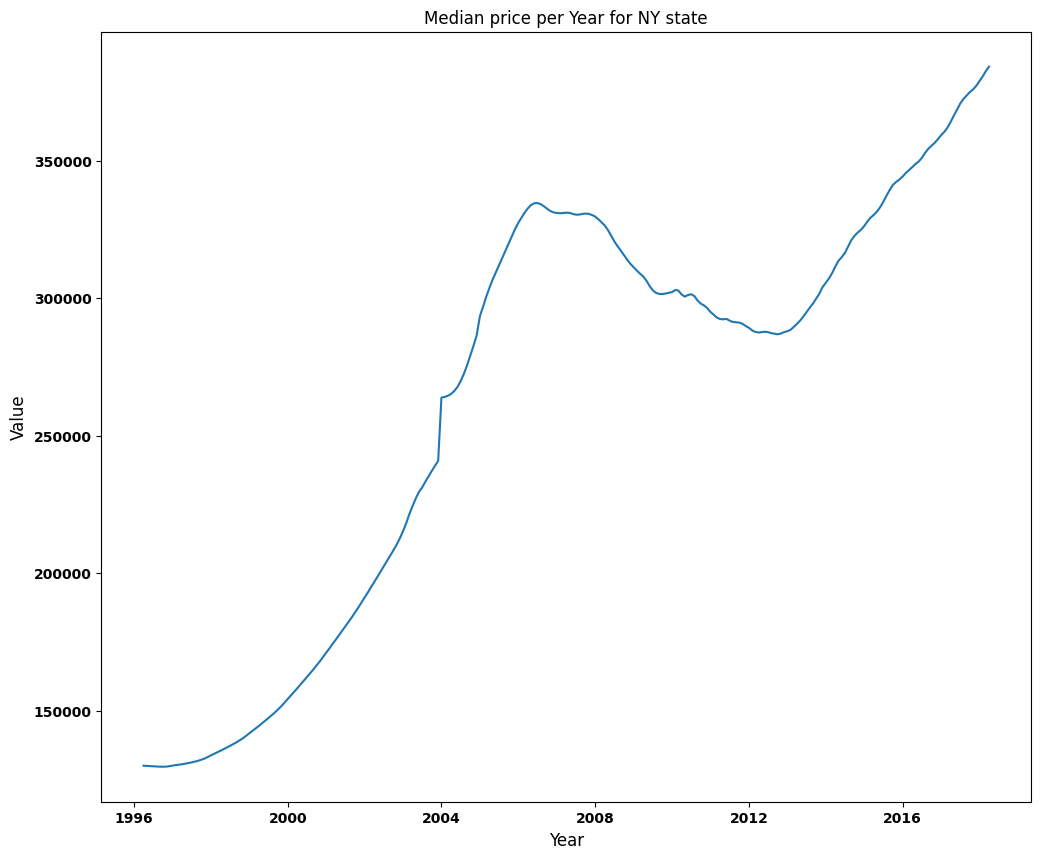

In [ ]:
# NY state
state_data = data[data['State'] == 'NY']
yearly_data = state_data.groupby('Date').agg({'Price': 'mean'})

# Plotting the median prices of washington DC over the years
plt.figure(figsize=(12,10))
plt.plot(yearly_data.index, yearly_data['Price'])

plt.title('Median price per Year for NY state',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Value',fontsize=12)
plt.show()

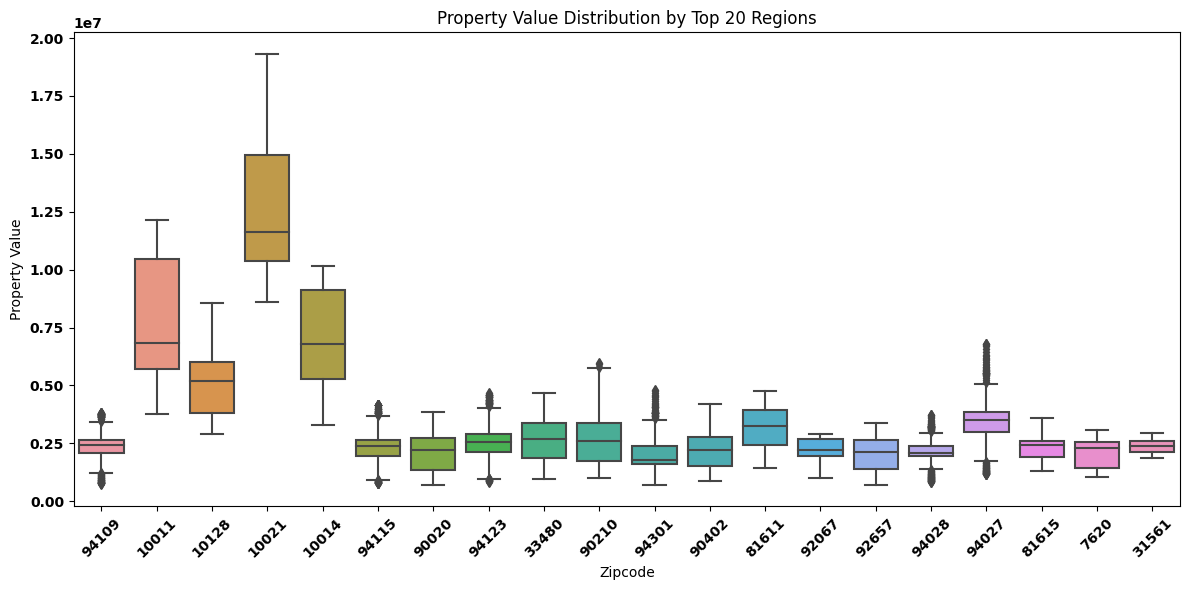

In [ ]:
# Checking For The Outlies

# Box plot
plt.figure(figsize=(12, 6))
top_regions = data.groupby('Zipcode')['Price'].mean().nlargest(20).index
top_data = data[data['Zipcode'].isin(top_regions)]
sns.boxplot(x='Zipcode', y='Price', data=top_data)
plt.title("Property Value Distribution by Top 20 Regions")
plt.xlabel("Zipcode")
plt.ylabel("Property Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The dataset potrays presence of outliers in some zipcodes however this may be a true representation of the prices in the affected locality

## <a id='toc1_4_'></a>[Step 4.Explotary Data Analysis and Visualization](#toc0_)


This section entails examining the relationship between variables using;
* Univariate analysis
* Bivariate analysis
* Multivariate analysis.




> ### <a id='toc1_4_1_'></a>[4.1 Univariate Analysis](#toc0_)


Univariate Analysis involves the study of individual variables in
isolation, focusing on their distribution and properties without considering the influence of other variables. This analytical approach provides a foundational understanding of the characteristics and behavior of a single variable.


>  **4.1.1 Top 10 Most Popular Counties**

The code below shows the top 10 most popular counties in the dataset

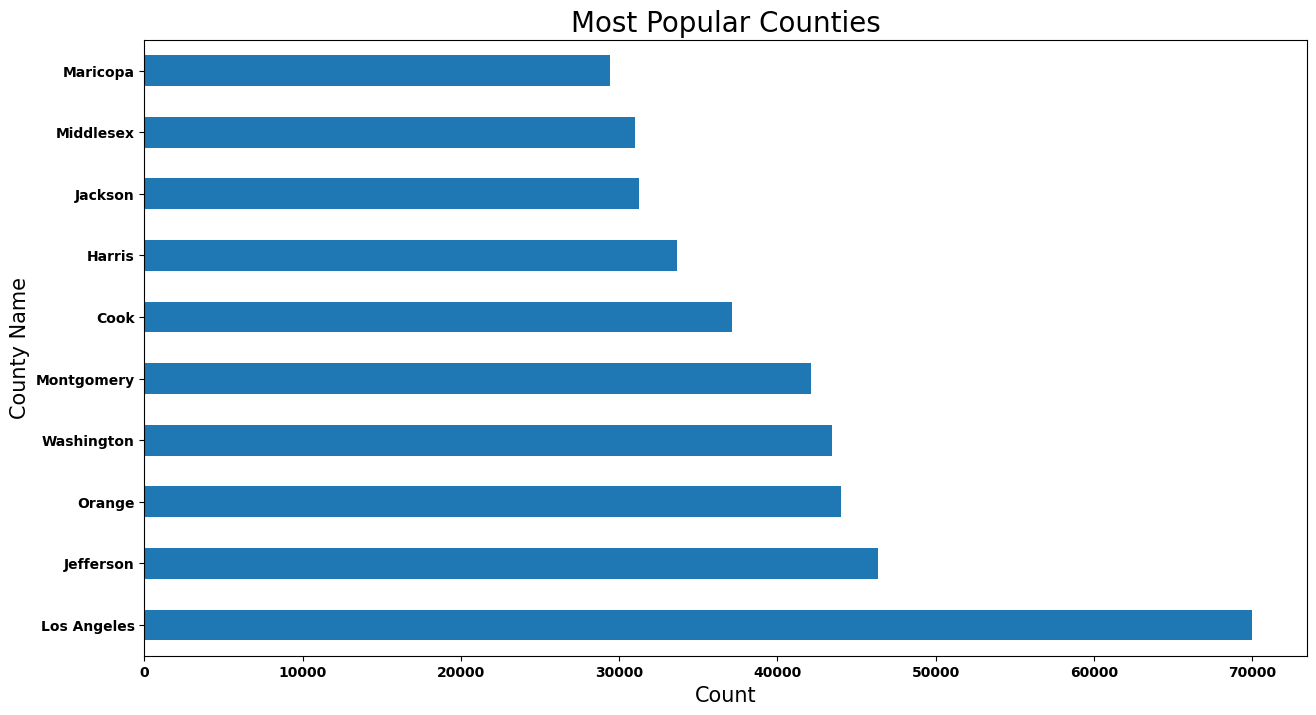

In [ ]:
# # plotting the most popular counties in the dataset
plt.figure(figsize=(15,8))
data.CountyName.value_counts()[:10].plot(kind="barh")
plt.xlabel("Count",fontsize=15)
plt.ylabel("County Name",fontsize=15)
plt.title("Most Popular Counties",fontsize=20);

Based on the bar graph above, this shows that Los Angeles is the most popular county with around 70000 zipcodes.Most of the other counties range between 30000 and 50000 zipcodes.



> **4.1.2 Top 10 Most Popular States**



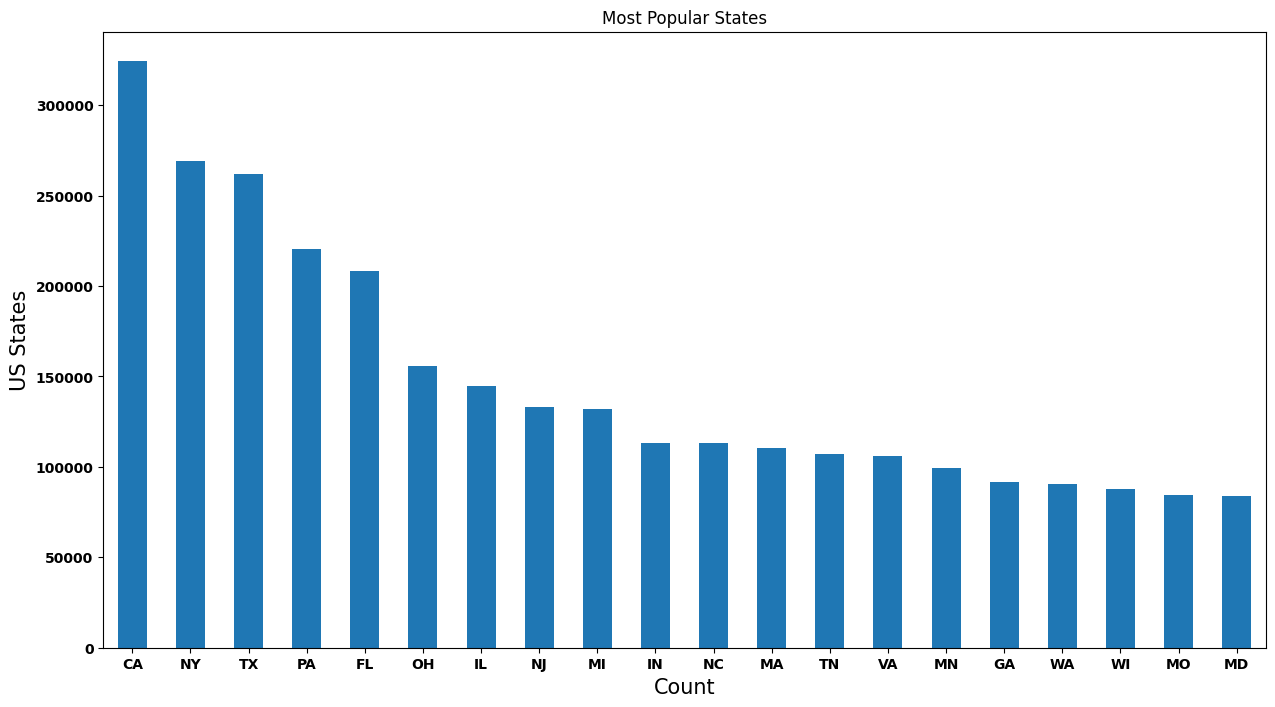

In [ ]:

# plotting the most popular states in the dataset
plt.figure(figsize=(15,8))
data.State.value_counts()[:20].plot(kind="bar")
plt.xlabel("Count",fontsize=15)
plt.ylabel("US States",fontsize=15)
plt.xticks(rotation=0)
plt.title("Most Popular States",fontsize=12);

* The above graph shows that CA is the most popular with above 300000 zipcodes
 followed NY with aound 270000, TA with aound 260000 and others ranges below  250000 zipcodes.



>  **4.1.3 The Most Popular Cities**



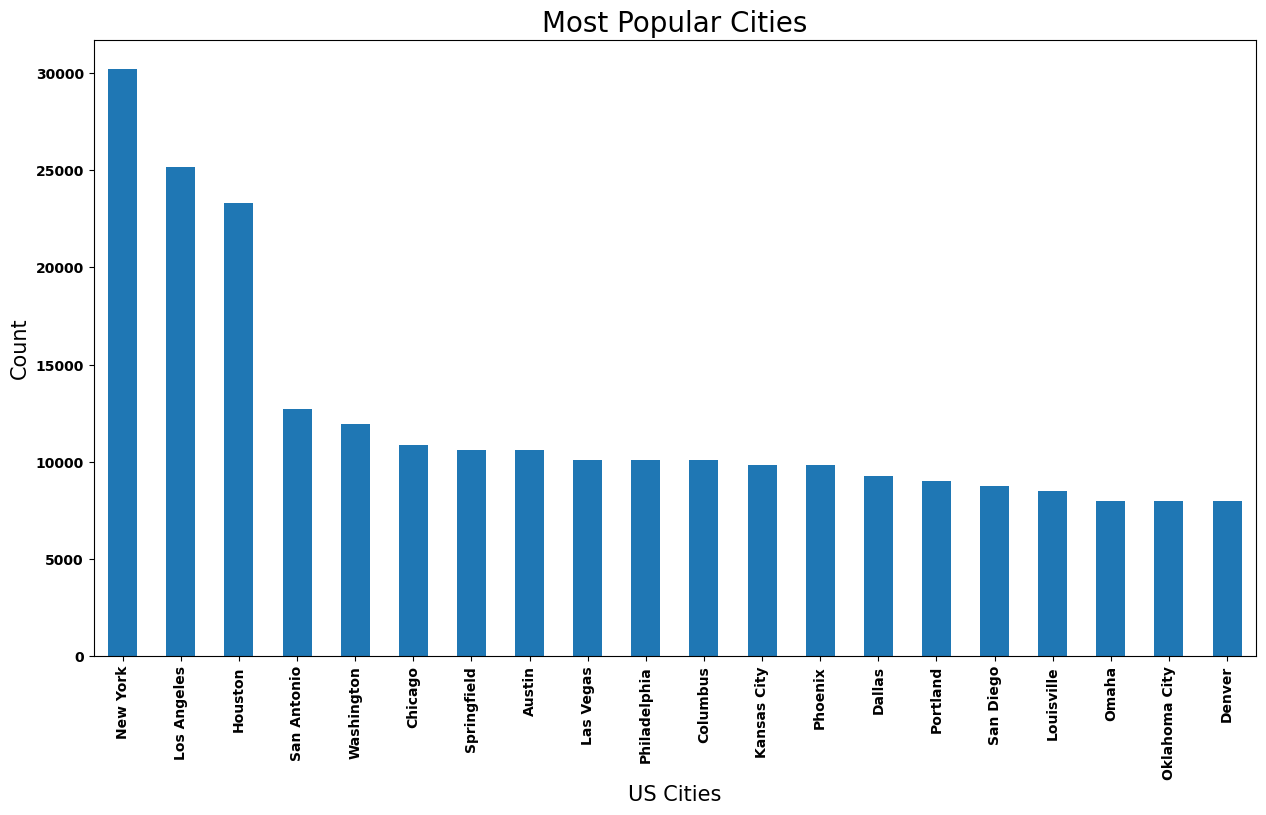

In [ ]:
# plotting the most popular cities in the dataset
plt.figure(figsize=(15,8))
data.City.value_counts()[:20].plot(kind="bar")
plt.xlabel("US Cities",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Most Popular Cities",fontsize=20);

* From the dataset we can deduce that New York City, Los Angeles, and Houston
  are the most popular cities with above 20000 zipcodes. Other cities lie below 15000 zipcodes



> **4.1.4 The Distribution of Price**



The cell below generates an histogram to check on the distribution of the price dataset

In [ ]:
# calculate the average profit margin for each city
df_avg_value = data.groupby('State').mean().reset_index()

# sort the cities by average profit margin in descending order
df_sorted_states = df_avg_value.sort_values('Price', ascending=False)

# select the top 20 cities by average profit margin
top_states = df_sorted_states['State'].head(20)

# filter the DataFrame to include only the top 20 cities
df_top_states = data[data['State'].isin(top_states)].groupby("State").mean().sort_values("Price",ascending=False)

In [ ]:
#Checking on price descriptive statistics
data["Price"].describe()

count    3.744704e+06
mean     2.076064e+05
std      2.400207e+05
min      1.130000e+04
25%      9.790000e+04
50%      1.476000e+05
75%      2.372000e+05
max      1.931490e+07
Name: Price, dtype: float64

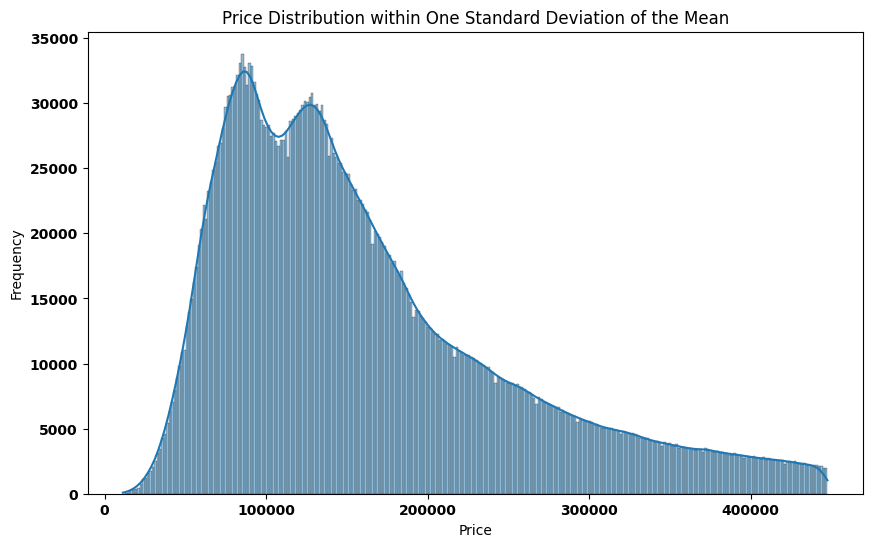

In [ ]:
# # Filter data within one standard deviation of the mean
# filtered_data = data[(data['Price'] >= mean_price - std_price) & (data['Price'] <= mean_price + std_price)]

# # Distribution plot
# plt.figure(figsize=(10, 6))
# sns.histplot(filtered_data['Price'], kde=True)
# plt.title('Price Distribution within the mean')
# plt.xlabel('Price')
# plt.ylabel('Frequency')
# plt.show()


# Calculate mean and standard deviation
mean_price = data['Price'].mean()
std_price = data['Price'].std()

# Filter data within one standard deviation of the mean
filtered_data = data[(data['Price'] >= mean_price - std_price) & (data['Price'] <= mean_price + std_price)]

# Distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['Price'], kde=True)
plt.title('Price Distribution within One Standard Deviation of the Mean')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

* Based on the above histogram the price dataset is right skewed and most of the prices are below mean_price.



> ### <a id='toc1_4_2_'></a> [4.2 Bivariate Analysis](#toc0_)



* Under Bivariate analysis, we are checking the relationship between two
  variables within the dataset. Aiming to understand how changes in one variable might affect  changes in another.This will also enable identification of patterns, correlation trends, or dependencies between the variables. Which will provide valuable insights for making decisions.

* Below cell visualize the average housing price trend from year 1996 to 2018

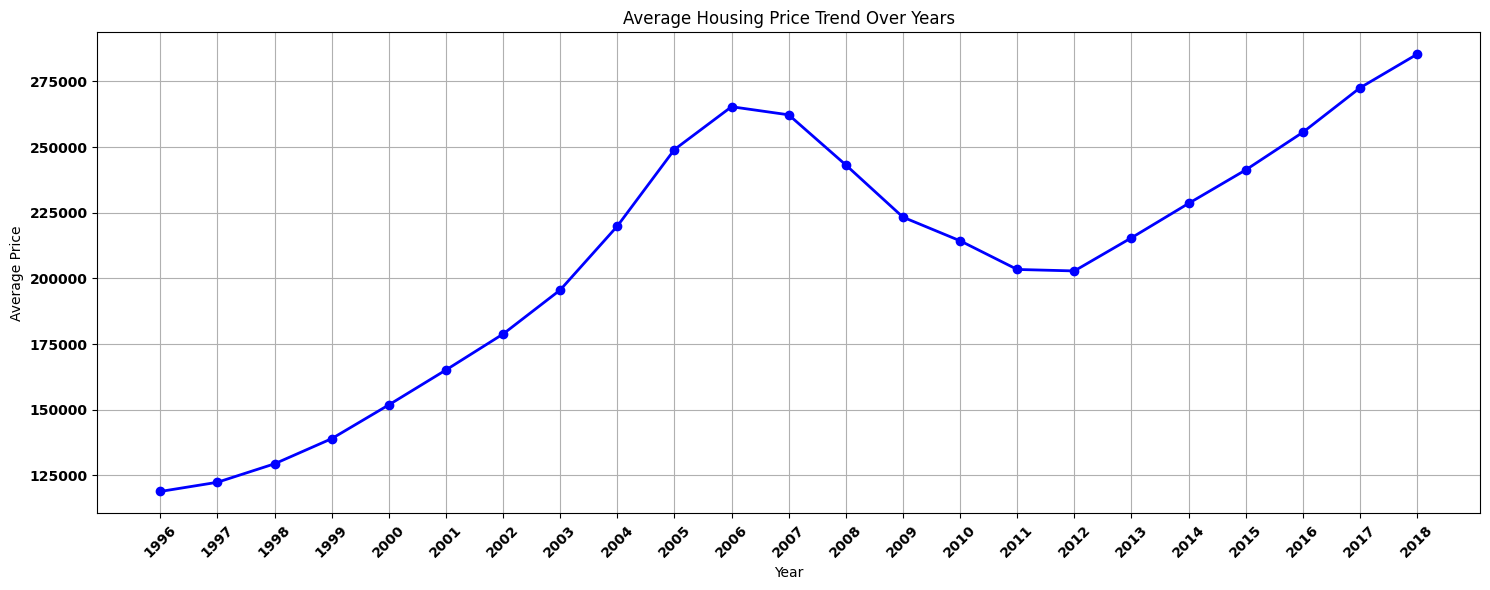

In [ ]:

#Average price over the years

# Calculating average price per year

data['Year'] = data['Date'].dt.year
average_prices = data.groupby('Year')['Price'].mean()
# Creating a figure and axis
fig, ax = plt.subplots(figsize=(15, 6))
# Ploting the data
ax.plot(average_prices.index, average_prices.values, label='Average Price', color='blue', linewidth=2, marker='o')
# Adding labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Average Price')
ax.set_title('Average Housing Price Trend Over Years')
# Adding grid lines
ax.grid(True)
# Customizing x-axis ticks for each year
plt.xticks(average_prices.index, rotation=45)
# Tight layout
plt.tight_layout()
# Show the plot
plt.show()

* The graph shows that the average housing price has been increasing steadily
 over the years, with a dip between 2007 and 2012, during the financial crisis. Since then, the average housing price has rebounded and continued to rise

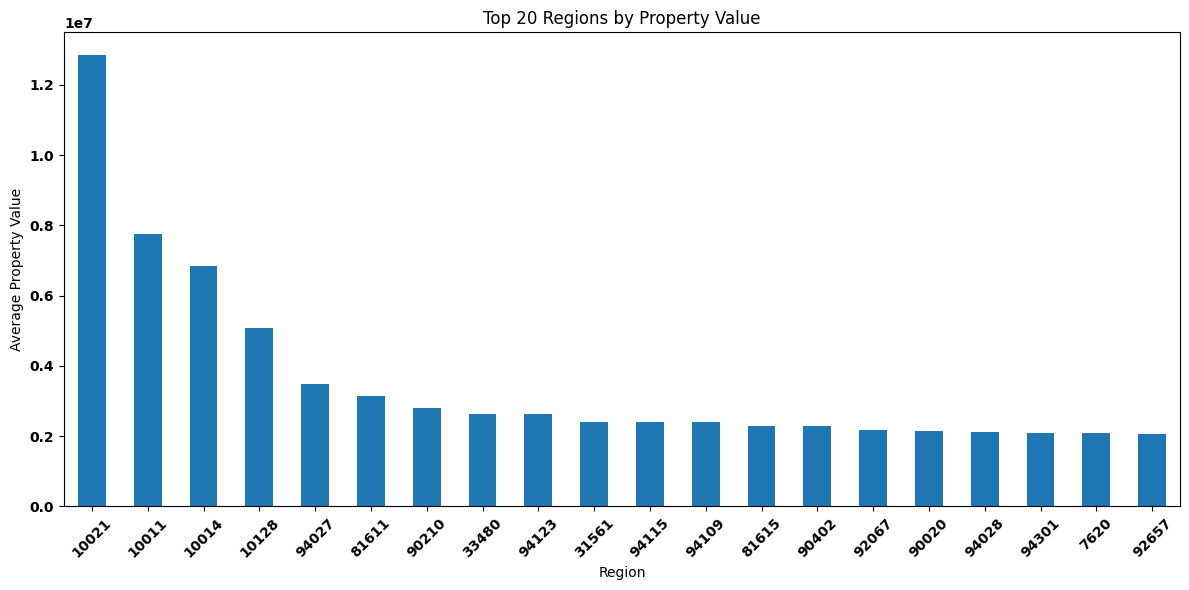

In [ ]:
# Checking on top 20 regions by property prices

plt.figure(figsize=(12, 6))
top_regions = data.groupby('Zipcode')['Price'].mean().nlargest(20)
top_regions.plot(kind='bar')
plt.title("Top 20 Regions by Property Value")
plt.xlabel("Region")
plt.ylabel("Average Property Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Zipcode 10021,10011, 10014, 10128 in New York has properties with the highest
 value, followed by 94027 in California and 81611 in Colorado, and the other remaining Zipcodes range between 2 to 3 Million.



> **4.2.1 Top 20 cities by by property value**



The cell below compute the mean of price and visualizes top 20 cities with
 highest mean value.

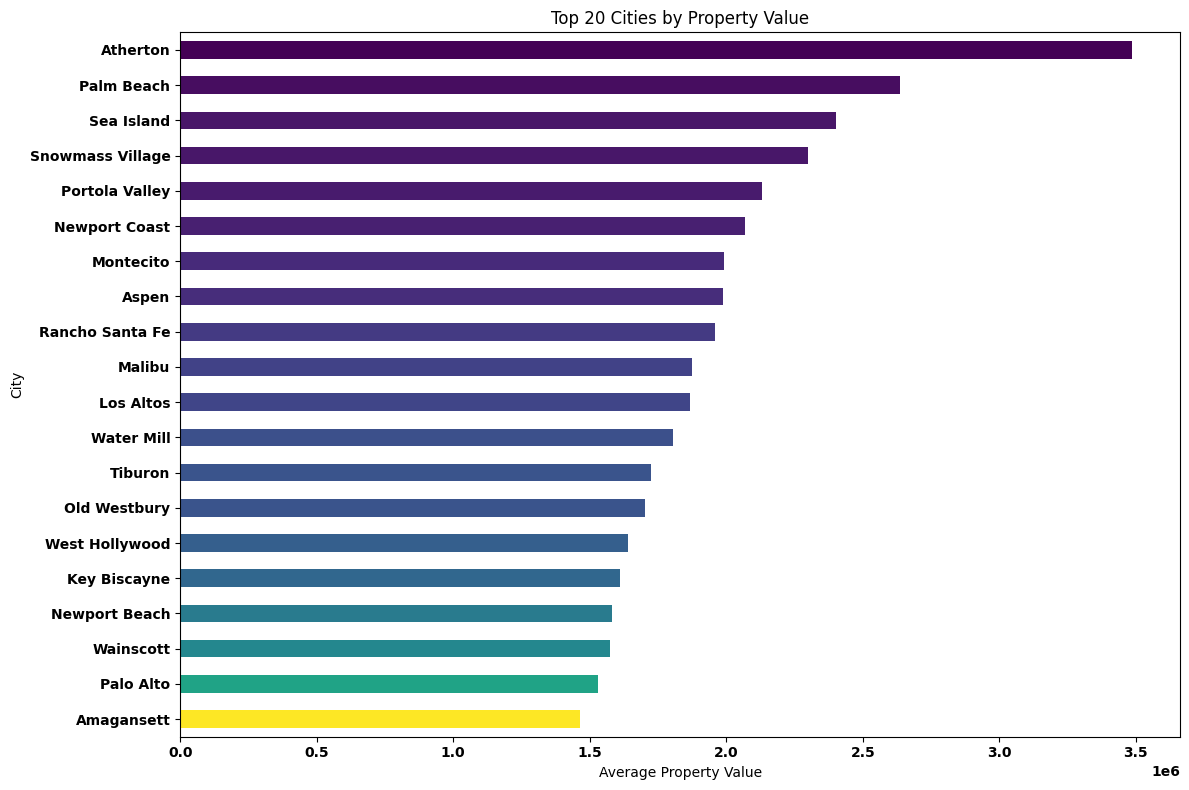

In [ ]:
# #Top 10 Cities by property value
# Calculate the top 20 cities by average property value
top_regions = data.groupby('City')['Price'].mean().nlargest(20)

# Normalize values for coloring
normalized_values = (top_regions - top_regions.min()) / (top_regions.max() - top_regions.min())

# Define a colormap
colormap = plt.cm.get_cmap('viridis')  # You can choose any colormap you prefer

# Generate colors based on normalized values
colors = colormap(normalized_values)

# Create a bar plot
plt.figure(figsize=(12, 8))
top_regions.sort_values().plot(kind='barh', color=colors)
plt.title("Top 20 Cities by Property Value")
plt.xlabel("Average Property Value")
plt.ylabel("City")
plt.tight_layout()
plt.show()

* From the horizontal graph, Palm Beach, Malibu and Los Altos are the  
  properties with the highest property value. Palm Beach with an average price of above 2.5 million. Other cities operates below price of 2 million



> **4.2.2 Top 20 Metropolitant cities**



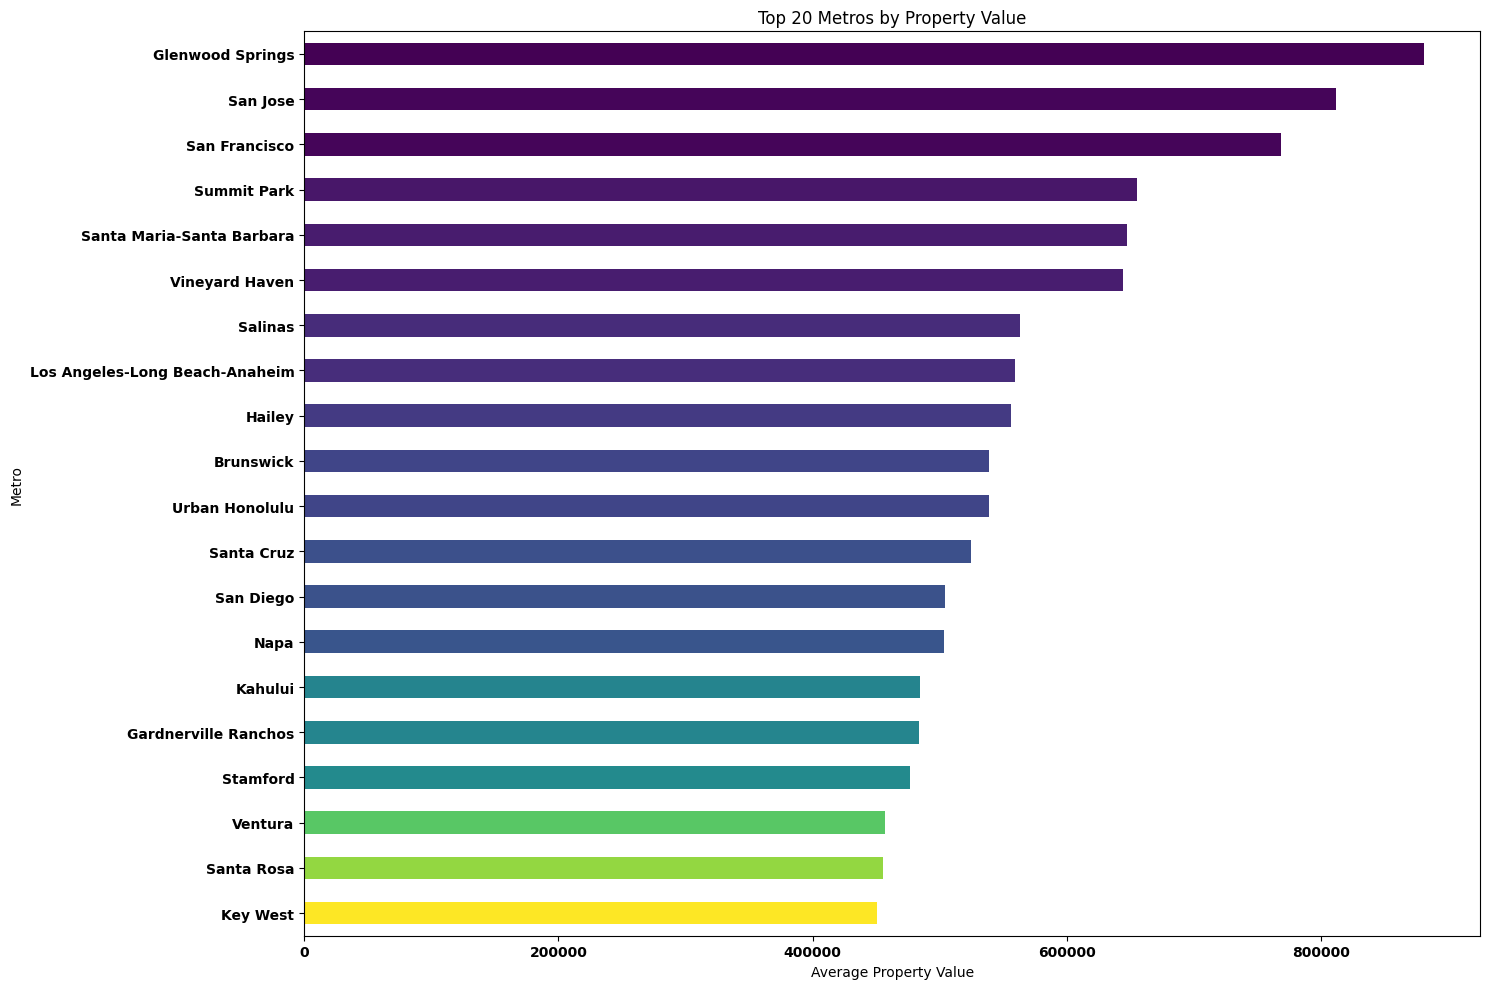

In [ ]:
#Top 10 Metropolitant by price

# Flipped Axes Bar Plot: Property Value vs. Region
plt.figure(figsize=(15, 10))
top_regions = data.groupby('Metro')['Price'].mean().nlargest(20)
normalized_values = (top_regions - top_regions.min()) / (top_regions.max() - top_regions.min())
colors = colormap(normalized_values)

top_regions.sort_values().plot(kind='barh', color=colors)
plt.title("Top 20 Metros by Property Value")
plt.xlabel("Average Property Value")
plt.ylabel("Metro")
plt.tight_layout()
plt.show()

* from the bar graph San Jose and San Francisco are the most metropolitant
  counties with the highest value of the property with an average price above 600000.



> **4.2.3 Houses values in top 10 states**



In [ ]:
# calculate the average profit margin for each city
df_avg_value = data.groupby('State').mean().reset_index()

# sort the cities by average profit margin in descending order
df_sorted_states = df_avg_value.sort_values('Price', ascending=False)

# select the top 20 cities by average profit margin
top_states = df_sorted_states['State'].head(10)

# filter the DataFrame to include only the top 20 cities
df_top_states = data[data['State'].isin(top_states)].groupby("State").mean().sort_values("Price",ascending=False)

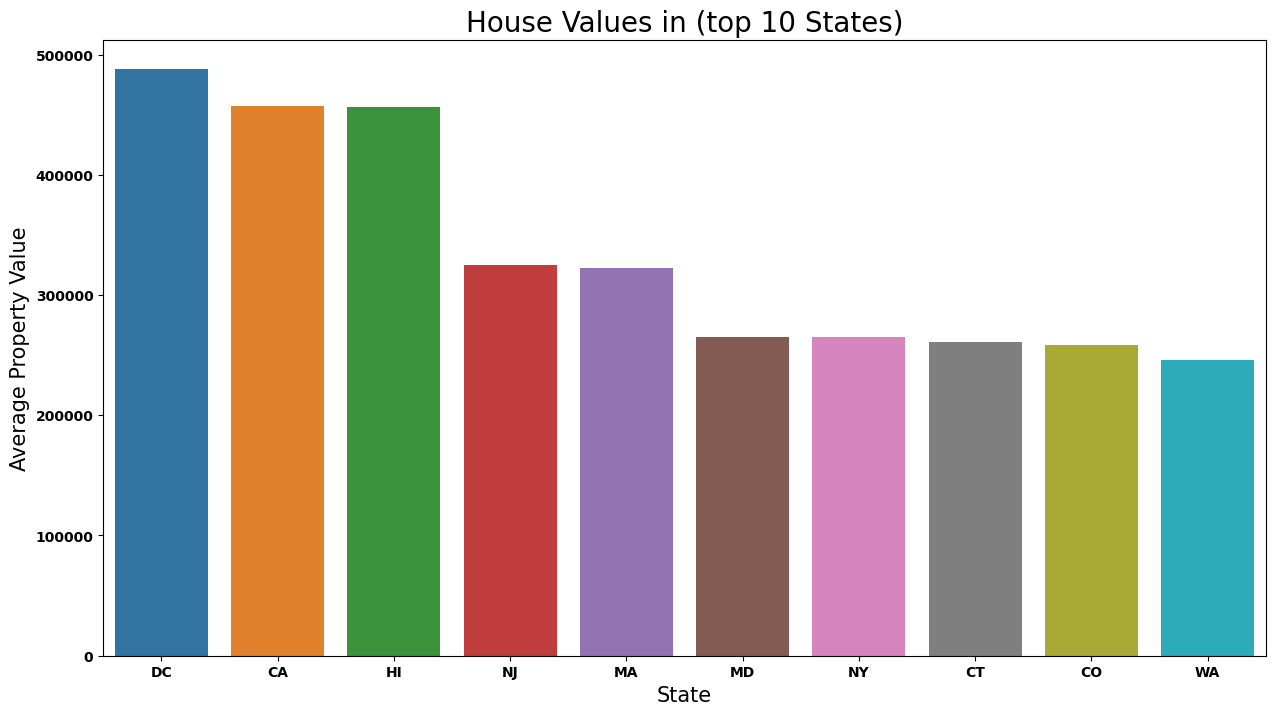

In [ ]:
# create a bar plot of city vs. profit margin
fig,ax = plt.subplots(figsize=(15,8))
sns_plot = sns.barplot(x=df_top_states.index, y=df_top_states.Price,ax=ax)

# set the title and axis labels
ax.set_title('House Values in (top 10 States)',fontsize=20)
ax.set_xlabel('State',fontsize=15)
ax.set_ylabel('Average Property Value',fontsize=15)

# display the plot
plt.show();

* from the bar graph, its noted that HI, DC and CA arethe top 3 states with the
  house property value above 4000000. Most of the others states operates with house value of below 4000000



> **4.2.4 Return On Investement By Zipcodes**



The code belowgroup the zipcodes by Return On Investment percentage, picks the zipcodes with the highest property value and visualize.

In [ ]:
# grouping data by mean %ROI and selecting top 30 zipcodes
grouped1 = data.groupby('Zipcode')
state_values1 = grouped1['%ROI'].mean()
state_values_df1 = state_values1.reset_index(name='% ROI')
state_values_df1 = state_values_df1.sort_values(by='% ROI', ascending=False)
top_thirty_zipcodes_df_roi = state_values_df1.head(10)

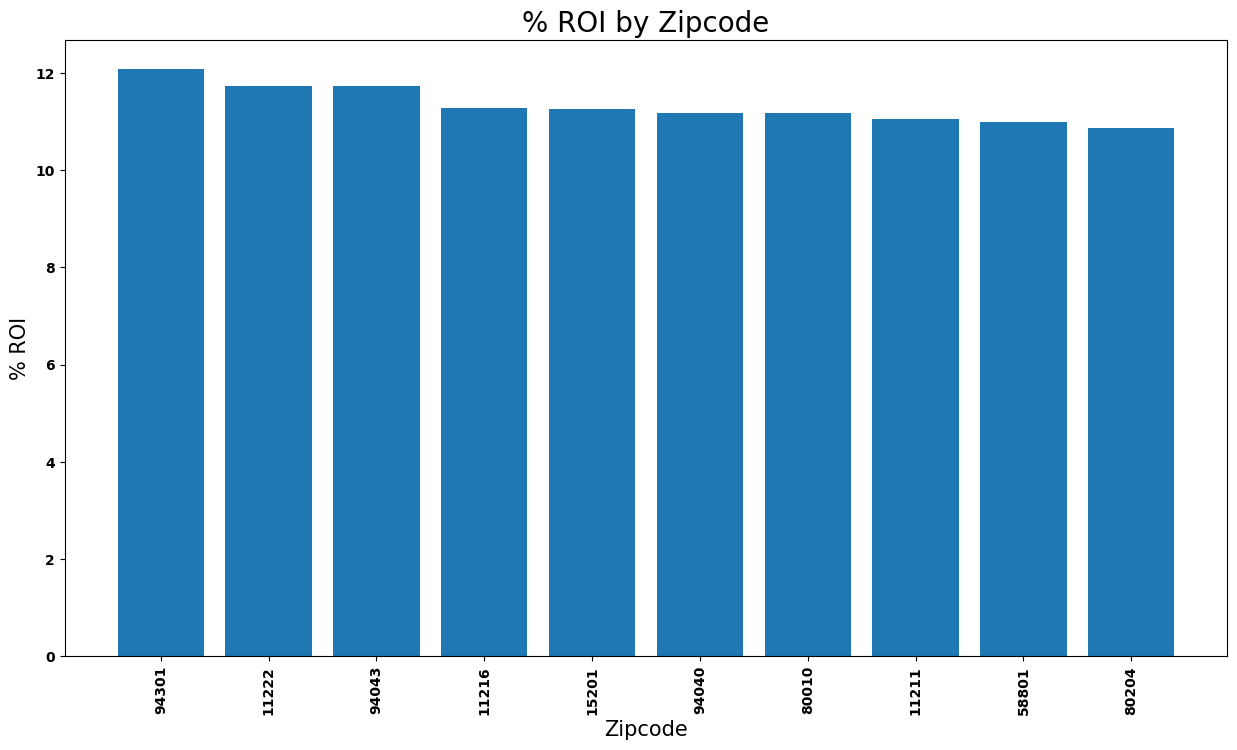

In [ ]:
# plotting the %ROI by zipcode
plt.figure(figsize=(15,8))
plt.bar(top_thirty_zipcodes_df_roi['Zipcode'], top_thirty_zipcodes_df_roi['% ROI'])
plt.xlabel('Zipcode',fontsize=15)
plt.ylabel('% ROI',fontsize=15)
plt.title('% ROI by Zipcode',fontsize=20)
plt.xticks(rotation=90)
plt.show()

* From this graph, zipcode 94301 seems to be the most profitable zipcode at 12%
  ROI from 2009 to 2018.



> ### <a id='toc1_4_3_'></a>[4.3 Multivariate Analysis](#toc0_)



This section seeks to understand relationships among three or more variables within a dataset.It also aims to uncover patterns, trends, and underlying structures that might not be evident when considering variables in isolation. By considering multiple variables together,we gain a more comprehensive understanding of complex systems and can make more nuanced predictions and informed decisions.

In [ ]:
data.head()

RegionID Zipcode  SizeRank      City State              Metro CountyName  \
0     84654   60657         1   Chicago    IL            Chicago       Cook   
1     90668   75070         2  McKinney    TX  Dallas-Fort Worth     Collin   
2     91982   77494         3      Katy    TX            Houston     Harris   
3     84616   60614         4   Chicago    IL            Chicago       Cook   
4     93144   79936         5   El Paso    TX            El Paso    El Paso   

       %ROI  ROIPrice       Date     Price  Year  
0  2.596098  212299.0 1996-04-01  334200.0  1996  
1  5.287075  119399.0 1996-04-01  235700.0  1996  
2  3.281773   83199.0 1996-04-01  210400.0  1996  
3  2.296917  241599.0 1996-04-01  498100.0  1996  
4 -0.009141    -101.0 1996-04-01   77300.0  1996



> **4.3.1 Top states based on average prices over years**



The cell below seeks to visualize top states with the highest property valuve over a period of time.

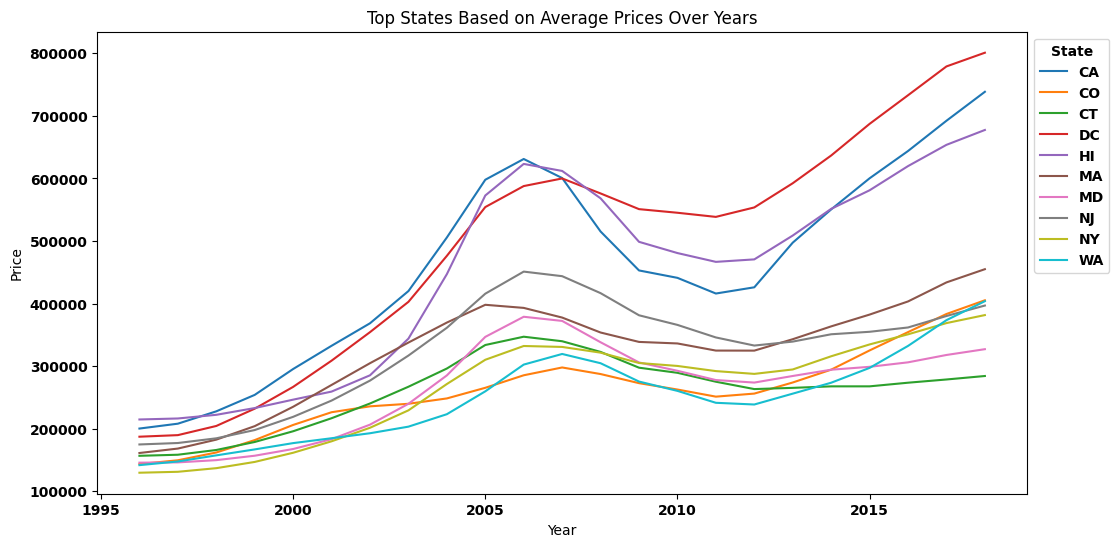

In [ ]:
#Checking top 10 states based on average prices per year

# Calculate average prices by state
average_prices_by_state = data.groupby(['Year', 'State'])['Price'].mean().reset_index()

# Get top states based on average prices
top_states = average_prices_by_state.groupby('State')['Price'].mean().sort_values(ascending=False).head(10).index

# Filter the DataFrame to include only top states
df_top_states = average_prices_by_state[average_prices_by_state['State'].isin(top_states)]

# Plotting the data
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Price', hue='State', data=df_top_states, ci=None)
plt.title('Top States Based on Average Prices Over Years')
plt.legend(title='State', bbox_to_anchor=(1, 1))
plt.show()

* As observed, the percentage of return on investents for the top ten states  
  had a crash in 2008 to 2012 and then from there they all have an upward linear trend. This also depicts the rising trent has been from 2012 onwards meaning 2018 remains highest in terms of investments returns.



> **4.3.2 Top zipcodes Based on Average Prices Over Years**



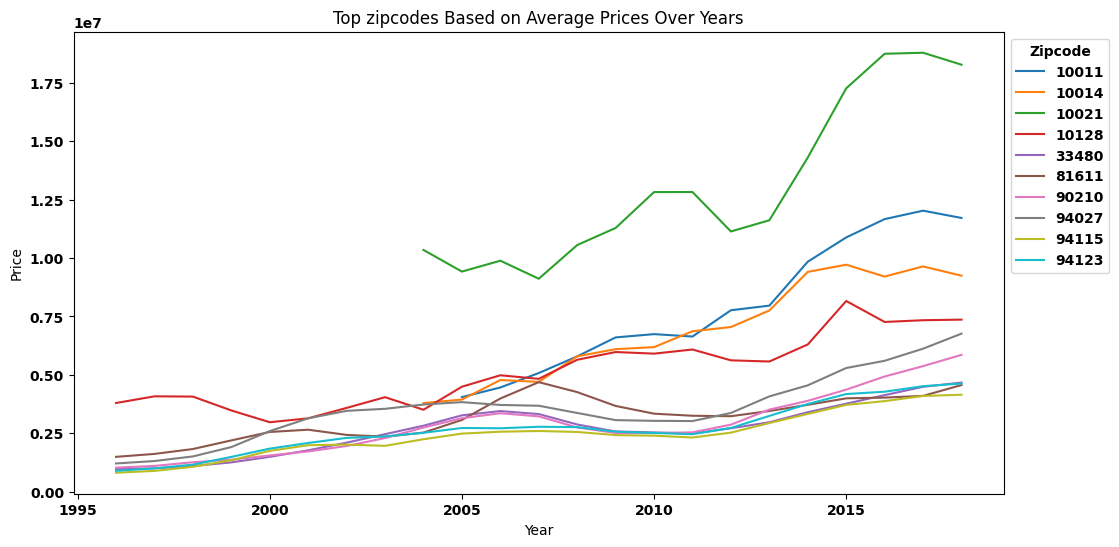

In [ ]:
#Checking top 10 Zipcodes based on average prices per year

# Calculate average prices by state
average_prices_by_zipcode = data.groupby(['Year', 'Zipcode'])['Price'].mean().reset_index()

# Get top states based on average prices
top_zipcodes = average_prices_by_zipcode.groupby('Zipcode')['Price'].mean().sort_values(ascending=False).head(10).index

# Filter the DataFrame to include only top states
df_top_zipcodes = average_prices_by_zipcode[average_prices_by_zipcode['Zipcode'].isin(top_zipcodes)]

# Plotting the data
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Price', hue='Zipcode', data=df_top_zipcodes, ci=None)
plt.title('Top zipcodes Based on Average Prices Over Years')
plt.legend(title='Zipcode', bbox_to_anchor=(1, 1))
plt.show()

* From the above trend curve the zip code 10021 remains high in terms of
  valuation. over time there has been slight rising of prices in other zipcodes as from 2012 upto year 2018



> **4.3.3 Home Prices by Zipcode over years**



* The code below filters the best 5 zipcodes based on return on investment and
 visualize the result from 1996 to 2018 tp show the trend.

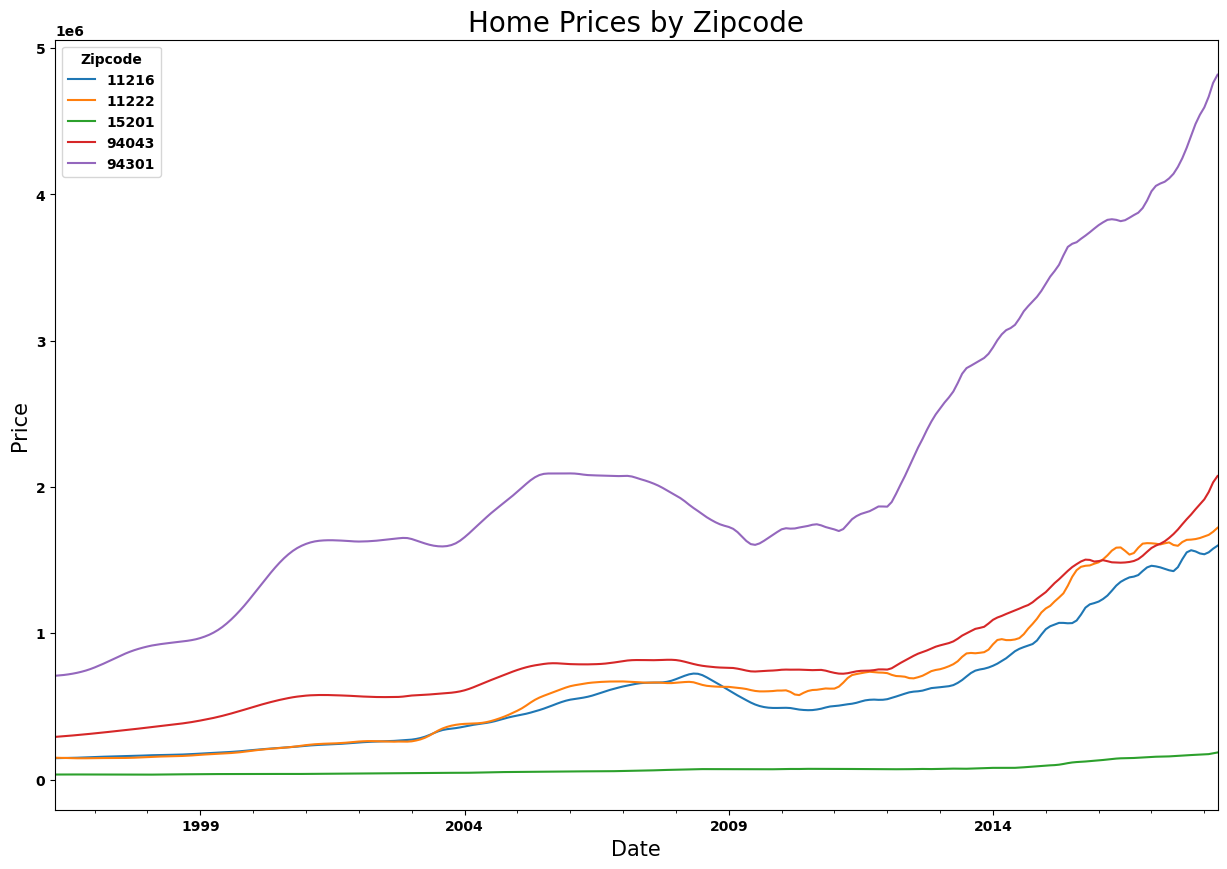

In [ ]:
# Filter data for the top 5 zipcodes based on %ROI
zipcodes = data.sort_values('%ROI', ascending=False)['Zipcode'].unique()[:5]
top_5 = data[data['Zipcode'].isin(zipcodes)]

# Group data by date and zipcode, and calculate the mean price for each group
grouped = top_5.groupby(['Date', 'Zipcode']).mean().reset_index()

# Pivot the data to get the zipcodes as columns and the dates as rows
pivoted = grouped.pivot(index='Date', columns='Zipcode', values='Price')

# Plot the data as a line graph
pivoted.plot(kind='line', figsize=(15,10))
plt.title('Home Prices by Zipcode over years',fontsize=20)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()


* Based on  the observation above, its notice that zipcodes potrays steady rise
  from 1996 with low fluctuations. from 2008 there has been decline and from 2012 steady rise is witnessed. 94301 remains the zipcode with higher reurn than the other 5 zipcodes. .

## <a id='toc1_5_'></a>[Step 5: Data Preprocessing](#toc0_)
When working with time series models, it's crucial to assume that the data is stationary. This assumption implies that the mean, variance, and autocorrelation of the data remain constant over time for each lag.

Stationary time series data is essential for efficient model development. Prior to modeling, a thorough assessment of data stationarity will be conducted using the following methods:

1. Dickey-Fuller Test: The Dickey-Fuller test will be employed to assess the stationarity of the data. This statistical test helps determine if a unit root is present in the series, which is indicative of non-stationarity.

2. Rolling Mean Analysis: Additionally, a rolling mean analysis will be performed. This involves calculating the mean over a sliding window of observations. Fluctuations in the rolling mean indicate non-stationarity.

In cases where the data is identified as non-stationary, a differencing technique will be applied. Differencing involves computing the difference between consecutive observations. This process helps transform the data into a stationary form, enabling more accurate modeling and analysis.



> ### <a id='toc1_5_1'></a>[5.1 Checking for Stationarity](#toc0_)




In [ ]:
# Filter data for the top 5 zipcodes based on %ROI
zipcode = data.sort_values('%ROI', ascending=False)['Zipcode'].unique()[:5]
top_5 = data[data['Zipcode'].isin(zipcode)]

# Group data by date and zipcode, and calculate the mean price for each group and selecting from 2012
grouped_5 = top_5.groupby(['Date', 'Zipcode']).mean().reset_index()
final_df = grouped_5[grouped_5.Date >= "2005-01-01"]

final_df.head()

Date Zipcode  RegionID  SizeRank       %ROI   ROIPrice      Price  \
525 2005-01-01   11216   62027.0     476.0  11.281218   987799.0   437500.0   
526 2005-01-01   11222   62033.0    1156.0  11.743229  1087499.0   470800.0   
527 2005-01-01   15201   63932.0    6564.0  11.258385   114299.0    52000.0   
528 2005-01-01   94043   97530.0    2581.0  11.729368  1310199.0   749200.0   
529 2005-01-01   94301   97691.0    5739.0  12.076632  3091499.0  1967900.0   

       Year  
525  2005.0  
526  2005.0  
527  2005.0  
528  2005.0  
529  2005.0

In [ ]:
TS_zc5 = final_df.drop(['RegionID', 'SizeRank', '%ROI', 'ROIPrice'],axis=1)

TS_zc5 = TS_zc5.set_index('Date')
print('Time series data for the 5 zipcodes:\n',TS_zc5.head())

#Create individualized time series for each zipcode.
#List containing the 5 different time series.
df_ts = []
for zipcode in TS_zc5.Zipcode.unique():
    # Create separate dataframes for each zipcode with a monthly frequency.
    df_zip = TS_zc5[TS_zc5['Zipcode']==zipcode].asfreq('MS')
    df_ts.append(df_zip)
print('\nZipcode 48894 time series:')
df_ts[0].head()

Time series data for the 5 zipcodes:
            Zipcode      Price    Year
Date                                 
2005-01-01   11216   437500.0  2005.0
2005-01-01   11222   470800.0  2005.0
2005-01-01   15201    52000.0  2005.0
2005-01-01   94043   749200.0  2005.0
2005-01-01   94301  1967900.0  2005.0

Zipcode 48894 time series:


Zipcode     Price    Year
Date                                
2005-01-01   11216  437500.0  2005.0
2005-02-01   11216  443300.0  2005.0
2005-03-01   11216  450000.0  2005.0
2005-04-01   11216  457700.0  2005.0
2005-05-01   11216  466200.0  2005.0

In [ ]:
# # plotting home prices by zipcodes
# for i in range(5):
#     df_ts[i].Price.plot(label=df_ts[i].Zipcode[0],figsize=(15,8))
#     plt.legend()
# plt.title("Home Prices by Zipcode",fontsize=20);

* It can be observed like before that there was a dip in the prices due to the
  2008 market crash and then the prices continued to rise over time from 2012  
  all the way to 2018.

* A new column called ret is created to check the returns per month

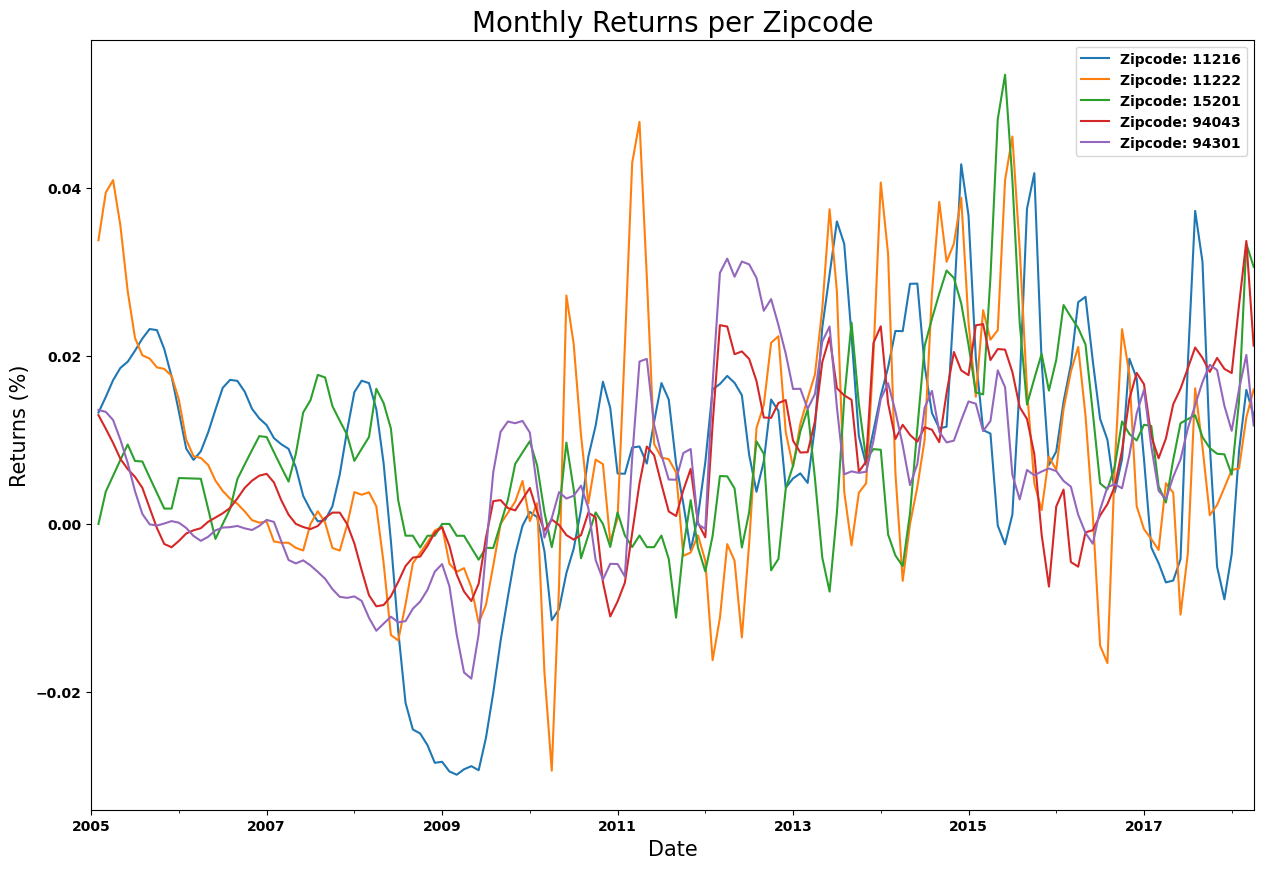

In [ ]:
# creating a column called "ret" representing monthly returns on investment
for zc in range(len(df_ts)):
    df_ts[zc]['ret']=np.nan*len(df_ts[zc])
    for i in range(len(df_ts[zc])-1):
        df_ts[zc]['ret'][i+1]= (df_ts[zc].Price.iloc[i+1] / df_ts[zc].Price.iloc[i]) - 1

#Plot the monthly returns of each zipcode
for i in range(len(df_ts)):
    df_ts[i].ret.plot(figsize=(15,10),label=f"Zipcode: {df_ts[i].Zipcode[0]}")
    plt.title(f'Monthly Returns per Zipcode',fontsize=20)
    plt.xlabel('Date',fontsize=15)
    plt.ylabel('Returns (%)',fontsize=15)
    plt.legend(loc='best')

* From the obesrvation there is no clear trend which could indicate
  stationarity. The data seemes to noo_stationary.This calls for further tests to be carried out to determine this.



> **5.1.1 Rolling Mean and standard deviation to check for stationarity**



* Below code generates visualization to check for stationarity of the five
 zipcodes

ADF Test Results for Zipcode: 11216
Test Statistic: -2.392854023179097
p-Value: 0.1437634741445093
Used Lags: 8
Observations: 150
Critical Values:
   1%: -3.474714913481481
   5%: -2.881008708148148
   10%: -2.5771508444444446


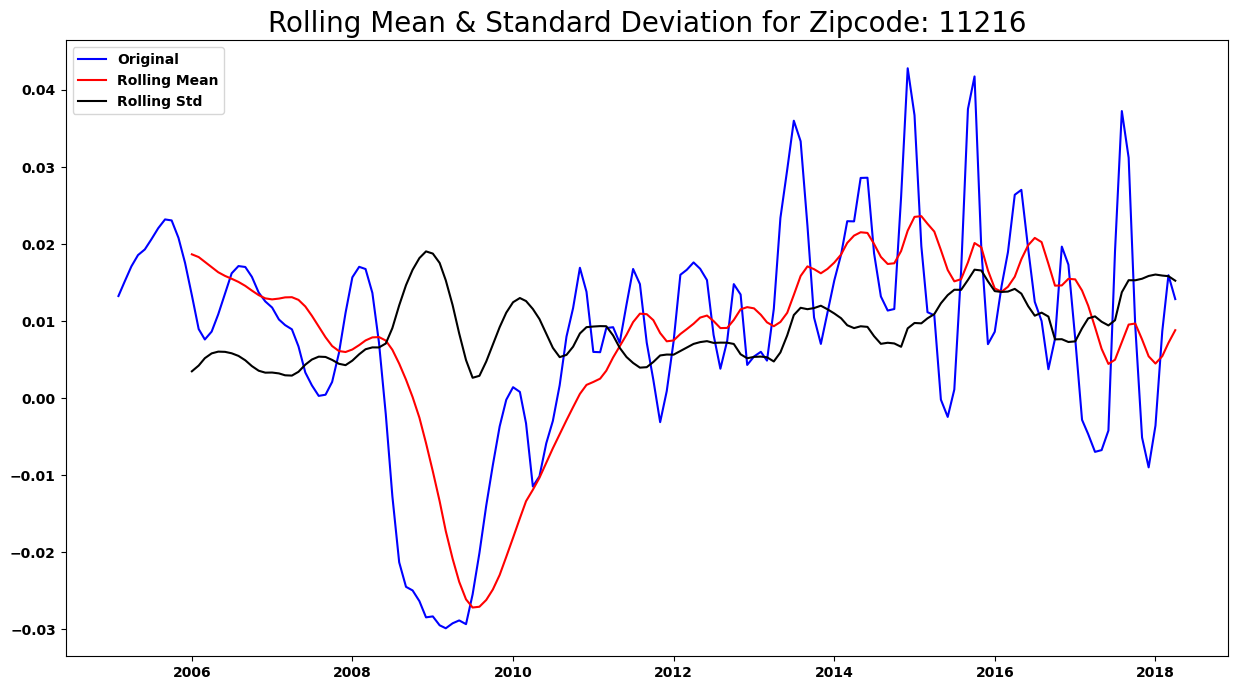

ADF Test Results for Zipcode: 11222
Test Statistic: -2.5337723538387587
p-Value: 0.10747185863642217
Used Lags: 14
Observations: 144
Critical Values:
   1%: -3.476597917537401
   5%: -2.8818291230495543
   10%: -2.5775887982253085


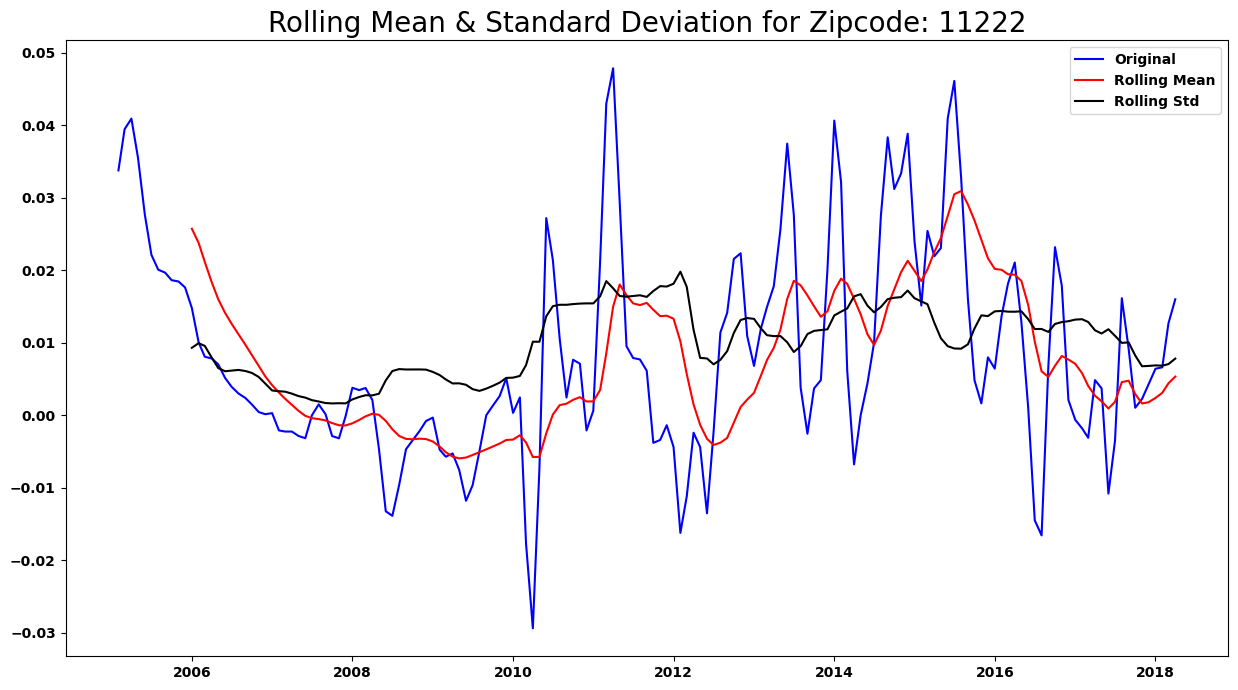

ADF Test Results for Zipcode: 15201
Test Statistic: -2.597050991676003
p-Value: 0.09360830058315467
Used Lags: 12
Observations: 146
Critical Values:
   1%: -3.4759527332353084
   5%: -2.881548071241103
   10%: -2.577438765246763


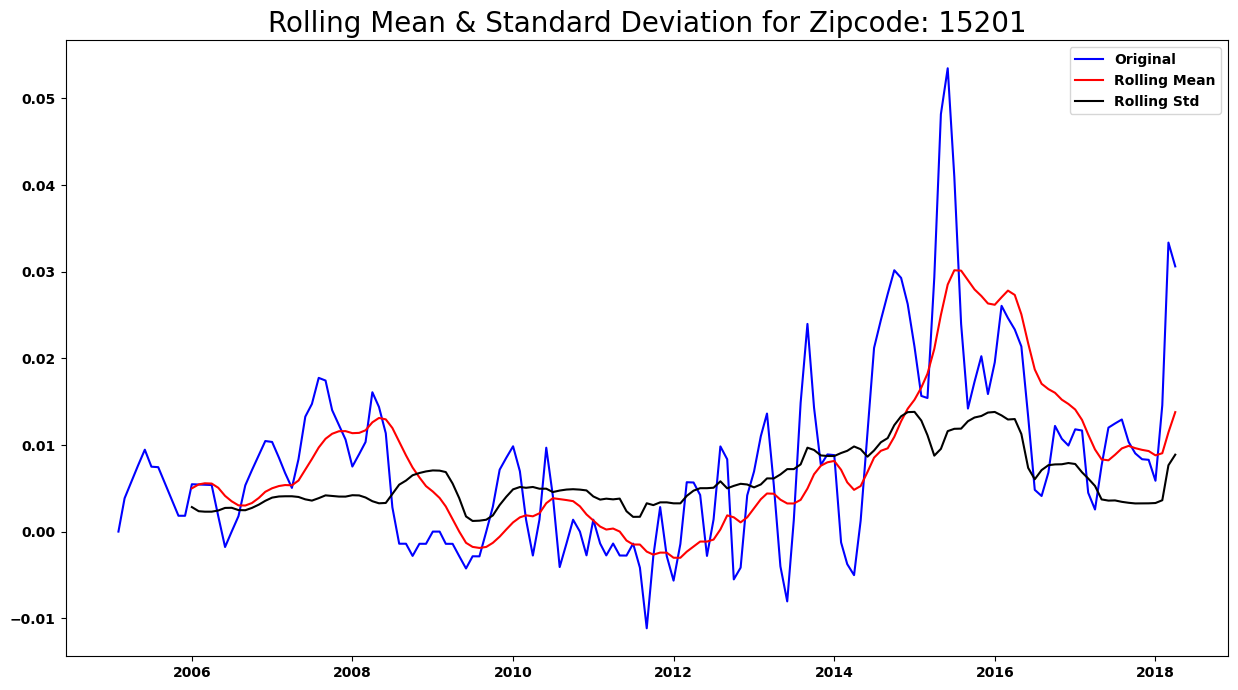

ADF Test Results for Zipcode: 94043
Test Statistic: -1.7646577754670028
p-Value: 0.3981438485942507
Used Lags: 13
Observations: 145
Critical Values:
   1%: -3.476273058920005
   5%: -2.881687616548444
   10%: -2.5775132580261593


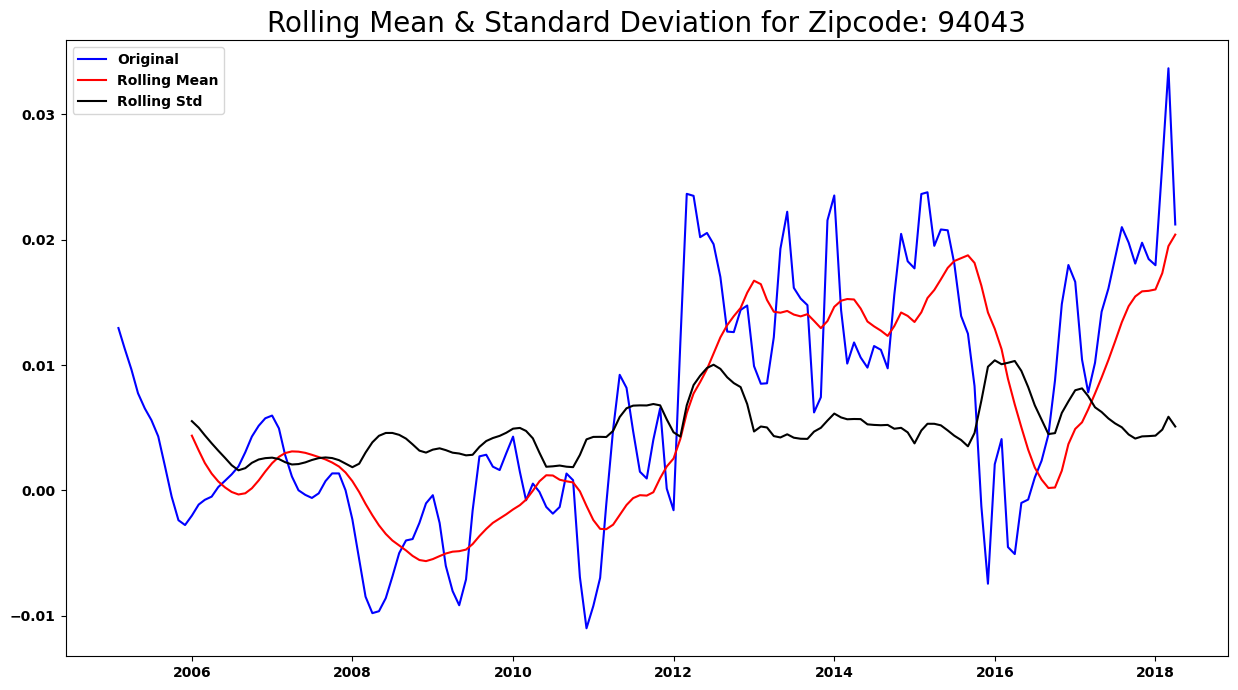

ADF Test Results for Zipcode: 94301
Test Statistic: -1.979617475278643
p-Value: 0.29558100750594096
Used Lags: 13
Observations: 145
Critical Values:
   1%: -3.476273058920005
   5%: -2.881687616548444
   10%: -2.5775132580261593


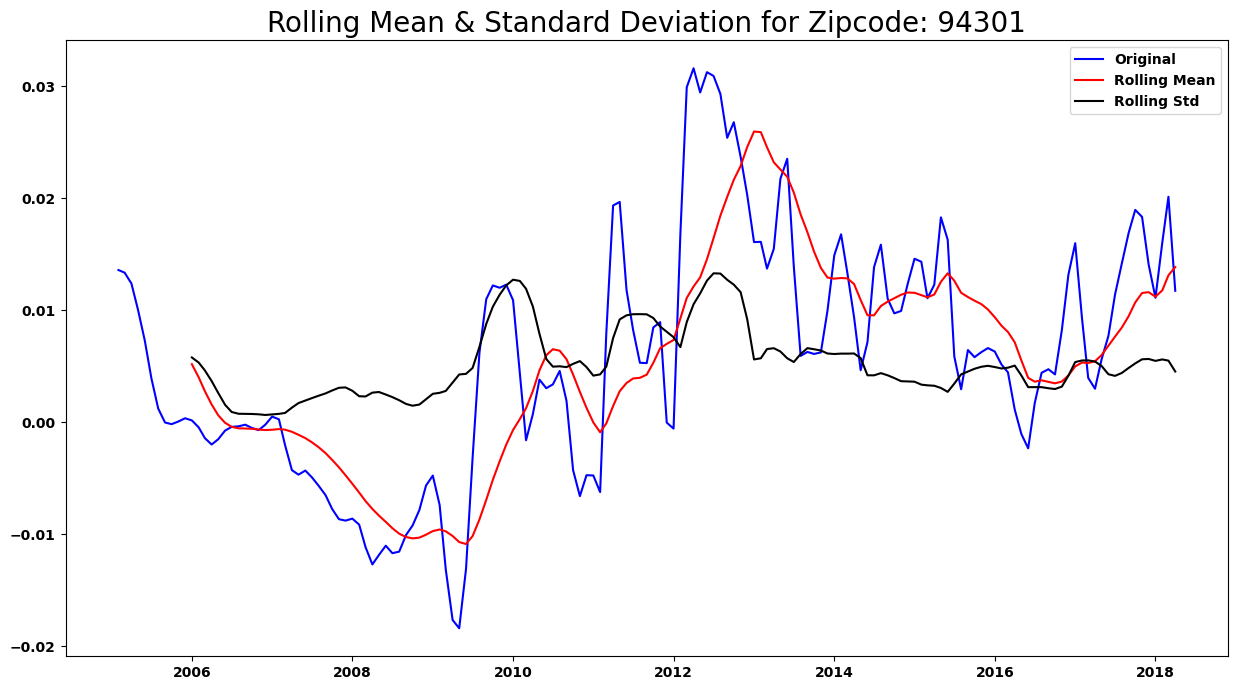

In [ ]:
# Testing for stationarity of the zipcodes

# Plot each of the zipcodes’ returns with their respective rolling mean and rolling standard deviation
for i in range(len(df_ts)):
    rollingmean = df_ts[i].ret.rolling(window=12, center=False).mean()
    rollingstd = df_ts[i].ret.rolling(window=12, center=False).std()
    fig = plt.figure(figsize=(15, 8))
    original = plt.plot(df_ts[i].ret, color="blue", label="Original")
    mean = plt.plot(rollingmean, color="red", label="Rolling Mean")
    std = plt.plot(rollingstd, color="black", label="Rolling Std")
    plt.legend(loc="best")
    plt.title(f'Rolling Mean & Standard Deviation for Zipcode: {df_ts[i].Zipcode[0]}', fontsize=20)

    # Perform ADF test
    adf_result = adfuller(df_ts[i].ret.dropna())
    print('ADF Test Results for Zipcode:', df_ts[i].Zipcode[0])
    print('Test Statistic:', adf_result[0])
    print('p-Value:', adf_result[1])
    print('Used Lags:', adf_result[2])
    print('Observations:', adf_result[3])
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print(f'   {key}: {value}')

    plt.show()


*  From the graphs above there are some states that exhibit non-stationarity  
   but to be certain, a Dickey Fuller test is performed to make a clear picture of it.



> **5.1.2 Dicky-fuller Test**




* Testing for stationerty using dicky-fuller test

In [ ]:
# performing Dicky-fuller test for stationarity

for i in range(5):
    results = adfuller(df_ts[i].ret.dropna())
    print(f'ADFuller test p-value for zipcode: {df_ts[i].Zipcode[0]}')
    print('p-value:',results[1])

    if results[1]>0.05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
    else:
        print('Reject the null hypothesis. Data is stationary.\n')

ADFuller test p-value for zipcode: 11216
p-value: 0.1437634741445093
Fail to reject the null hypothesis. Data is not stationary.

ADFuller test p-value for zipcode: 11222
p-value: 0.10747185863642217
Fail to reject the null hypothesis. Data is not stationary.

ADFuller test p-value for zipcode: 15201
p-value: 0.09360830058315467
Fail to reject the null hypothesis. Data is not stationary.

ADFuller test p-value for zipcode: 94043
p-value: 0.3981438485942507
Fail to reject the null hypothesis. Data is not stationary.

ADFuller test p-value for zipcode: 94301
p-value: 0.29558100750594096
Fail to reject the null hypothesis. Data is not stationary.



* From the above analysis, the Dickey Fuller test shows that **11216** has p_value
  of 0.1437, **11222** has p_value of 0.1074, **15201** has p_value of 0.093608, **94043** has a p_value of 0.3981 and **94301** has a p_value of 0.2955 which indicates that non of the zipcode has meet the criteria of stationarity(P_value < 0.05) and this may validate the procedure of differencing to bring the points to stationarity for further analysis.



> **5.1.3 Differencing of the dataset**



The code below will perform differencing process to bring data to stationarity. It will conduct the iterations according to the number of zipcodes

In [ ]:
# differencing the non stationary zip codes

for i in [0,1,2,3,4]:
    #Perform adfuller test and drop NaN values created when calculating monthly returns.
    results = adfuller(df_ts[i].ret.diff().dropna())
    print(f'ADFuller test p-value for zipcode: {df_ts[i].Zipcode[0]}')
    print('p-value:',results[1])

    if results[1]>0.05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
    else:
        print('Reject the null hypothesis. Data is stationary.\n')

ADFuller test p-value for zipcode: 11216
p-value: 0.04242671744182478
Reject the null hypothesis. Data is stationary.

ADFuller test p-value for zipcode: 11222
p-value: 0.00041729810750633546
Reject the null hypothesis. Data is stationary.

ADFuller test p-value for zipcode: 15201
p-value: 0.01470363296494467
Reject the null hypothesis. Data is stationary.

ADFuller test p-value for zipcode: 94043
p-value: 2.4030663255200404e-05
Reject the null hypothesis. Data is stationary.

ADFuller test p-value for zipcode: 94301
p-value: 0.005821932027030369
Reject the null hypothesis. Data is stationary.



* From the differencing process we can observe that all the zipcodes p_values
  are less than alpha_value of 0.05 hence indicating that the dataset has met stationarity aspect.

## <a id='toc1_7_'></a>[Step 6: Modelling](#toc0_)


* Since the aim is to identify the top five zipcodes to invest in, there will  
  be five different models for each of the top five zipcodes to forecast their prices and thus give the investors clear path to make informed decision.

* The code below calculates the differences between consecutive values then
  creating individual time series for each set of data. Any null values are also dropped to ensure the data for modeling and visualization is complete and suitable for the intended purpose.

In [ ]:
# creating individual time series
ts_11216 = df_ts[1].ret.dropna()
ts_11222 = df_ts[0].ret.diff().dropna()
ts_15201 = df_ts[2].ret.diff().dropna()
ts_94043 = df_ts[3].ret.diff().dropna()
ts_94301 = df_ts[4].ret.diff().dropna()

### <a id='toc1_7_1'></a>[6.1 Baseline Model - ARIMA](#toc0_)

ARIMA is a popular time series forecasting model that combines autoregressive, differencing, and moving average components.

Its use for price prediction is justified due to its ability to capture time-dependent patterns, handle nonlinear relationships, address stationarity, provide interpretability, and its well-established framework in time series analysis.


* Below function acf_pacf creates and displays Autocorrelation Function (ACF)
  and Partial Autocorrelation Function (PACF) plots for a given time series dataset using the plot_acf and plot_pacf functions. These plots are used to determine the appropriate values of the ARIMA model parameters ("p" "d"and "q").



> **6.1.1 ACF & PACF plots per Zipcode**


Through plotting the ACF and PACF plots, we identify potential patterns, trends, and the order of autoregressive (AR) and moving average (MA) components in our time series data.
The figures we get from this plots can be utilised in the order parameter of our ARIMA model.
ACF measures the correlation between a time series and its lagged values.
It shows how each observation in the series is correlated with its previous observations at various lags.

If the ACF plot shows a sharp drop after a certain lag, it indicates that the values beyond that lag are not significantly correlated with the current value.
If the ACF plot shows a slow decay, it suggests a high degree of autocorrelation and indicates the presence of a possible autoregressive (AR) component.
PACF measures the correlation between a time series and its lagged values after removing the effects of intervening lags.
It gives the direct relationship between an observation and its lagged values without the influence of the intermediate observations.

If the PACF plot shows a sharp drop after a certain lag, it indicates that there is no significant correlation beyond that lag.
If the PACF plot shows a slow decay, it suggests a high degree of partial autocorrelation and indicates the presence of a possible moving average (MA) component.

In [ ]:
# defining a function that plots acf and pacf plots
def acf_pacf(df,alags=40,plags=40):
    #Create figure
    fig,(ax1,ax2) = plt.subplots(2,1,figsize=(15,10))
    #Make ACF plot
    plot_acf(df,lags=alags, zero=False,ax=ax1)
    #Make PACF plot
    plot_pacf(df,lags=plags, ax=ax2)
    plt.show()

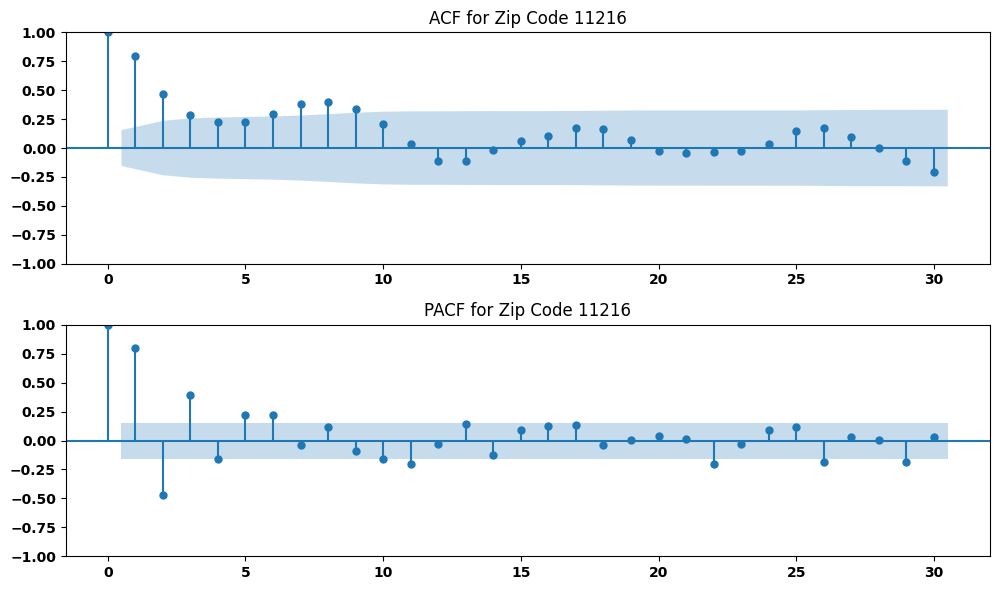

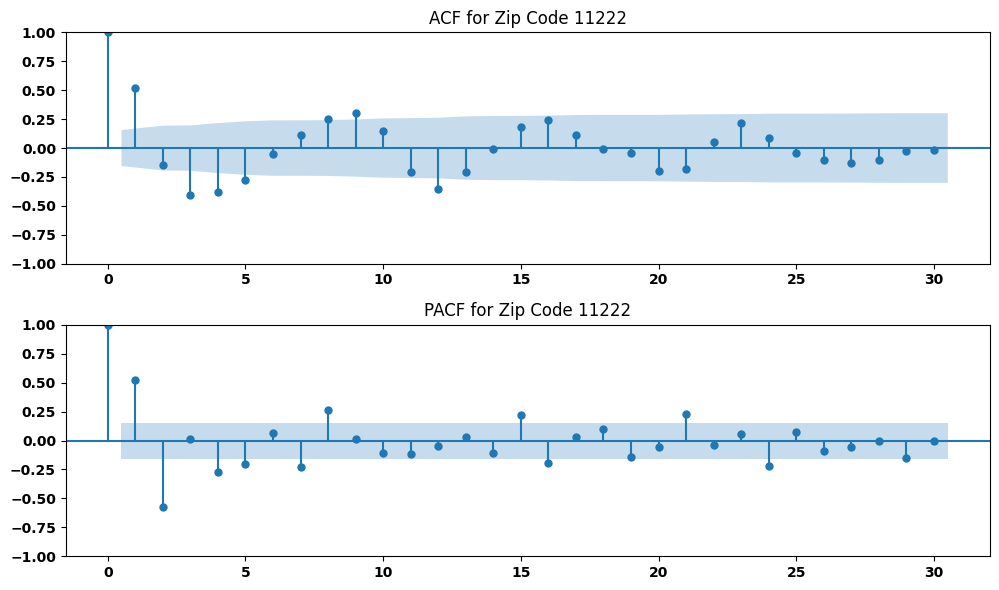

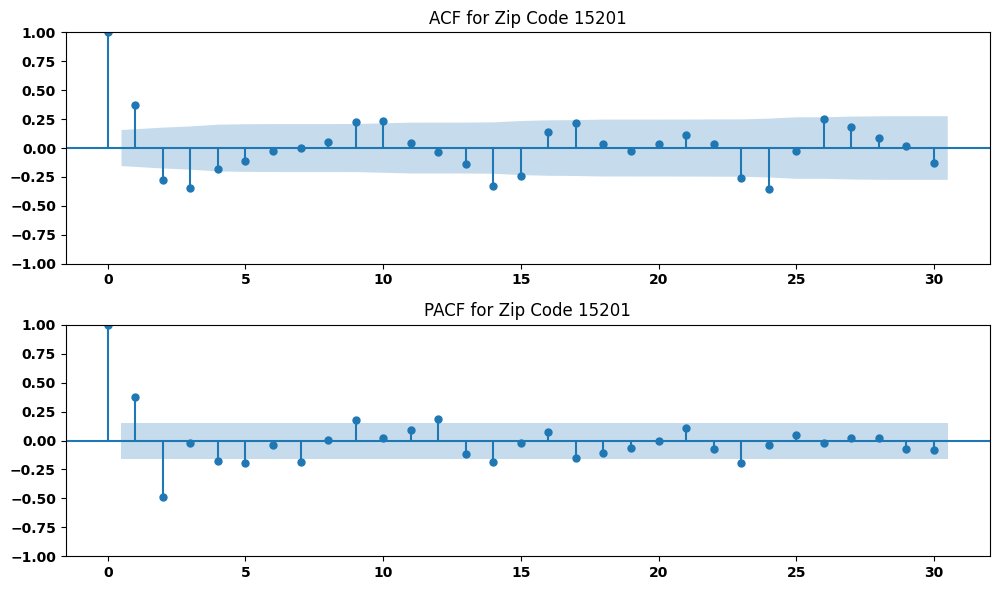

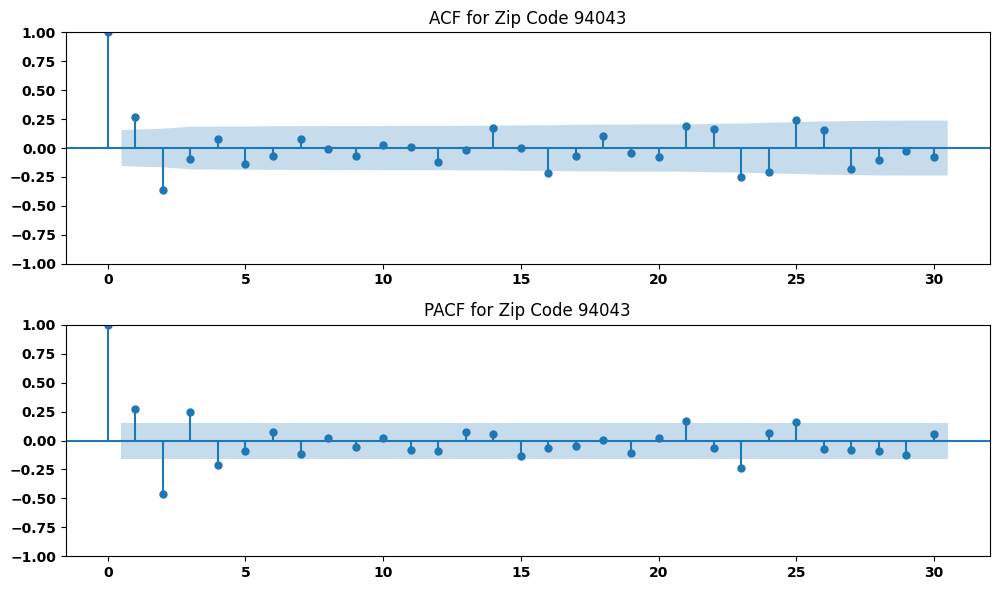

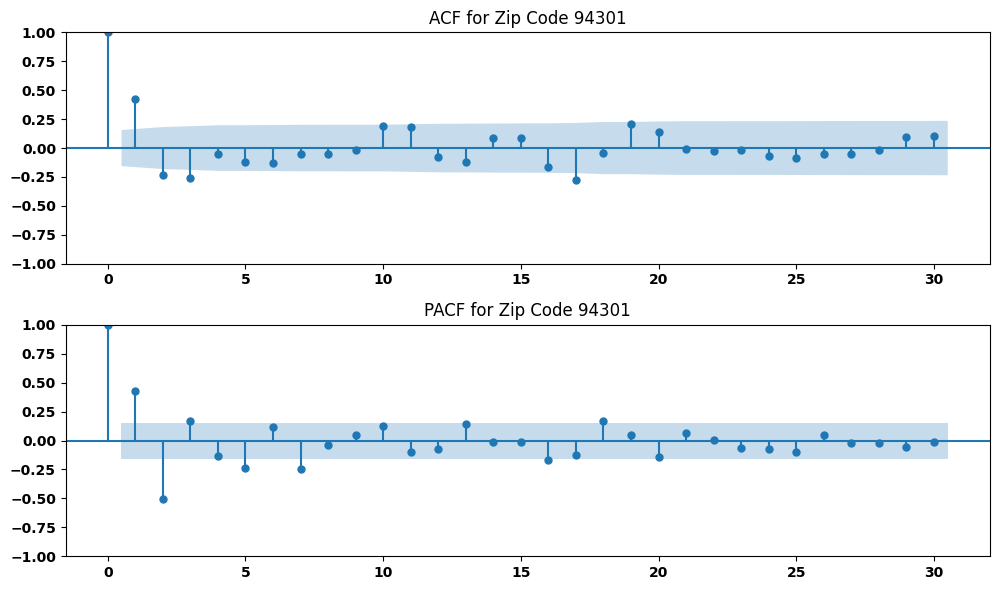

In [ ]:
# # plotting acf and pacf for zipcode 85035
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# acf_pacf(ts_94301)
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# List of zip code time series data
zip_codes = ['11216', '11222', '15201', '94043', '94301']

# Plot ACF and PACF for each zip code
for zipcode in zip_codes:
    ts = globals()['ts_' + zipcode]  # Get the time series data
    plt.figure(figsize=(10, 6))

    # ACF plot
    plt.subplot(2, 1, 1)
    plot_acf(ts, lags=30, ax=plt.gca())
    plt.title(f'ACF for Zip Code {zipcode}')

    # PACF plot
    plt.subplot(2, 1, 2)
    plot_pacf(ts, lags=30, ax=plt.gca())
    plt.title(f'PACF for Zip Code {zipcode}')

    plt.tight_layout()
    plt.show()

* The code below fits an ARIMA model to multiple time series data corresponding
 to different zip codes. It uses the pmdarima library, which provides an interface for fitting ARIMA models with various configurations.

In [ ]:
#Fitting the model into the zipcodes


# List of zip code time series data
zip_codes = ['11216', '11222', '15201', '94043', '94301']

# Using fixed ARIMA parameters (p, d, q) for all zip codes
fixed_p = 1
fixed_d = 1
fixed_q = 1

# Loop through each zip code in the list
for zipcode in zip_codes:
    ts = globals()['ts_' + zipcode]  # Get the time series data

    # Calculate the split index for training and testing
    train_size = 0.85  # Leaving approximately 3 years for test size
    split_idx = round(len(ts) * train_size)

    # Split the time series data into train and test sets
    train = ts.iloc[:split_idx]
    test = ts.iloc[split_idx:]

    # Fit the ARIMA model with fixed parameters to the training data
    model = pm.ARIMA(order=(fixed_p, fixed_d, fixed_q))
    model.fit(train)


In [ ]:
# Checking for the best p,d,q for each zipcode

# List of zip code time series data
zip_codes = ['11216', '11222', '15201', '94043', '94301']

# Using auto_arima for each zip code
for zipcode in zip_codes:
    ts = globals()['ts_' + zipcode]  # Get the time series data

    # Using auto_arima to find the best p, d, q for the model
    model = pm.auto_arima(ts, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

    # Print model summary
    print(f"Summary for Zip Code {zipcode}:")
    print(model.summary())
    print()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1123.269, Time=1.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-889.320, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1054.587, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1046.436, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-846.771, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1138.492, Time=0.94 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.29 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1121.703, Time=0.83 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1145.443, Time=0.70 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.28 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1127.133, Time=0.39 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-1146.869, Time=0.61 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=-1154.822, Time=0.75 sec
 ARIMA(0,0,5)(0,0,0)[0] intercept   : AIC=-1154.433, Time=0.66 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept

Summary for Zip Code 11216:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  111
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 386.689
Date:                Thu, 31 Aug 2023   AIC                           -765.377
Time:                        02:45:26   BIC                           -754.575
Sample:                    02-01-2005   HQIC                          -760.996
                         - 04-01-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0003      0.001     -0.302      0.763      -0.003       0.002
ar.L1          0.0629      0.092      0.683      0.494      -0.117       0.243
ma.L1          0.6108   

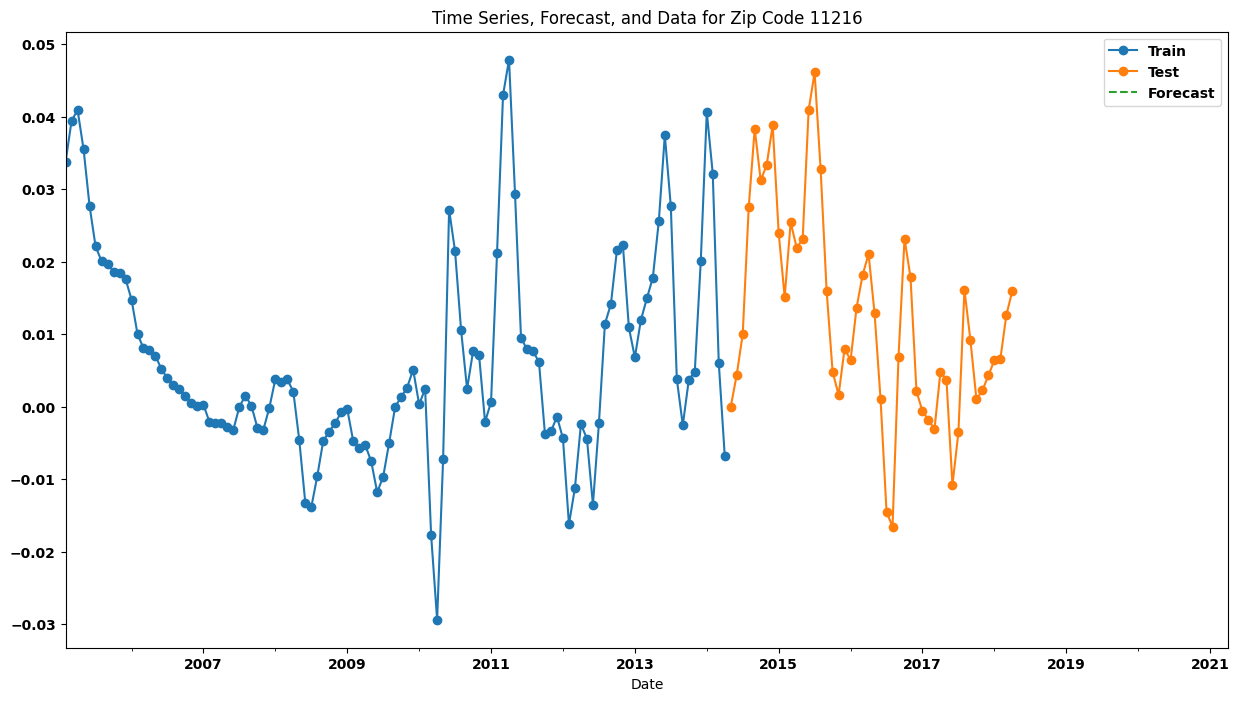

Summary for Zip Code 11222:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  111
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 457.607
Date:                Thu, 31 Aug 2023   AIC                           -907.213
Time:                        02:45:27   BIC                           -896.411
Sample:                    03-01-2005   HQIC                          -902.832
                         - 05-01-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.388e-05      0.000      0.102      0.919      -0.001       0.001
ar.L1          0.0057      0.546      0.010      0.992      -1.065       1.077
ma.L1          0.1397   

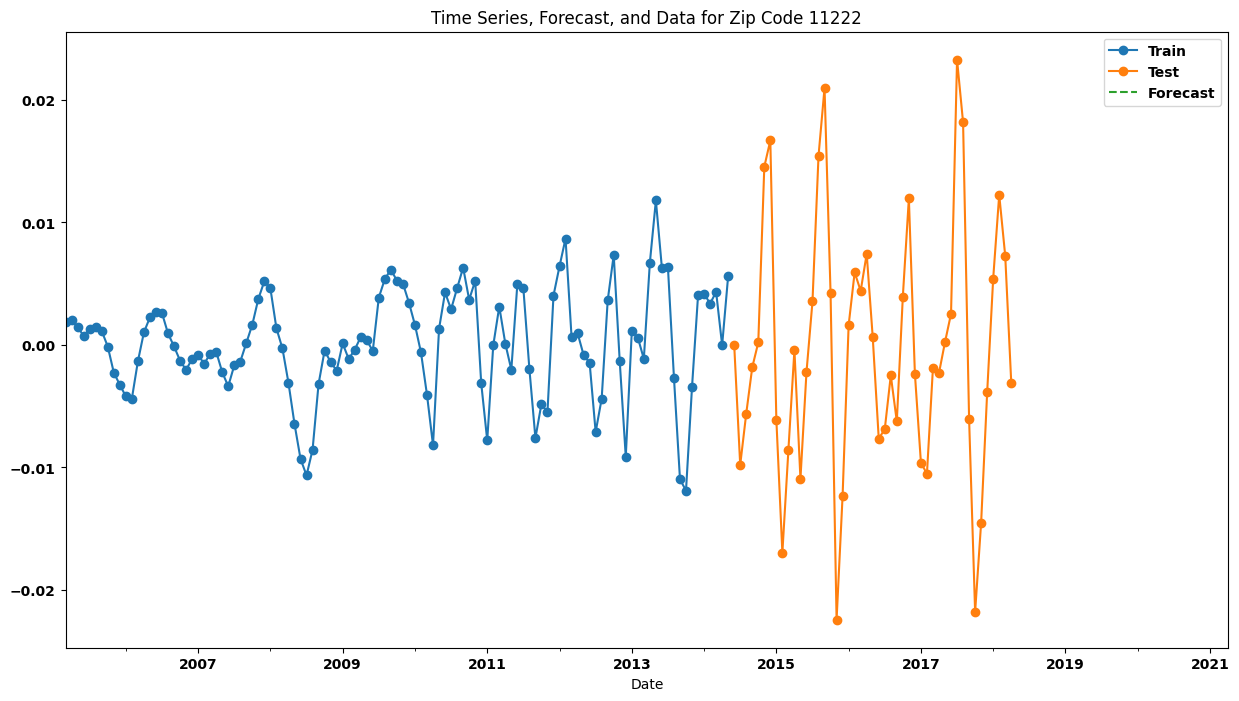

Summary for Zip Code 15201:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  111
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 426.322
Date:                Thu, 31 Aug 2023   AIC                           -844.644
Time:                        02:45:28   BIC                           -833.842
Sample:                    03-01-2005   HQIC                          -840.263
                         - 05-01-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -2.608e-06      0.000     -0.018      0.985      -0.000       0.000
ar.L1          0.4785      0.348      1.377      0.169      -0.203       1.160
ma.L1         -0.7107   

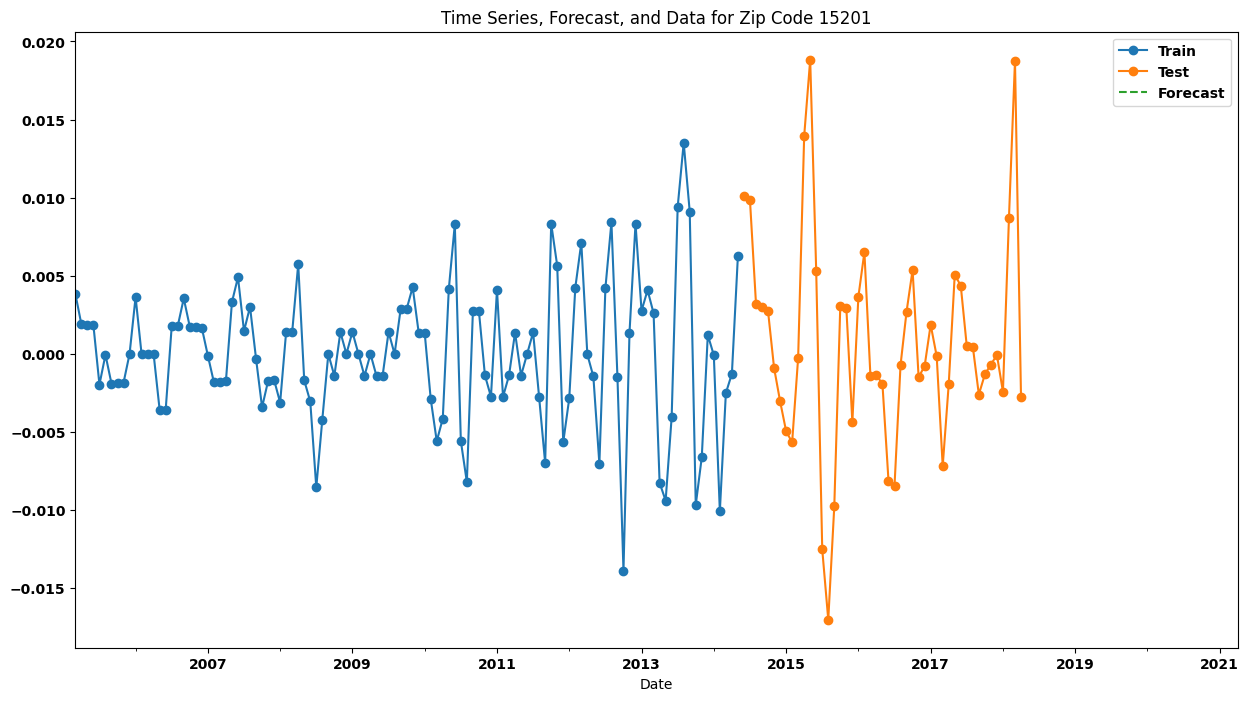

Summary for Zip Code 94043:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  111
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 456.191
Date:                Thu, 31 Aug 2023   AIC                           -904.383
Time:                        02:45:28   BIC                           -893.581
Sample:                    03-01-2005   HQIC                          -900.002
                         - 05-01-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -3.209e-06      0.000     -0.007      0.994      -0.001       0.001
ar.L1         -0.0722      0.467     -0.154      0.877      -0.988       0.844
ma.L1          0.2544   

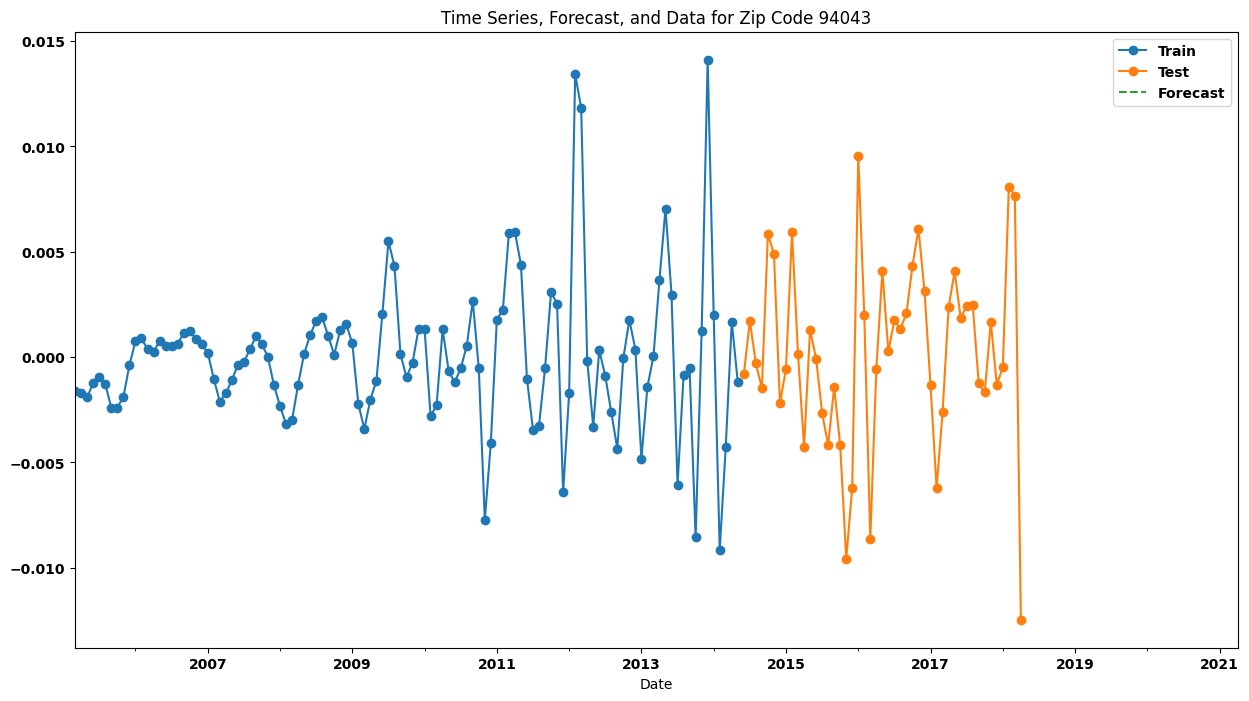

Summary for Zip Code 94301:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  111
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 449.569
Date:                Thu, 31 Aug 2023   AIC                           -891.137
Time:                        02:45:29   BIC                           -880.336
Sample:                    03-01-2005   HQIC                          -886.756
                         - 05-01-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -4.344e-05      0.000     -0.090      0.929      -0.001       0.001
ar.L1          0.0248      0.421      0.059      0.953      -0.801       0.851
ma.L1          0.1510   

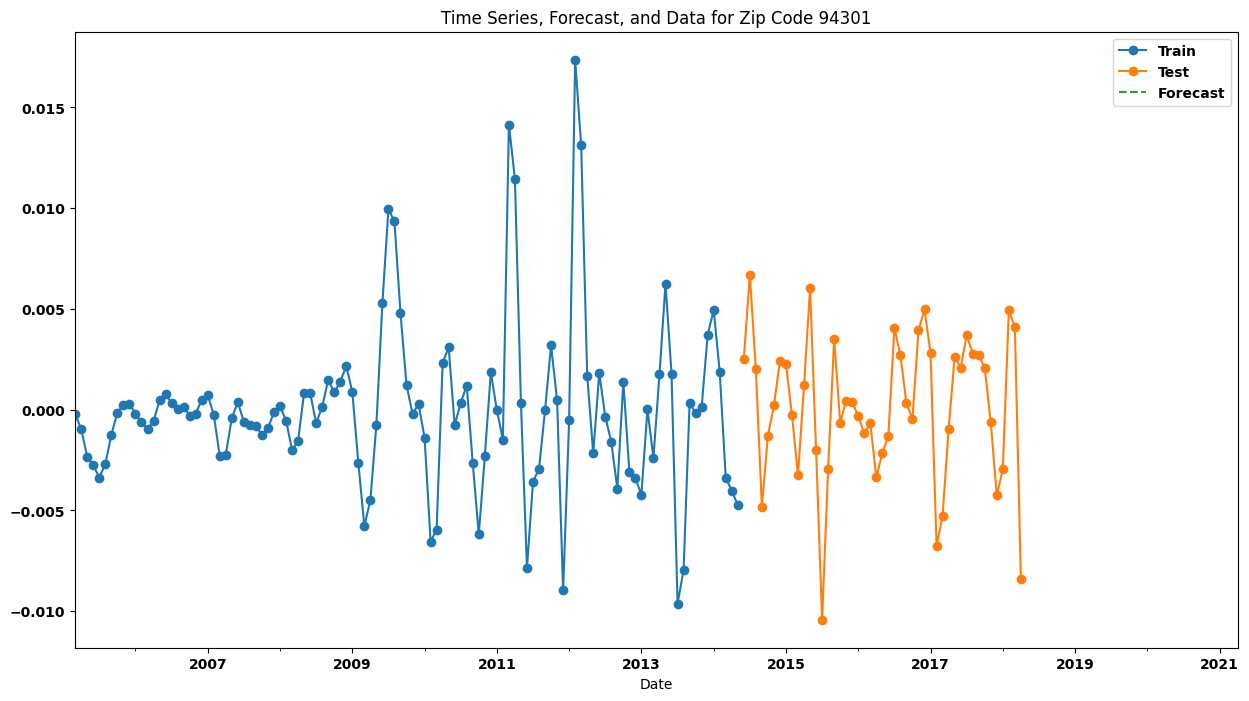

In [ ]:
#This code split the data into train and test split and visualize the focasting on the test split

# List of zip code time series data
zip_codes = ['11216', '11222', '15201', '94043', '94301']

# Using fixed ARIMA parameters (p, d, q) for all zip codes
fixed_p = 1
fixed_d = 1
fixed_q = 1

# Loop through each zip code in the list
for zipcode in zip_codes:
    ts = globals()['ts_' + zipcode]  # Get the time series data

    # Calculate the split index for training and testing
    train_size = 0.70  # Leaving approximately 3 years for test size
    split_idx = round(len(ts) * train_size)

    # Split the time series data into train and test sets
    train = ts.iloc[:split_idx]
    test = ts.iloc[split_idx:]

    # Fit the ARIMA model with fixed parameters to the training data
    model = pm.ARIMA(order=(fixed_p, fixed_d, fixed_q))
    model.fit(train)

    # Perform forecasting for the desired period (April 2018 to 2021)
    forecast_steps = 36  # Number of forecast steps (months from April 2018 to 2021)
    forecast = model.predict(n_periods=forecast_steps)

    # Print model summary
    print(f"Summary for Zip Code {zipcode}:")
    print(model.summary())
    print()

    # Visualize the split, time series data, and forecast
    fig, ax = plt.subplots()
    kws = dict(ax=ax, marker='o')
    train.plot(**kws, label='Train')
    test.plot(**kws, label='Test')
    forecast_index = pd.date_range(start=test.index[-1], periods=forecast_steps + 1, freq='M')[1:]
    forecast_series = pd.Series(forecast, index=forecast_index)
    forecast_series.plot(ax=ax, label='Forecast', linestyle='dashed')
    ax.legend(bbox_to_anchor=[1, 1])
    plt.title(f"Time Series, Forecast, and Data for Zip Code {zipcode}")
    plt.show()



In [ ]:
#Computating for rmse.

# List of zip code time series data
zip_codes = ['11216', '11222', '15201', '94043', '94301']

# Using fixed ARIMA parameters (p, d, q) for all zip codes
fixed_p = 1
fixed_d = 1
fixed_q = 1

# Dictionary to store RMSE values for each zip code
rmse_dict = {}

# Loop through each zip code in the list
for zipcode in zip_codes:
    ts = globals()['ts_' + zipcode]  # Get the time series data

    # Calculate the split index for training and testing
    train_size = 0.85  # Leaving approximately 3 years for test size
    split_idx = round(len(ts) * train_size)

    # Split the time series data into train and test sets
    train = ts.iloc[:split_idx]
    test = ts.iloc[split_idx:]

    # Fit the ARIMA model with fixed parameters to the training data
    model = pm.ARIMA(order=(fixed_p, fixed_d, fixed_q))
    model.fit(train)

    # Perform forecasting for the desired period (April 2018 to 2021)
    forecast_steps = len(test)  # Match forecast steps to length of test data
    forecast = model.predict(n_periods=forecast_steps)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(test, forecast))

    # Store RMSE in the dictionary
    rmse_dict[zipcode] = rmse

# Print RMSE values for each zip code
for zipcode, rmse in rmse_dict.items():
    print(f"RMSE for Zip Code {zipcode}: {rmse:.2f}")


RMSE for Zip Code 11216: 0.02
RMSE for Zip Code 11222: 0.01
RMSE for Zip Code 15201: 0.01
RMSE for Zip Code 94043: 0.00
RMSE for Zip Code 94301: 0.01




> **6.1.2 Results of Baseline ARIMA Model on Training data**



 Our Arima baseline model provides the below mean Squared Errors per each Zipcode: **{'11216': 0.02, '11222': 0.01, '15201': 0.01, '94043': 0.00, '94301': 0.01}**

 It's important to highlight that the model's predictions align closely with the actual values, indicating a strong predictive performance.
 This is evident across all five zip codes, where the mean squared error is exceptionally low, measured in the order of negative six exponent.

 This alignment between predictions and actual data is visually evident in the line graphs we've plotted.
 In these graphs, the lines representing the actual and predicted values are virtually overlapping, demonstrating their proximity.

In [ ]:

# Initializing ARIMA model
ARIMAmodel = sm.tsa.ARIMA(ts_94301, order=(2,0,3))
ARIMAmodel = ARIMAmodel.fit()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1123.269, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-889.320, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1054.587, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1046.436, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-846.771, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1138.492, Time=0.47 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1121.703, Time=0.19 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1145.443, Time=0.34 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.97 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1127.133, Time=0.41 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-1146.869, Time=0.63 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=-1154.822, Time=0.97 sec
 ARIMA(0,0,5)(0,0,0)[0] intercept   : AIC=-1154.433, Time=0.65 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept

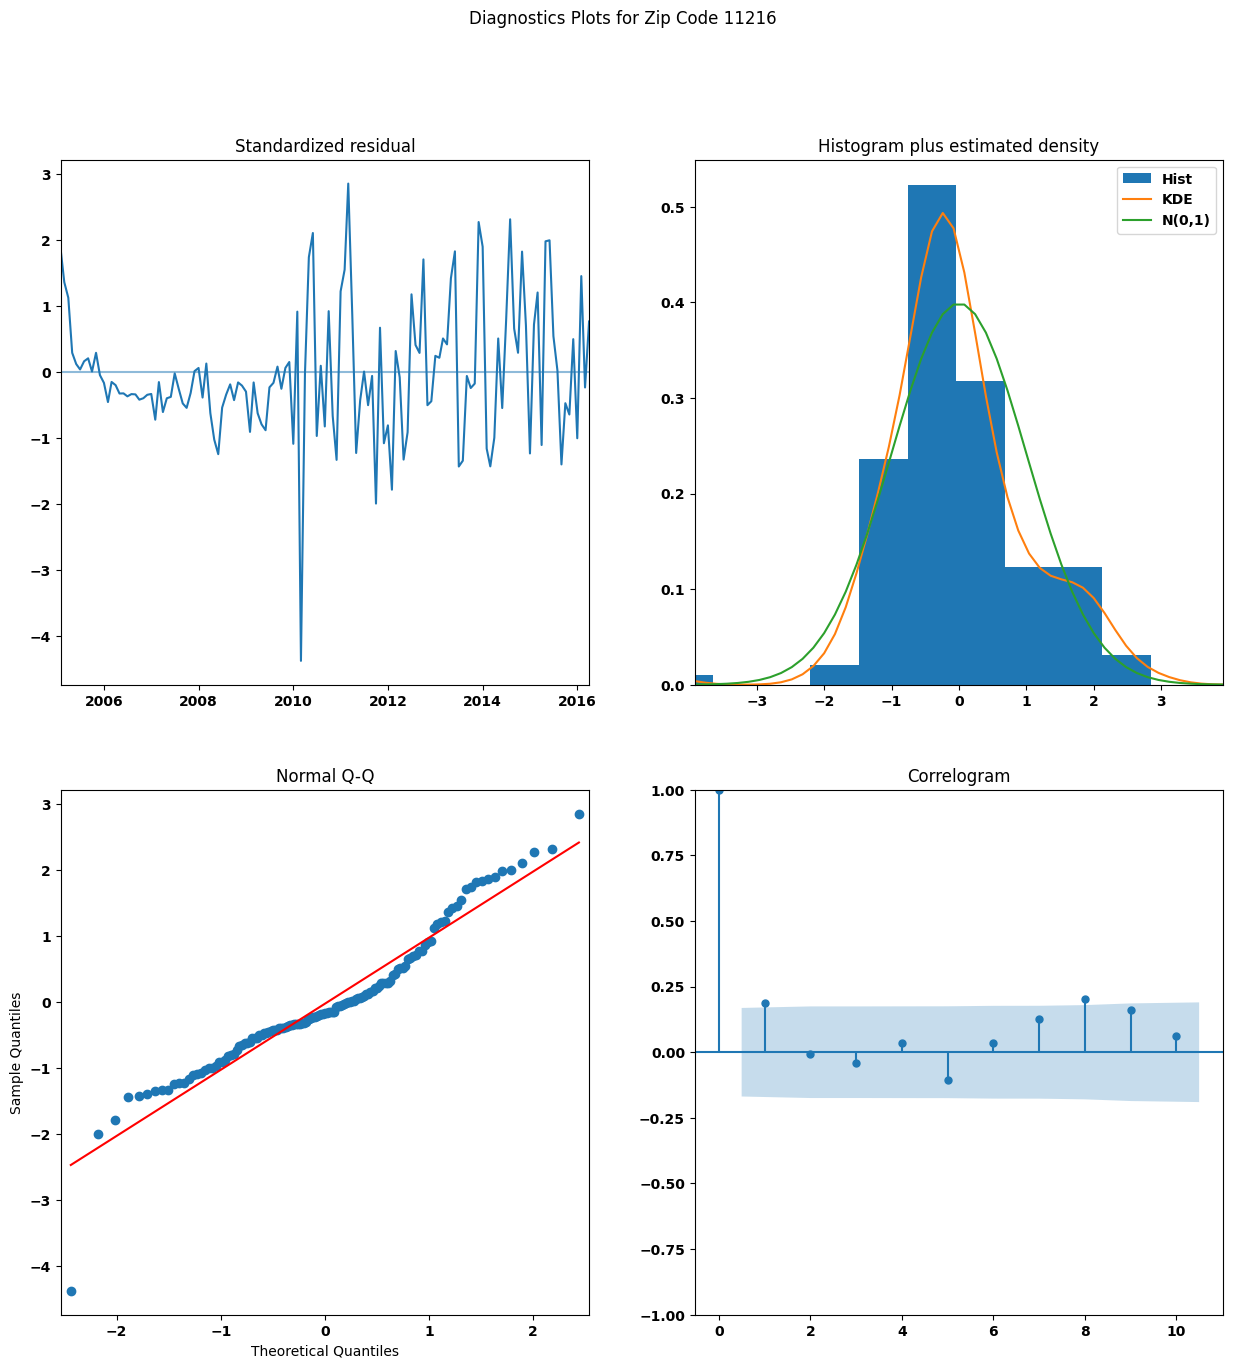

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1244.087, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1128.108, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1175.636, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1208.773, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1130.108, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1197.296, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1235.491, Time=0.09 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1216.468, Time=0.61 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1244.181, Time=0.48 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1257.503, Time=0.54 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-1263.635, Time=0.42 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1230.375, Time=0.24 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=-1256.992, Time=0.79 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-1253.896, Time=0.26 sec
 ARIMA(0,0,3)(0,0,0

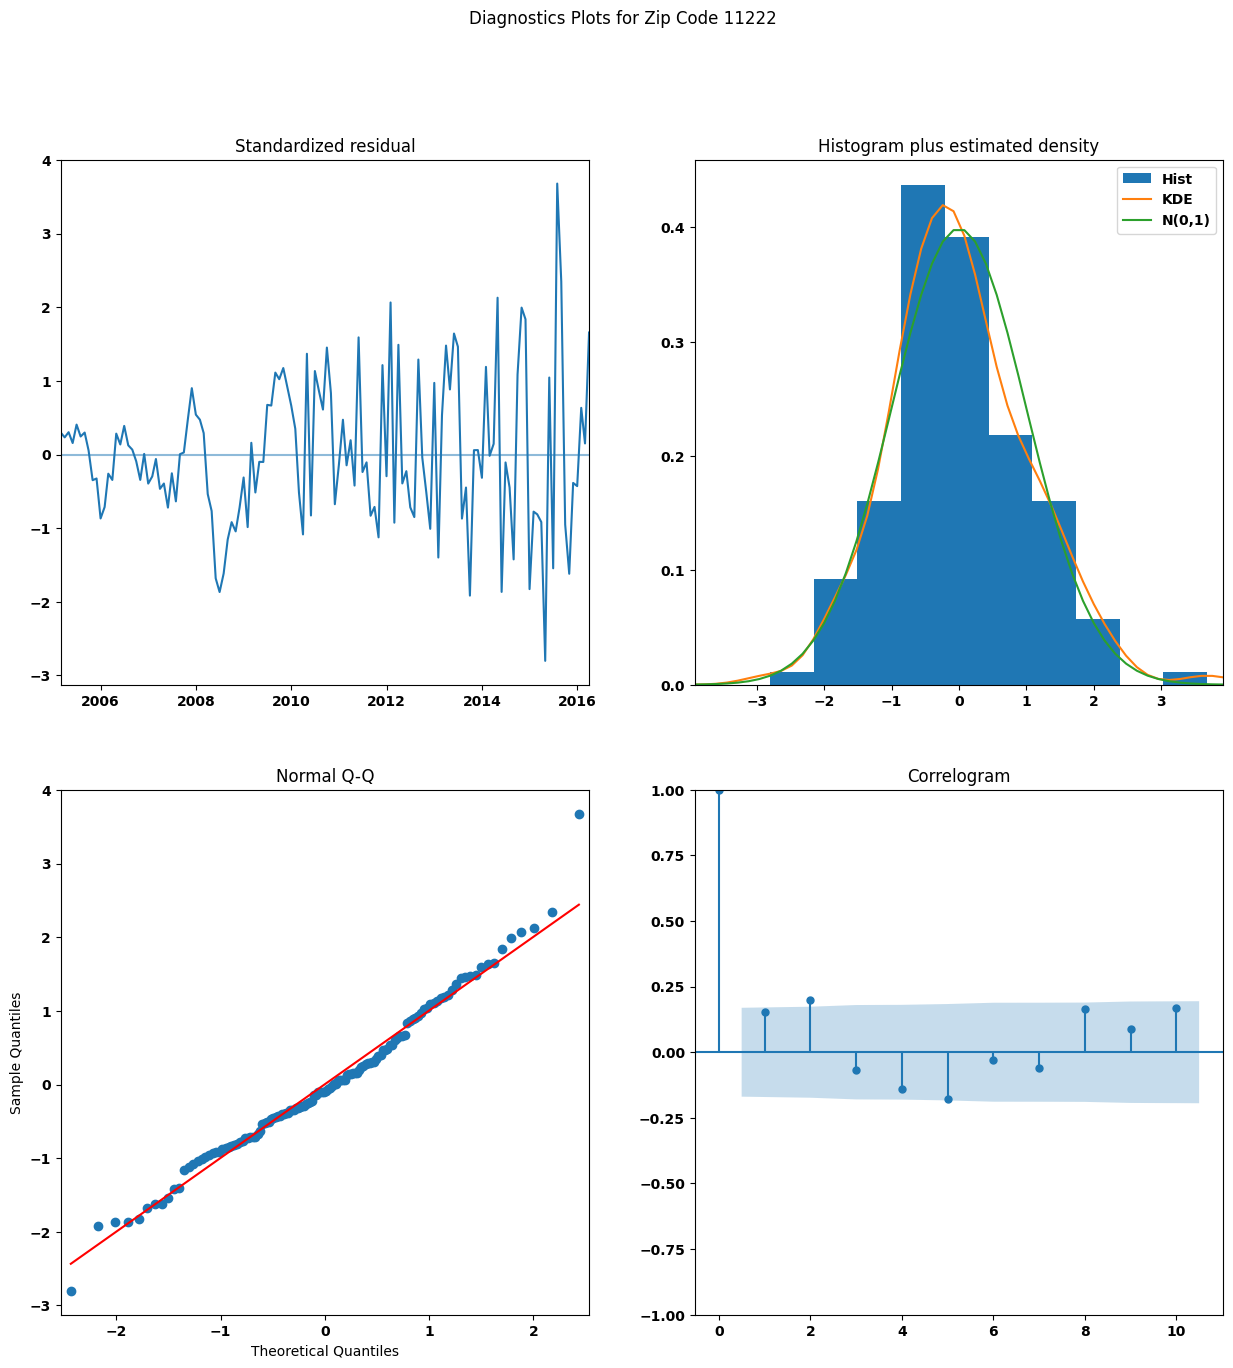

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1279.175, Time=0.47 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1203.702, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1225.708, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1253.873, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1205.491, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1237.125, Time=0.36 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1271.182, Time=0.16 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1269.039, Time=0.41 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1274.829, Time=0.22 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1251.991, Time=0.34 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1269.536, Time=0.35 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-1272.866, Time=0.48 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-1279.733, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0]  

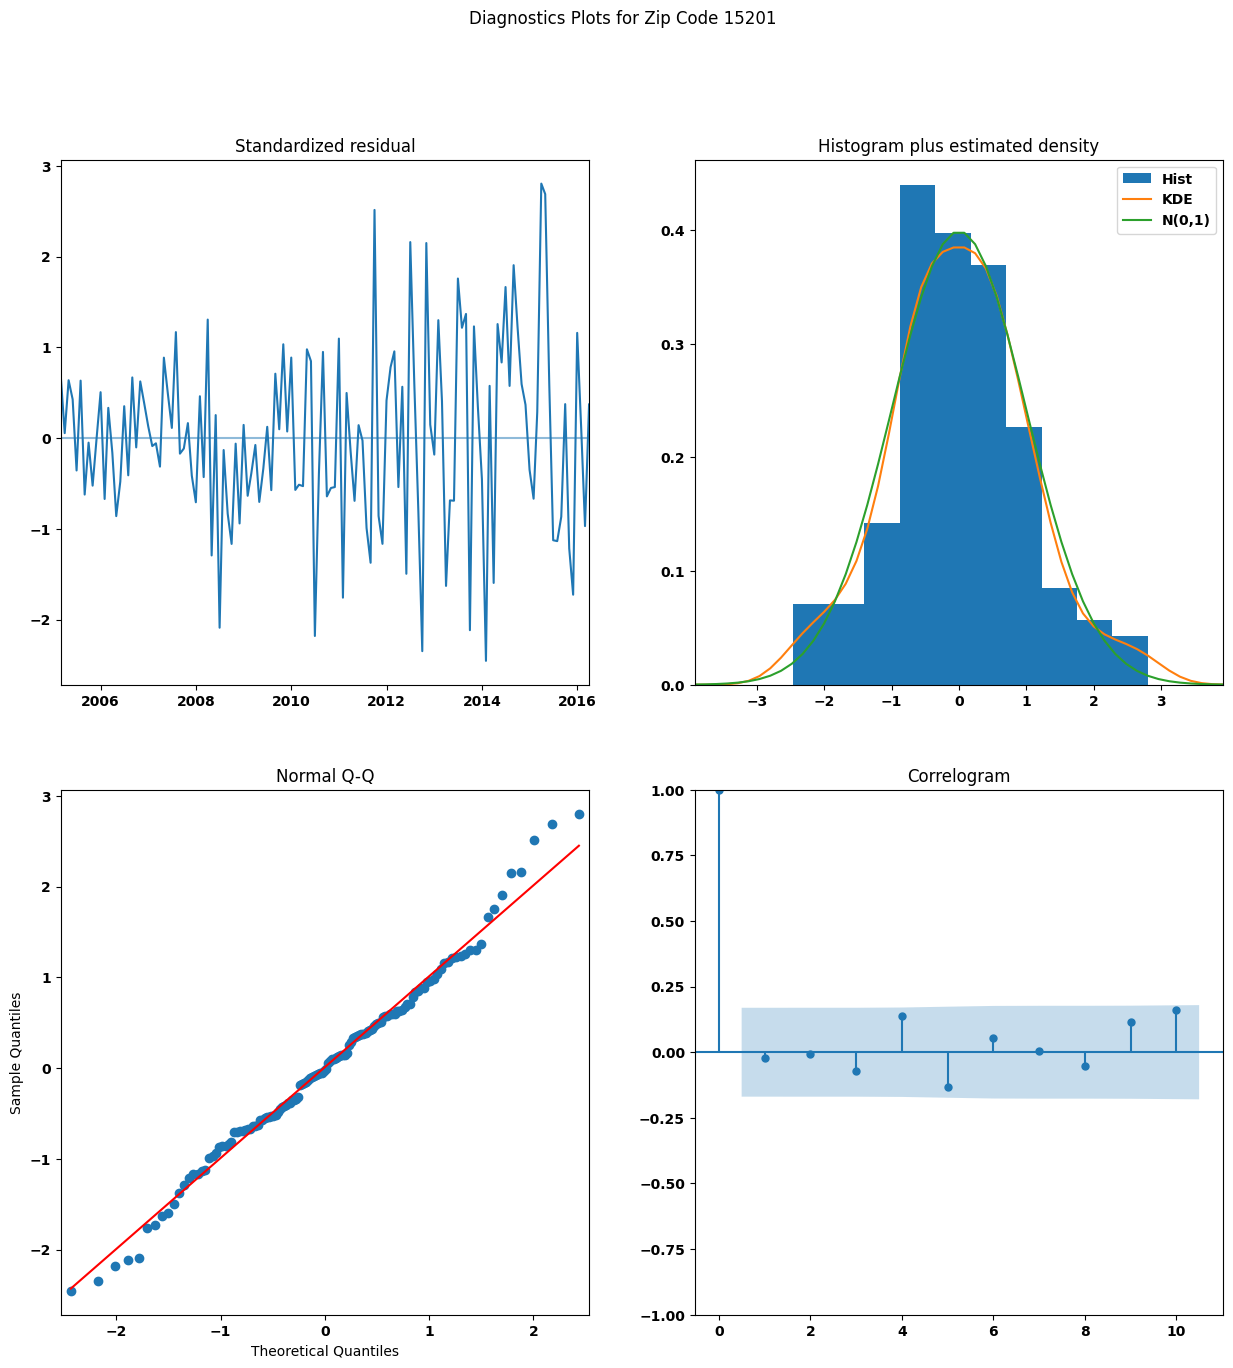

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1409.737, Time=0.99 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1309.933, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1320.680, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1364.105, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1311.903, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1371.324, Time=0.85 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1397.531, Time=1.37 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1396.316, Time=2.42 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1426.367, Time=1.96 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1413.846, Time=0.96 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-1422.369, Time=1.16 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=-1421.801, Time=2.25 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-1423.410, Time=2.00 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=-1418.904, Time=1.93 sec
 ARIMA(2,0,3)(0,0,0

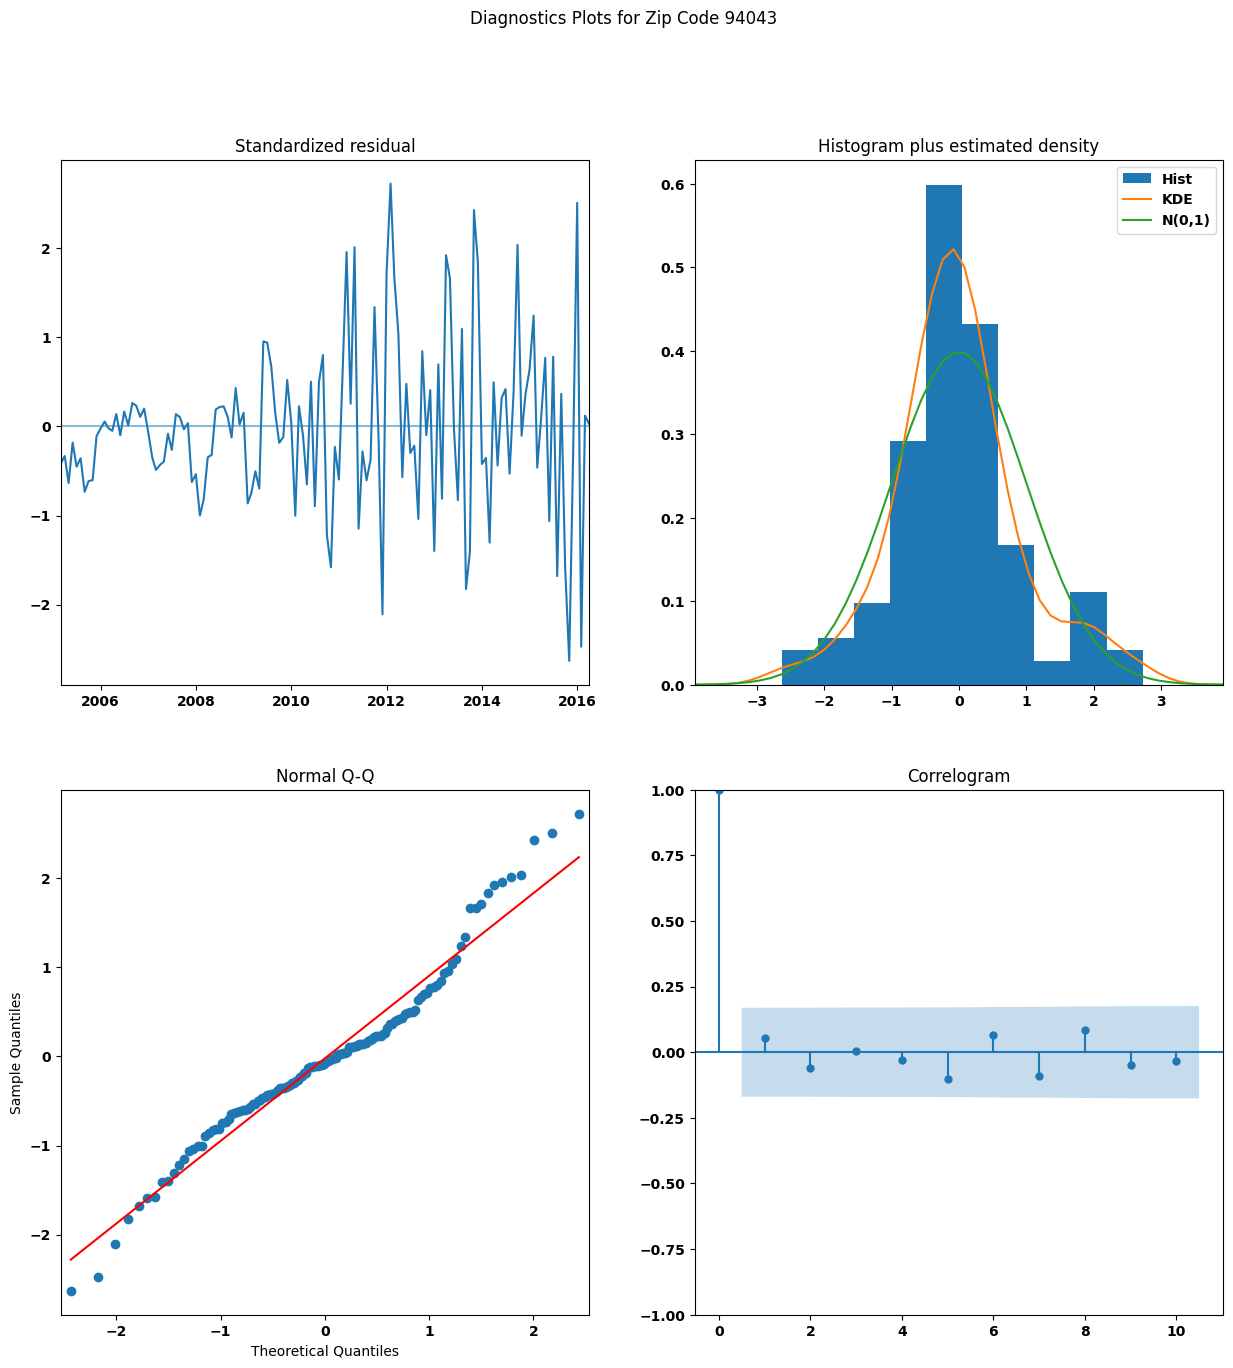

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1396.087, Time=1.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1294.426, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1324.554, Time=0.17 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1359.552, Time=0.71 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1296.425, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1356.165, Time=0.85 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1380.651, Time=1.06 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1377.369, Time=1.49 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1416.075, Time=1.58 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1409.292, Time=0.35 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-1391.863, Time=1.45 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=-1406.863, Time=0.80 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-1411.258, Time=1.09 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=-1394.669, Time=2.27 sec
 ARIMA(2,0,3)(0,0,0

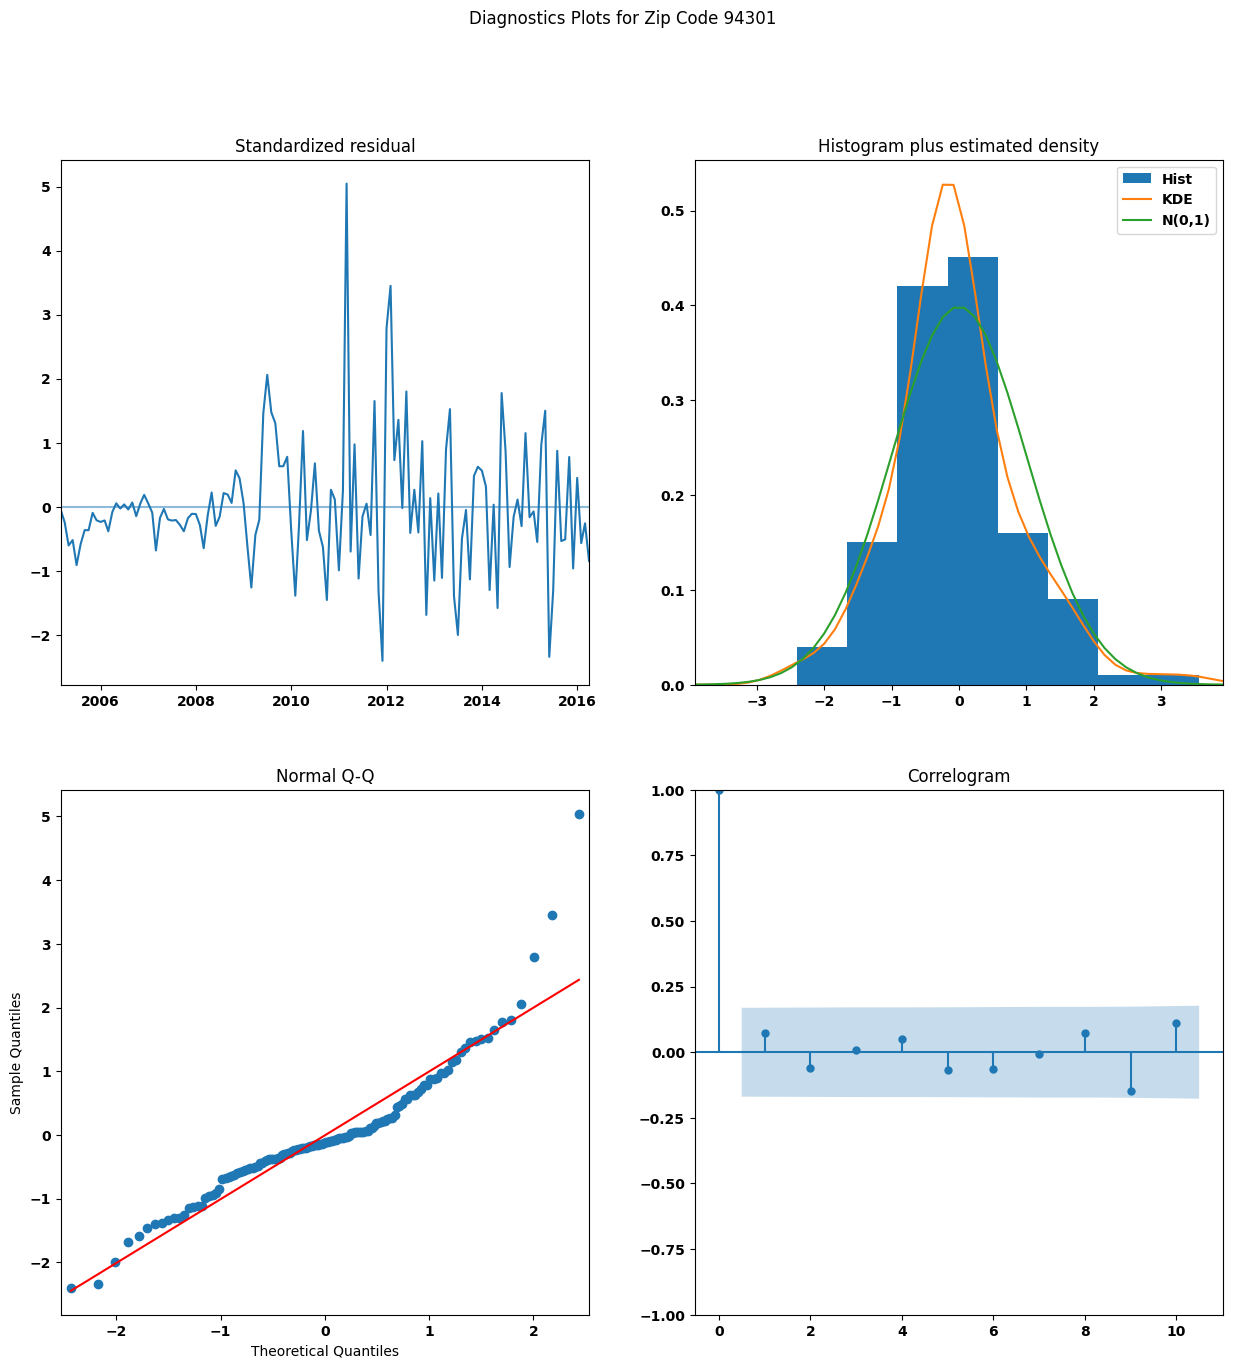

In [ ]:
#Taking the best ARIMA based on baseline model

# List of zip code time series data
zip_codes = ['11216', '11222', '15201', '94043', '94301']

# Using auto_arima for each zip code
for zipcode in zip_codes:
    ts = globals()['ts_' + zipcode]  # Get the time series data

    # Using auto_arima to find the best p, d, q for the model
    model = pm.auto_arima(ts, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

    # Print model summary
    print(f"Summary for Zip Code {zipcode}:")
    print(model.summary())
    print()

    # Calculate the split index for training and testing
    train_size = 0.85  # Leaving approximately 3 years for test size
    split_idx = round(len(ts) * train_size)

    # Split the time series data into train and test sets
    train = ts.iloc[:split_idx]
    test = ts.iloc[split_idx:]

    # Print diagnostics plots
    model_fit = pm.ARIMA(order=model.order)
    model_fit.fit(train)

    model_fit.plot_diagnostics(figsize=(15, 15))
    plt.suptitle(f"Diagnostics Plots for Zip Code {zipcode}")
    plt.show()


Based on the above observation:

* Zip Code 11216:
Best Model: SARIMA(1,0,5)(0,0,0)[0] intercept
Log Likelihood: 588.588
AIC: -1161.176

* Zip Code 11222:
Best Model: SARIMA(0,0,3)(0,0,0)[0] intercept
Log Likelihood: 638.221
AIC: -1268.441

* Zip Code 15201:

Best Model: SARIMA(2,0,2)(0,0,0)[0] intercept
Log Likelihood: 644.867
AIC: -1279.733

* Zip Code 94043:
Best Model: SARIMA(3,0,3)(0,0,0)[0] intercept
Log Likelihood: 722.161
AIC: -1430.321

* Zip Code 94301:

Best Model: SARIMA(2,0,3)(0,0,0)[0] intercept
Log Likelihood: 715.038
AIC: -1416.075

For each zip code, the summary provides information about the best SARIMA model, including its order of AR and MA components, the log likelihood, AIC, estimated coefficients, residual diagnostics, and warnings if applicable. These details help in understanding the chosen model's fit to the data and its quality.

### <a id='toc1_7_1'></a>[6.2 Model 2 Exponential Smoothing](#toc0_)

Exponential Smoothing is a time series forecasting method that focuses on capturing the underlying patterns and trends in the data. The summary provides information about how well the Exponential Smoothing model fits the data and helps in making forecasts.

Summary for Zip Code 11216:
                       ExponentialSmoothing Model Results                       
Dep. Variable:                      ret   No. Observations:                  111
Model:             ExponentialSmoothing   SSE                              0.008
Optimized:                         True   AIC                          -1027.337
Trend:                             None   BIC                           -989.403
Seasonal:                      Additive   AICC                         -1021.549
Seasonal Periods:                    12   Date:                 Thu, 31 Aug 2023
Box-Cox:                          False   Time:                         02:46:39
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.9978412                alpha                 Tr

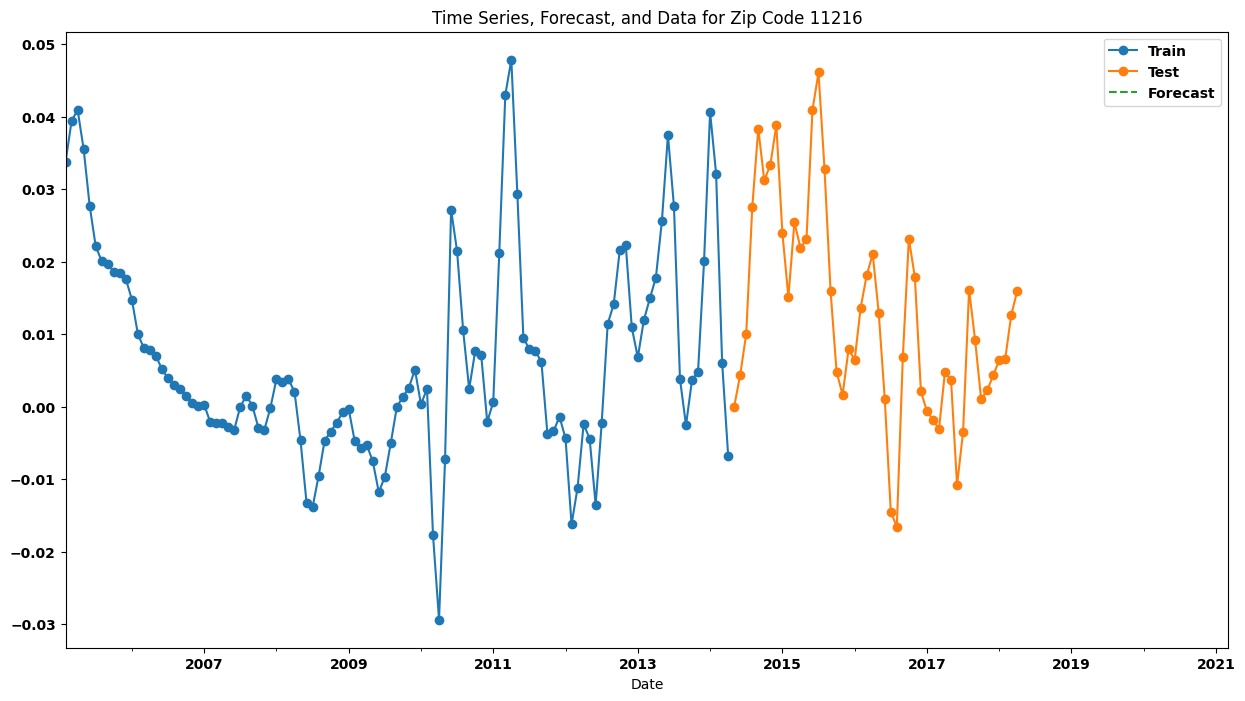

Summary for Zip Code 11222:
                       ExponentialSmoothing Model Results                       
Dep. Variable:                      ret   No. Observations:                  111
Model:             ExponentialSmoothing   SSE                              0.002
Optimized:                         True   AIC                          -1210.414
Trend:                             None   BIC                          -1172.480
Seasonal:                      Additive   AICC                         -1204.627
Seasonal Periods:                    12   Date:                 Thu, 31 Aug 2023
Box-Cox:                          False   Time:                         02:46:40
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.9955455                alpha                 Tr

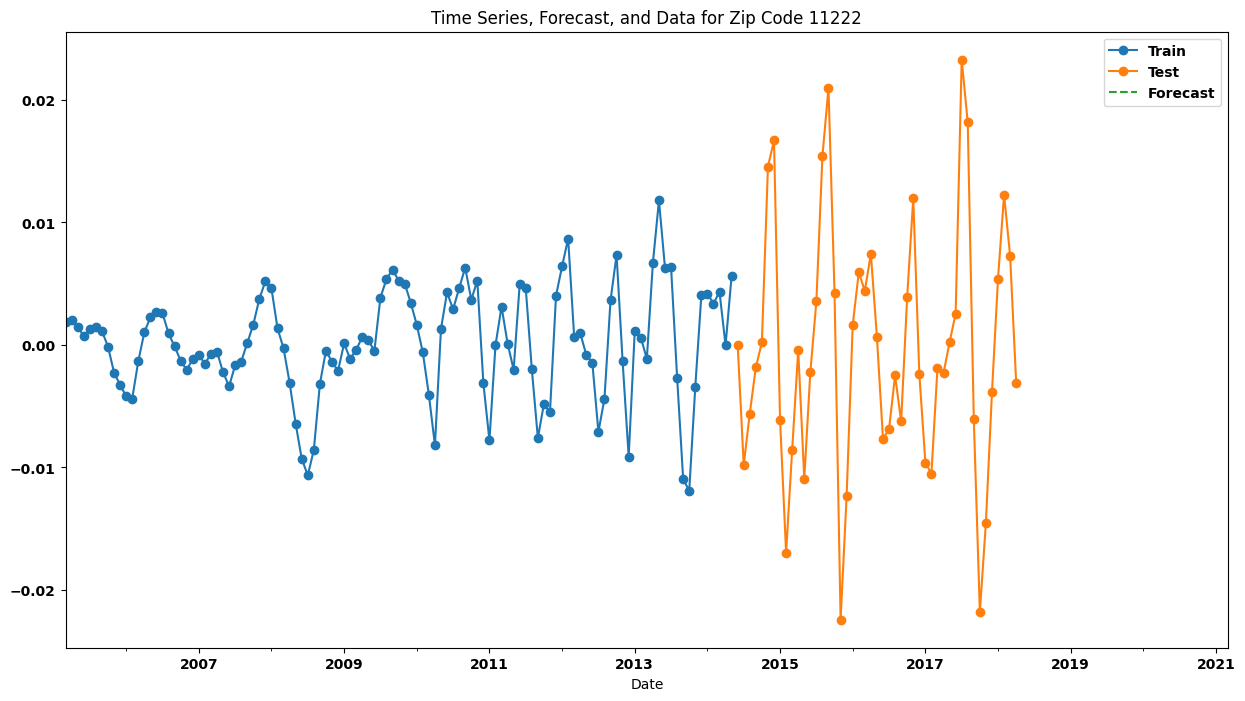

Summary for Zip Code 15201:
                       ExponentialSmoothing Model Results                       
Dep. Variable:                      ret   No. Observations:                  111
Model:             ExponentialSmoothing   SSE                              0.002
Optimized:                         True   AIC                          -1177.127
Trend:                             None   BIC                          -1139.194
Seasonal:                      Additive   AICC                         -1171.340
Seasonal Periods:                    12   Date:                 Thu, 31 Aug 2023
Box-Cox:                          False   Time:                         02:46:41
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0047067                alpha                 Tr

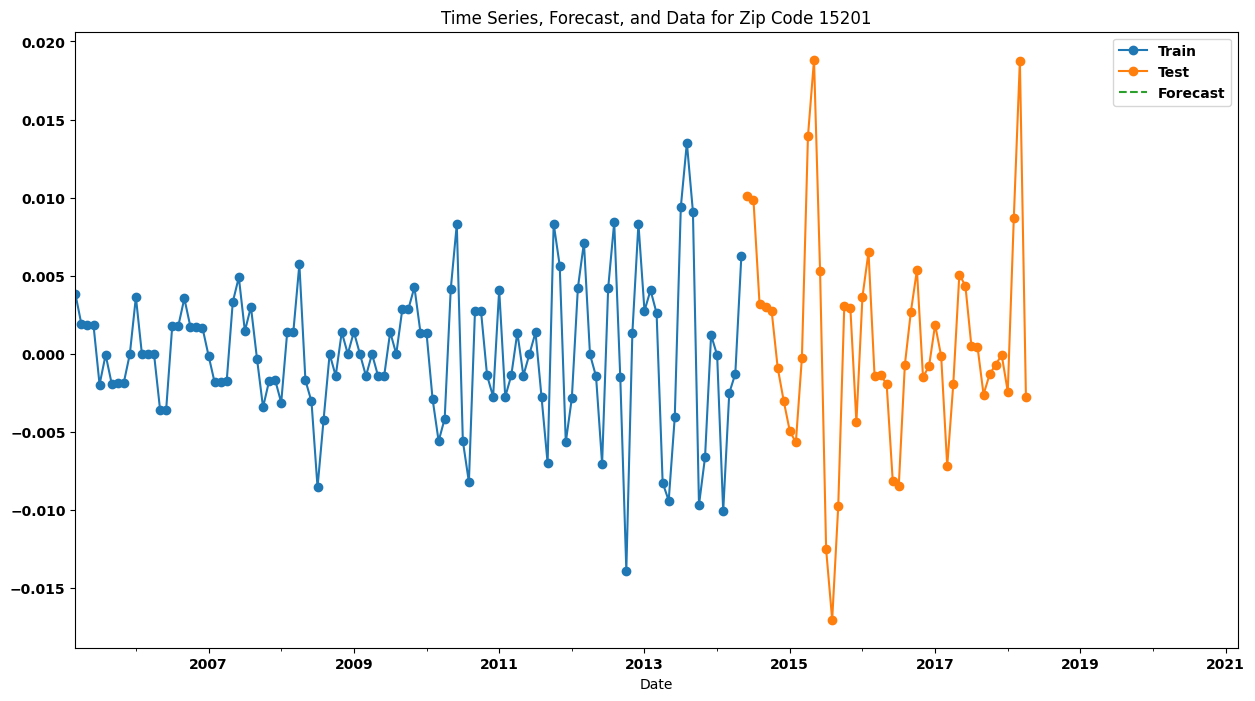

Summary for Zip Code 94043:
                       ExponentialSmoothing Model Results                       
Dep. Variable:                      ret   No. Observations:                  111
Model:             ExponentialSmoothing   SSE                              0.001
Optimized:                         True   AIC                          -1224.274
Trend:                             None   BIC                          -1186.340
Seasonal:                      Additive   AICC                         -1218.486
Seasonal Periods:                    12   Date:                 Thu, 31 Aug 2023
Box-Cox:                          False   Time:                         02:46:42
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0282278                alpha                 Tr

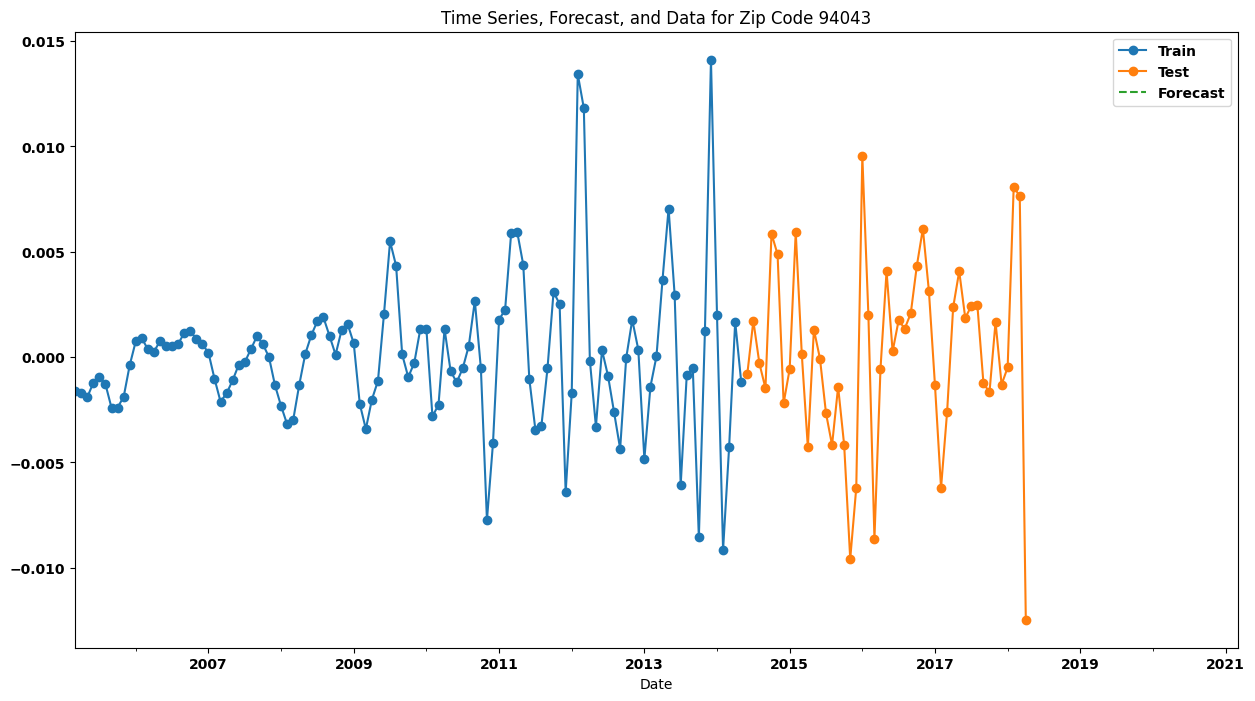

Summary for Zip Code 94301:
                       ExponentialSmoothing Model Results                       
Dep. Variable:                      ret   No. Observations:                  111
Model:             ExponentialSmoothing   SSE                              0.002
Optimized:                         True   AIC                          -1191.364
Trend:                             None   BIC                          -1153.431
Seasonal:                      Additive   AICC                         -1185.577
Seasonal Periods:                    12   Date:                 Thu, 31 Aug 2023
Box-Cox:                          False   Time:                         02:46:43
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.9954640                alpha                 Tr

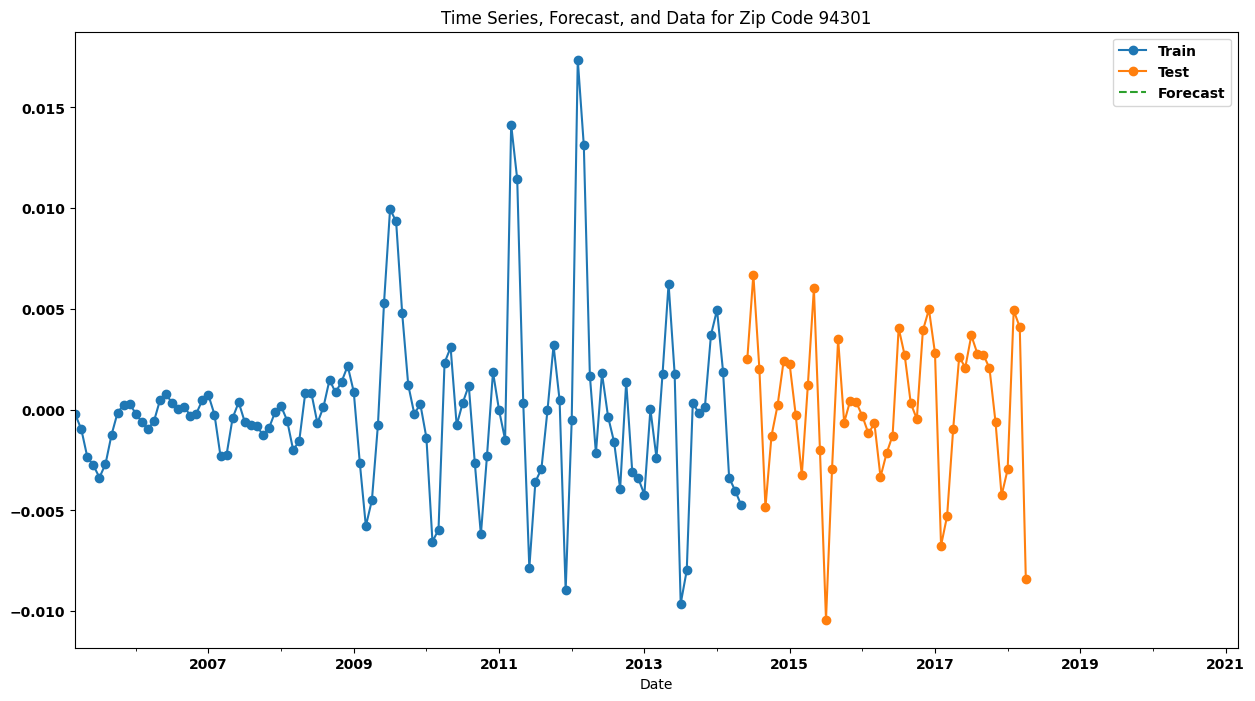

In [ ]:
#Exponential smoothing

# List of zip code time series data
zip_codes = ['11216', '11222', '15201', '94043', '94301']

# Loop through each zip code in the list
for zipcode in zip_codes:
    ts = globals()['ts_' + zipcode]  # Get the time series data

    # Calculate the split index for training and testing
    train_size = 0.7  # Leaving approximately 3 years for test size
    split_idx = round(len(ts) * train_size)

    # Split the time series data into train and test sets
    train = ts.iloc[:split_idx]
    test = ts.iloc[split_idx:]

    # Fit the Holt-Winters model to the training data
    model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=12)
    model_fit = model.fit()

    # Perform forecasting for the desired period (April 2018 to 2021)
    forecast_steps = 36  # Number of forecast steps (months from April 2018 to 2021)
    forecast = model_fit.forecast(steps=forecast_steps)

    # Print model summary
    print(f"Summary for Zip Code {zipcode}:")
    print(model_fit.summary())
    print()

    # Visualize the split, time series data, and forecast
    fig, ax = plt.subplots()
    kws = dict(ax=ax, marker='o')
    train.plot(**kws, label='Train')
    test.plot(**kws, label='Test')
    forecast_index = pd.date_range(start=test.index[-1], periods=forecast_steps, freq='M')
    forecast_series = pd.Series(forecast, index=forecast_index)
    forecast_series.plot(ax=ax, label='Forecast', linestyle='dashed')
    ax.legend(bbox_to_anchor=[1, 1])
    plt.title(f"Time Series, Forecast, and Data for Zip Code {zipcode}")
    plt.show()




> **6.2.1 Results of the model**



Based on obesrvation above:
* Zip Code 11216:

No. Observations: 111
SSE (Sum of Squared Errors): 0.008
AIC (Akaike Information Criterion): -1027.337
BIC (Bayesian Information Criterion): -989.403


* Zip Code 11222:
SSE: 0.002
AIC: -1210.414
BIC: -1172.480

* Zip Code 15201:

Seasonal Periods: 12
SSE: 0.002
AIC: -1177.127
BIC: -1139.194

* Zip Code 94043:

Seasonal Periods: 12
SSE: 0.001
AIC: -1224.274
BIC: -1186.340


* Zip Code 94301:

Seasonal Periods: 12
SSE: 0.002
AIC: -1191.364
BIC: -1153.431

* Each summary provides information about the Exponential Smoothing model's
  coefficients, optimization codes, and whether optimization was successful (True). It also includes relevant statistics such as the smoothing level, smoothing seasonal factor, initial levels, and initial seasonal factors for each season. Additionally, the summary includes goodness-of-fit measures such as the AIC and BIC, which can be used to compare models.

In [ ]:
# Evaluating on rmse

import numpy as np
# Calculate RMSE
rmse = np.sqrt(np.mean((test - forecast)**2))

print(f"RMSE: {rmse}")


RMSE: 0.006508799442559519


* A lower RMSE value indicates a better fit of the model to the data.
  From our computed RMSE of 0.00393 is relatively low hence the model seems to be well performing.

### <a id='toc1_7_2'></a>[6.3 Testing The Model's Performance](#toc0_)

In [ ]:
# creating a table of the upper and lower limits
import statsmodels.api as sm
pred = ARIMAmodel.get_prediction(start=pd.to_datetime('2015-02'), end=pd.to_datetime('2018-04'), dynamic=False)
pred_conf = pred.conf_int()
pred_conf.head()

lower ret  upper ret
Date                            
2015-02-01  -0.005037   0.005305
2015-03-01  -0.007215   0.003127
2015-04-01  -0.006291   0.004051
2015-05-01  -0.003013   0.007329
2015-06-01  -0.001269   0.009073

* Plotting the training data against the test data

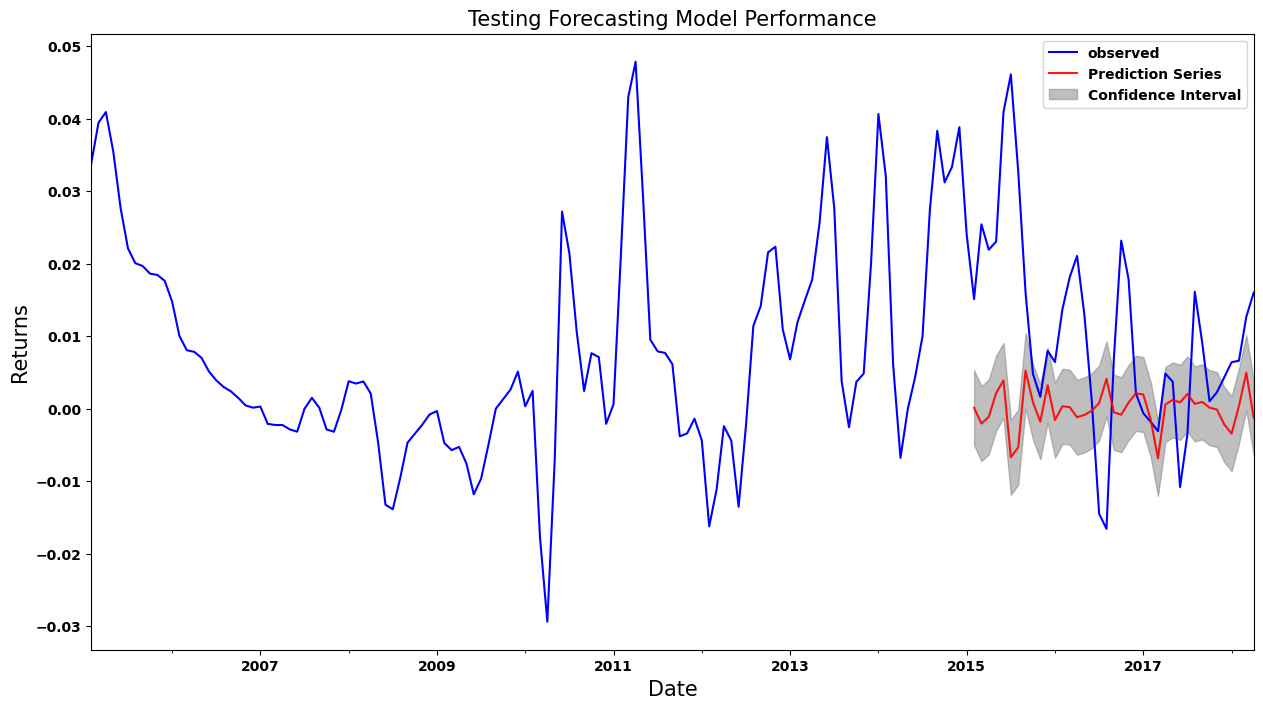

In [ ]:
# Plot real vs predicted values along with confidence interval
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 8

# Plot observed values
ax = ts_11216.plot(label='observed',c="blue")

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='Prediction Series', alpha=0.9,c="red")

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='gray', alpha=0.5,label = 'Confidence Interval')

# Set axes labels
ax.set_xlabel('Date',fontsize=15)
ax.set_ylabel('Returns',fontsize=15)
ax.set_title('Testing Forecasting Model Performance',fontsize=15)
plt.legend()

plt.show()

* The code below performs prediction for all the zipcodes test dataset to ascertain the ability to predict the future prices.

RMSE for Zip Code 11216: 0.02


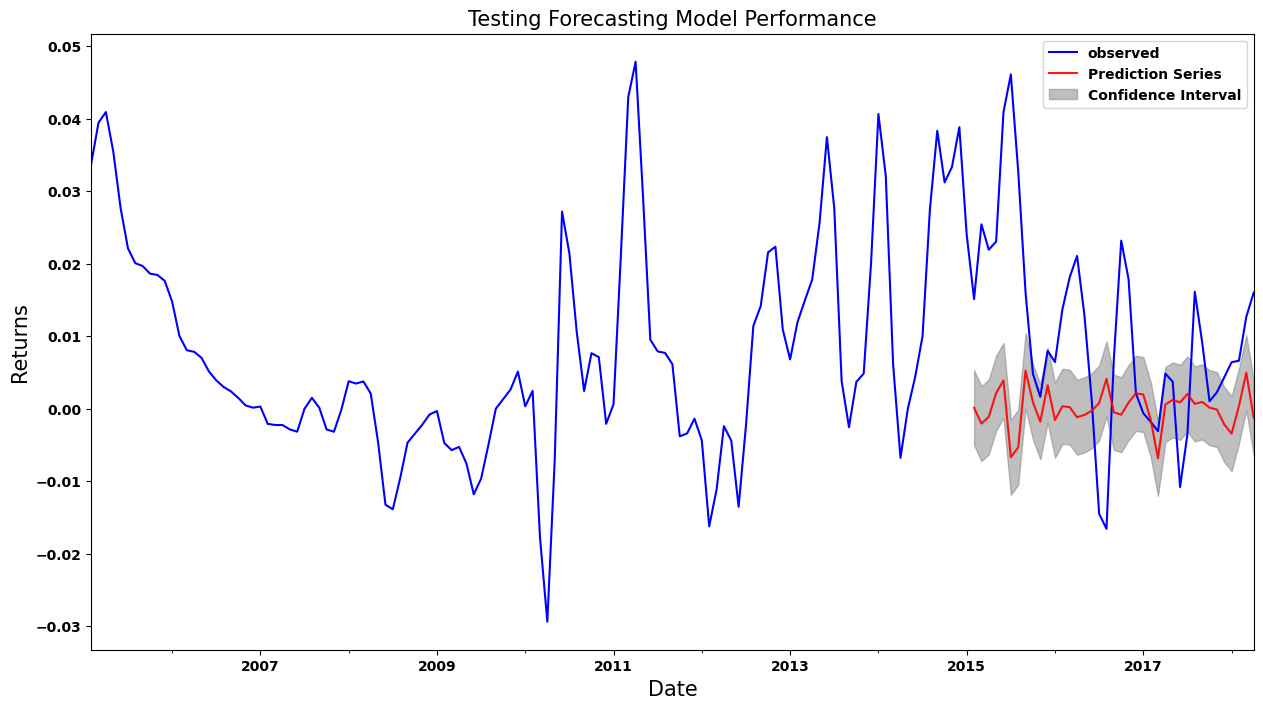

RMSE for Zip Code 11222: 0.01


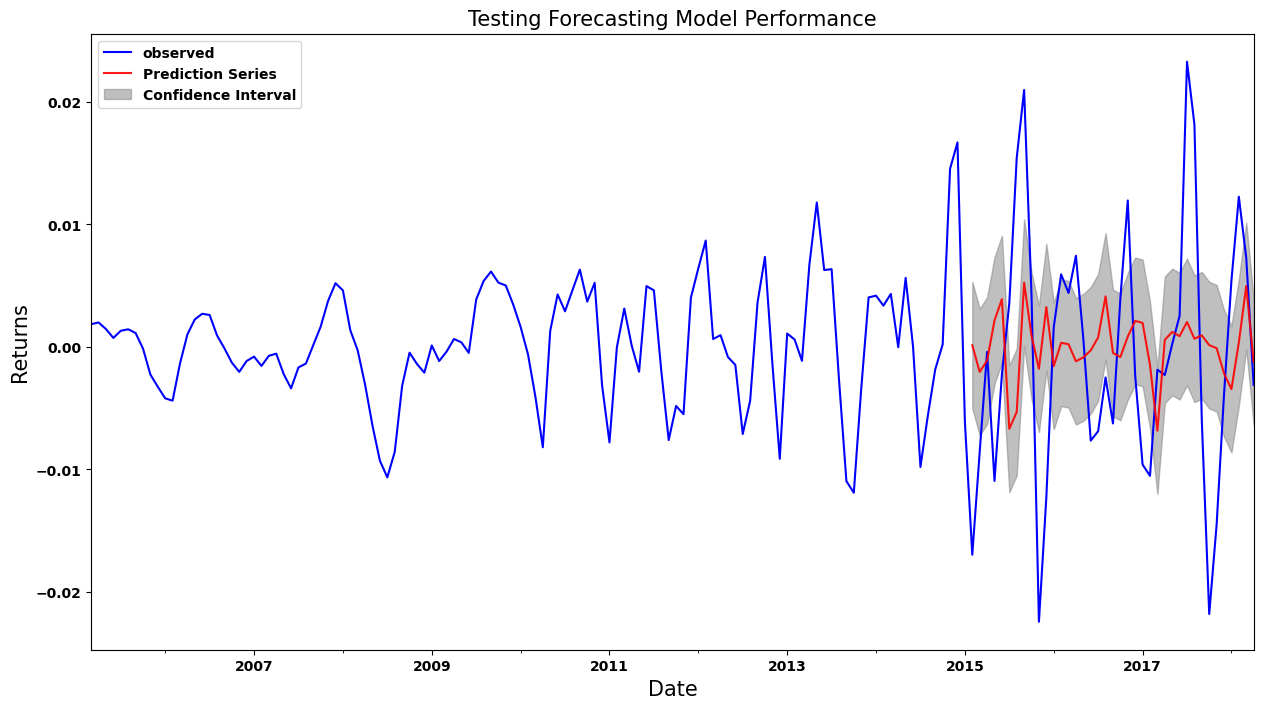

RMSE for Zip Code 15201: 0.01


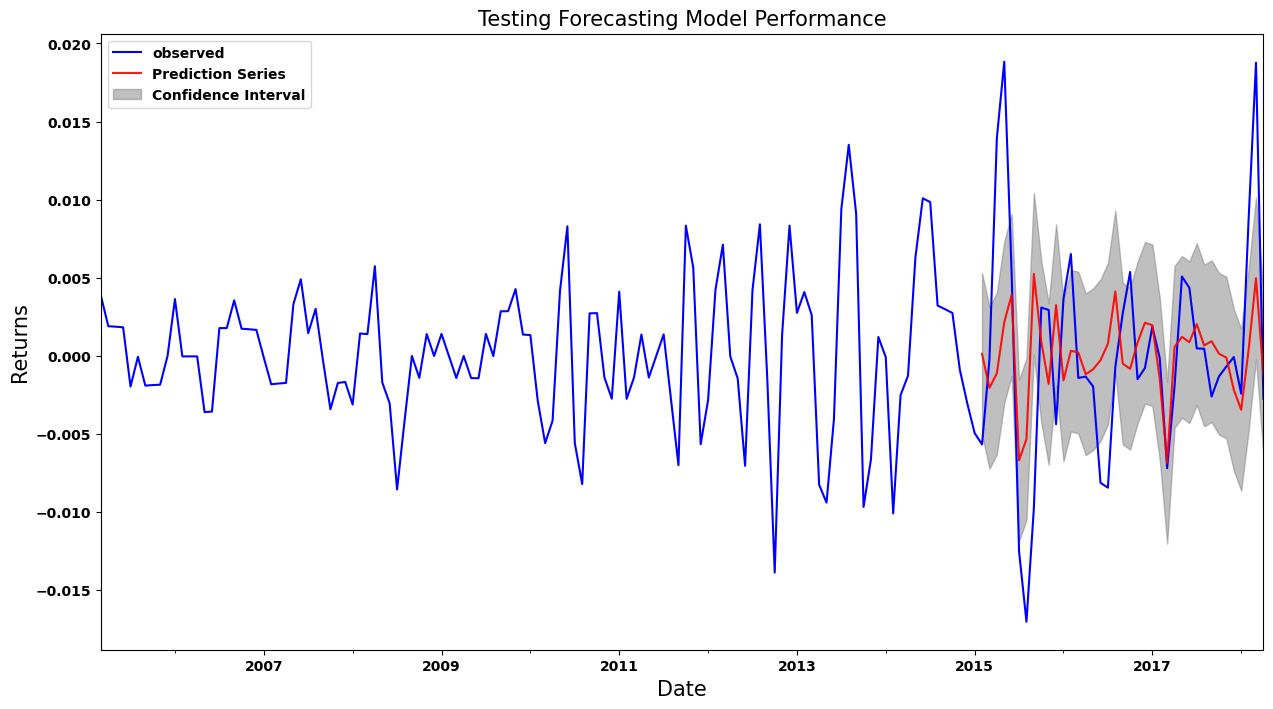

RMSE for Zip Code 94043: 0.00


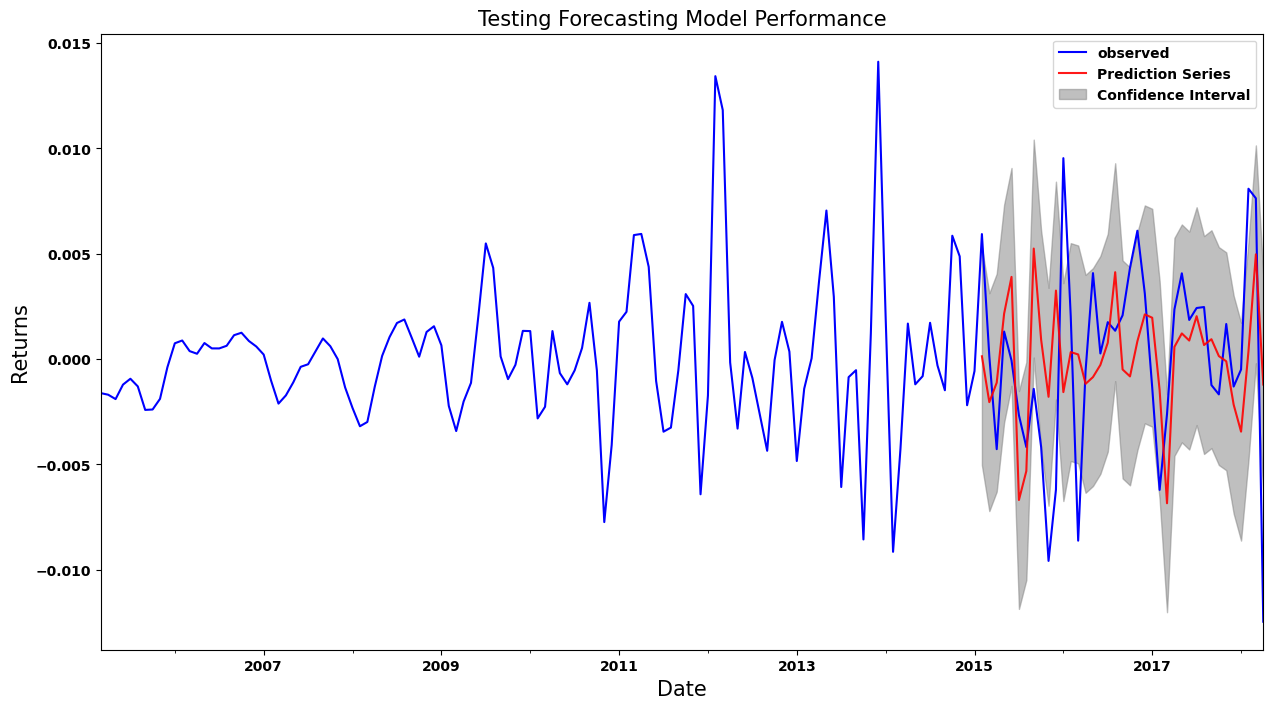

RMSE for Zip Code 94301: 0.00


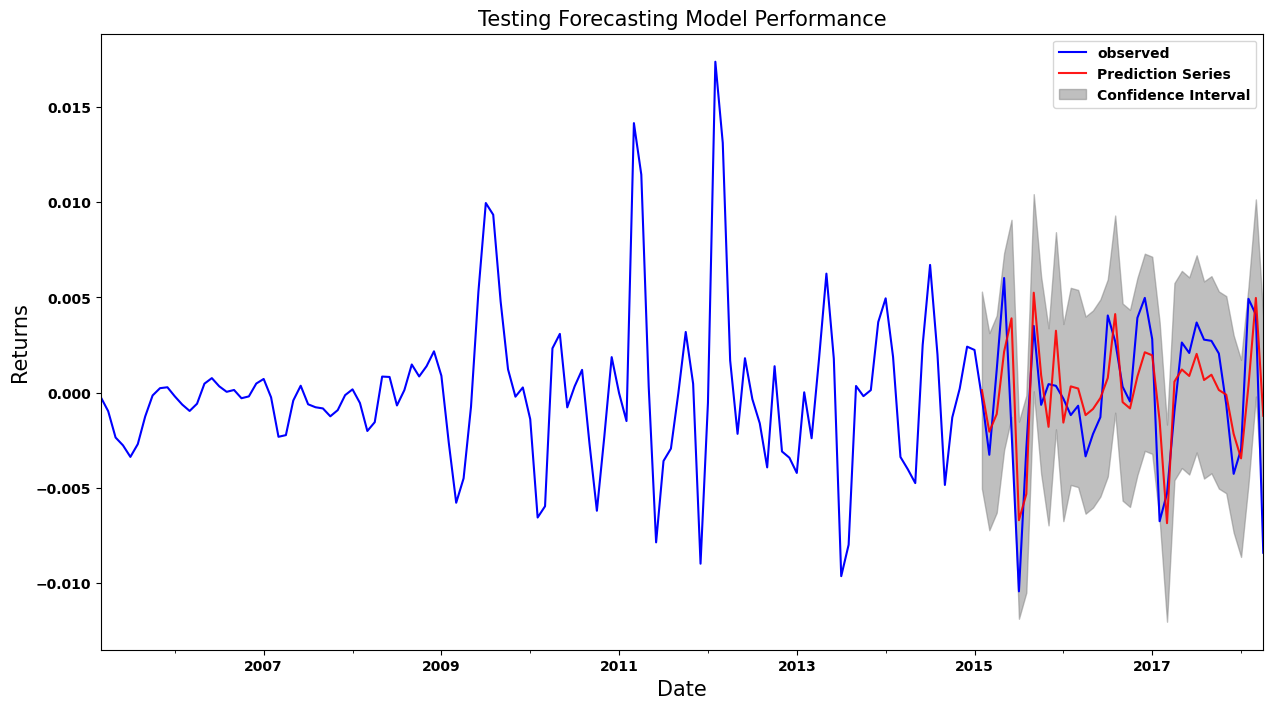

In [ ]:
# Plot real vs predicted values along with confidence interval

from matplotlib.pylab import rcParams
from sklearn.metrics import mean_squared_error
import numpy as np

rcParams['figure.figsize'] = 15, 8

zip_codes = ['11216', '11222', '15201', '94043', '94301']

# Loop through each zip code in the list
for zipcode in zip_codes:
    ts = globals()['ts_' + zipcode]  # Get the time series data

    # Plot observed values
    ax = ts.plot(label='observed', c="blue")

    # Plot predicted values
    pred.predicted_mean.plot(ax=ax, label='Prediction Series', alpha=0.9, c="red")

    # Plot the range for confidence intervals
    ax.fill_between(pred_conf.index,
                    pred_conf.iloc[:, 0],
                    pred_conf.iloc[:, 1], color='gray', alpha=0.5, label='Confidence Interval')

    # Set axes labels
    ax.set_xlabel('Date', fontsize=15)
    ax.set_ylabel('Returns', fontsize=15)
    ax.set_title('Testing Forecasting Model Performance', fontsize=15)
    plt.legend()

    # Calculate RMSE
    forecast_steps = 36  # Number of forecast steps (months from April 2018 to 2021)

    # Adjust the length of the test series and forecast series to match
    adjusted_test = ts[-forecast_steps:]
    adjusted_forecast = pred.predicted_mean[-forecast_steps:]

    rmse = np.sqrt(mean_squared_error(adjusted_test, adjusted_forecast))
    print(f"RMSE for Zip Code {zipcode}: {rmse:.2f}")

    plt.show()



> **6.3.1 Results of Baseline ARIMA Model on Test Data**

* The Root Mean Squared Error (RMSE) is a measure of the accuracy of a
  forecasting model. It quantifies the average magnitude of the differences
  between the predicted values and the actual observed values. In the context of the provided test set results:

* For Zip Code **11216**: The RMSE is 0.02. This indicates that, on average, the
 forecasted values differ from the actual values by approximately 0.02 units.

* For Zip Code **11222**: The RMSE is 0.01. This suggests that the forecasted  
 values are, on average, closer to the actual values with an average difference of around 0.01 units.

* For Zip Code **15201**: The RMSE is 0.01. Similar to the previous case, the
 forecasted values are quite accurate with an average difference of approximately 0.01 units from the actual values.

* For Zip Code **94043**: The RMSE is 0.00. This indicates that the forecasted
  values are almost exactly matching the actual values, resulting in an RMSE close to zero.

* For Zip Code **94301**: The RMSE is 0.00. Similar to the previous case, the
  forecasted values for this zip code are very accurate with an RMSE close to zero.

* In summary, lower RMSE values imply that the forecasting model's predictions
  are closer to the actual observed values, indicating higher accuracy and reliability in forecasting for the given zip codes.

### <a id='toc1_7_3'></a>[6.4 Model Evaluation](#toc0_)

In [ ]:
# #Getting the rmse for the model
# from sklearn.metrics import mean_squared_error as MSE
# MSE(test_94301,pred.predicted_mean,squared=False)

* This tells us that the monthly returns would be off by 0.0037% if this model is used. Which is a good thing since it is not off by much.

### <a id='toc1_7_4'></a>[Step 6.4 Forecasting For The Next 3 Years](#toc0_)

In [ ]:
# Plug the parameter values from our Auto ARIMA model into a new ARIMA model that fits the entire series.
from statsmodels.tsa.arima.model import ARIMA
ARIMA_MODEL = ARIMA(ts_94301,
                    order=(2,0,3),
                    enforce_stationarity=False,
                    enforce_invertibility=False)

# Fit the model and print results
full_output = ARIMA_MODEL.fit()

print(full_output.summary())

                               SARIMAX Results                                
Dep. Variable:                    ret   No. Observations:                  158
Model:                 ARIMA(2, 0, 3)   Log Likelihood                 694.919
Date:                Thu, 31 Aug 2023   AIC                          -1375.837
Time:                        02:50:26   BIC                          -1354.578
Sample:                    03-01-2005   HQIC                         -1367.202
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.286e-05      0.000      0.197      0.844      -0.000       0.000
ar.L1          0.2145      0.160      1.336      0.181      -0.100       0.529
ar.L2          0.0933      0.106      0.883      0.3

In [ ]:
# Getting a forecast for the next 36 months after the last recorded date on our dataset.
forecast = full_output.get_forecast(36)
future_prediction = forecast.conf_int()
future_prediction['Price'] = forecast.predicted_mean
future_prediction.columns = ['lower','upper','prediction']
future_prediction.head()

lower     upper  prediction
2018-05-01 -0.014199 -0.003895   -0.009047
2018-06-01 -0.006247  0.007766    0.000760
2018-07-01 -0.002849  0.011205    0.004178
2018-08-01 -0.006703  0.008696    0.000997
2018-09-01 -0.007100  0.008367    0.000633

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-260.762, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-246.550, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-247.520, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-255.910, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-248.532, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-261.387, Time=0.32 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-257.917, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-254.813, Time=0.33 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-258.855, Time=0.33 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-262.961, Time=0.31 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-261.558, Time=0.84 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-258.142, Time=0.69 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-261.862, Time=0.93 sec

Best model:  ARIMA(0,1,3)(0,0,0)[0] intercept
Total fit time: 4.606 seconds


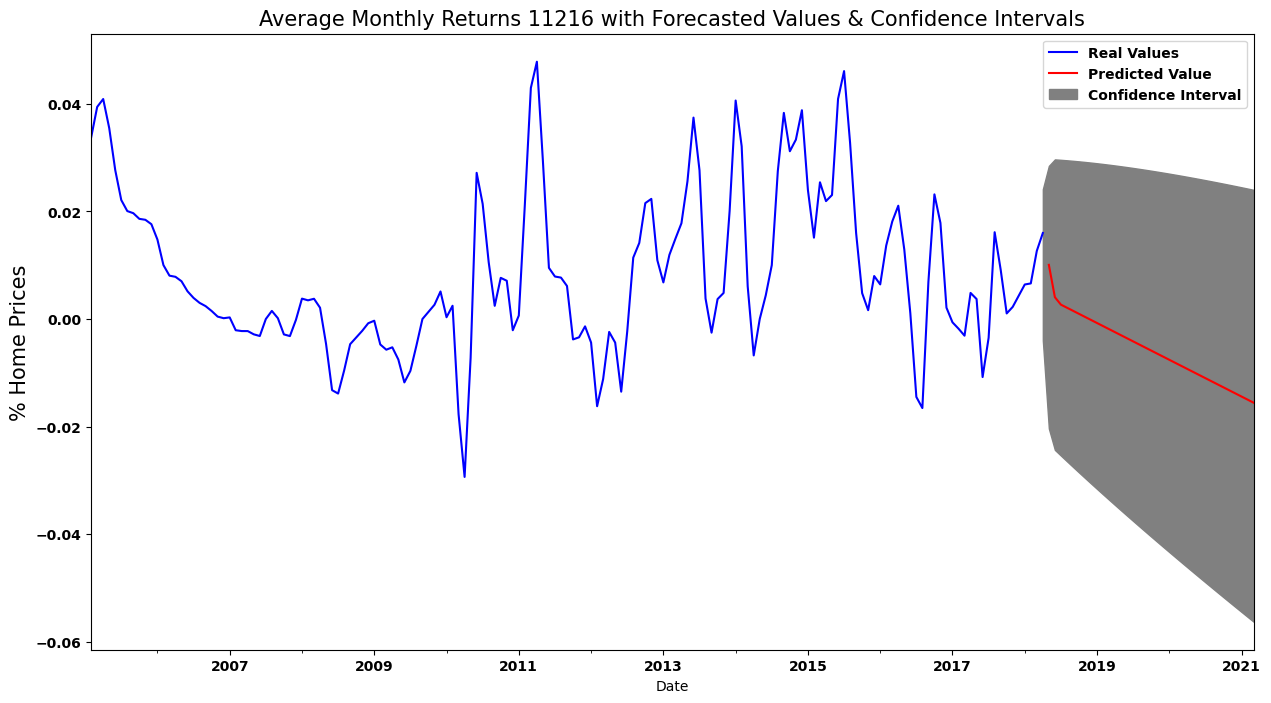

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-280.223, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-247.429, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-256.628, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-266.261, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-249.224, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-268.542, Time=0.23 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-272.991, Time=0.11 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-278.065, Time=0.90 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-274.957, Time=0.94 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-265.815, Time=0.62 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-283.324, Time=1.01 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.94 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-270.059, Time=0.53 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=-

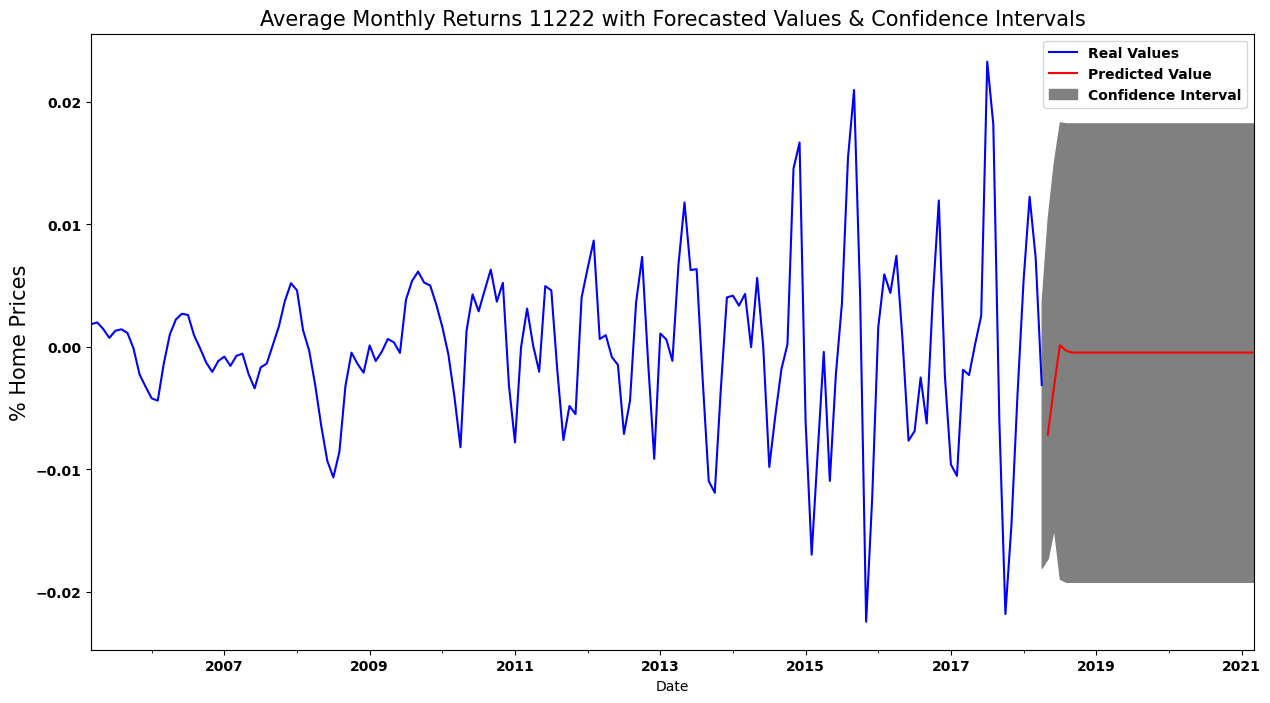

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-305.569, Time=1.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-278.513, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-285.162, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-297.959, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-280.503, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-296.999, Time=0.89 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-301.353, Time=0.24 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-303.879, Time=0.82 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-306.405, Time=1.26 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-307.824, Time=0.76 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-306.860, Time=0.46 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-295.995, Time=0.15 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-298.688, Time=0.18 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=-308.161, Time=0.27 sec
 ARIMA(0,0,5)(0,0,0)[0] intercept

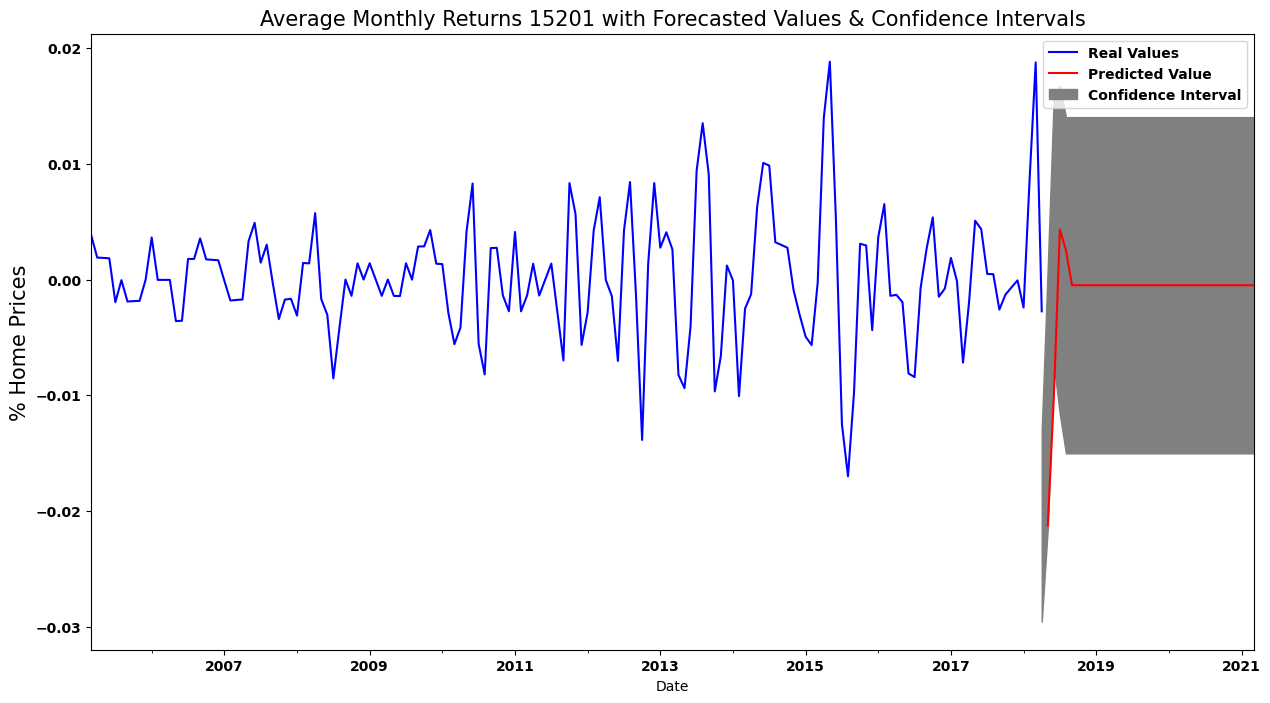

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-325.504, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-312.221, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-311.124, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-318.801, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-314.211, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-318.013, Time=0.32 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-324.285, Time=0.27 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-325.881, Time=0.30 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-323.605, Time=0.34 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-321.016, Time=0.37 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-322.328, Time=0.35 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-325.370, Time=0.28 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-321.754, Time=0.28 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=-318.910, Time=0.24 sec
 ARIMA(3,0,2)(0,0,0)[0]          

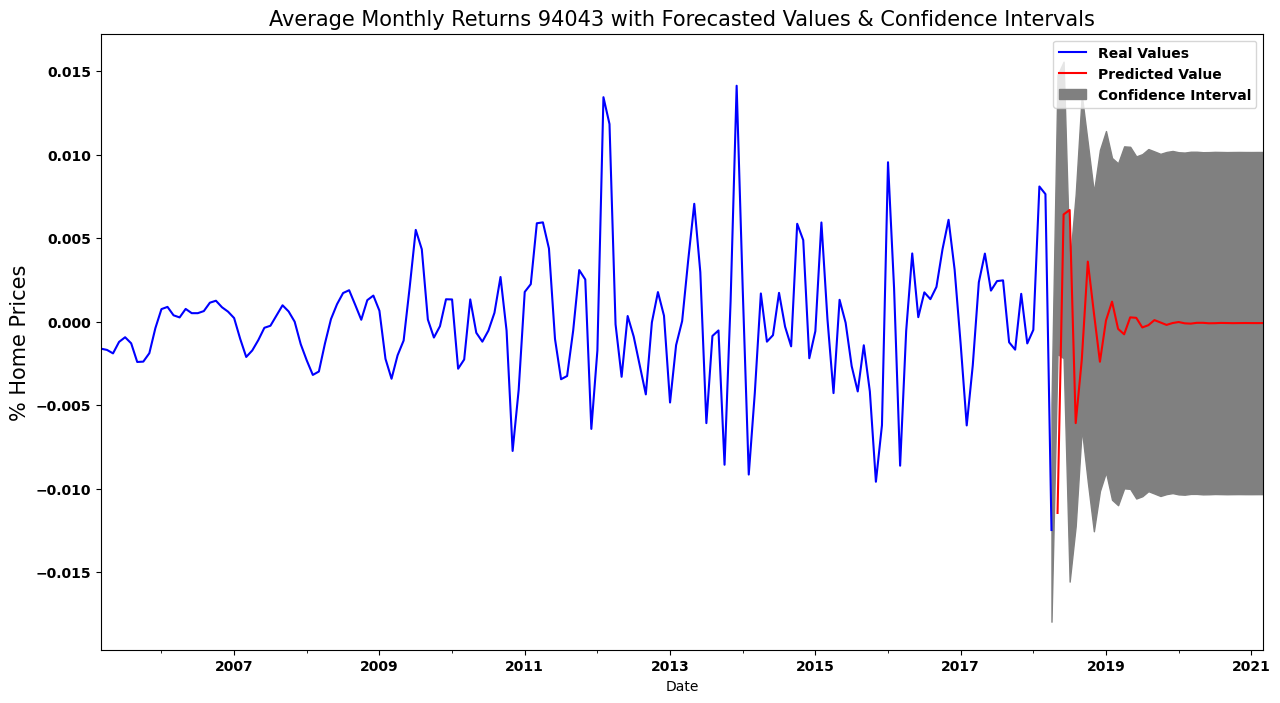

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-344.254, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-331.256, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-331.710, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-339.479, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-333.255, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-338.210, Time=0.27 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-345.991, Time=0.29 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-337.716, Time=0.34 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-346.113, Time=0.28 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-346.180, Time=0.21 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-344.499, Time=0.36 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-343.191, Time=0.30 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-342.176, Time=0.57 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-348.178, Time=0.26 sec
 ARIMA(2,0,0)(0,0,0)[0]          

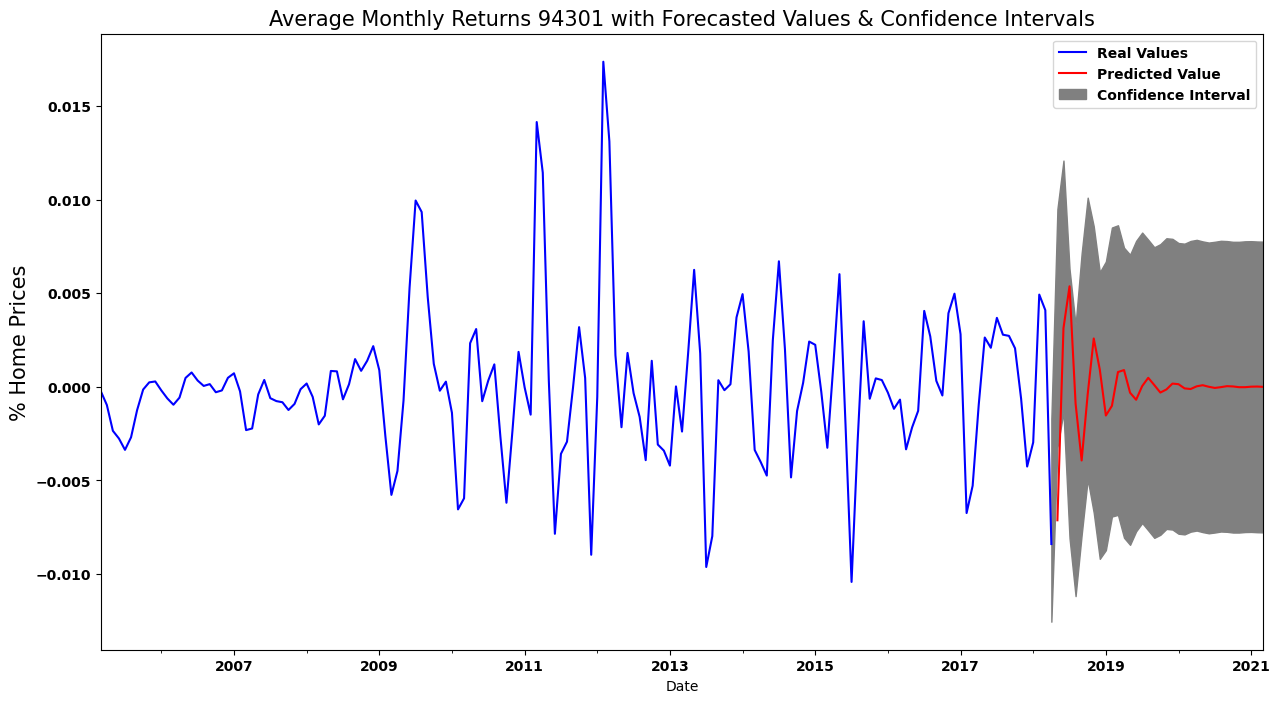

In [ ]:
#plotting the Forecasting

  # List of zip code time series data
zip_codes = ['11216', '11222', '15201', '94043', '94301']


  # Loop through each zip code in the list
for zipcode in zip_codes:
  ts = globals()['ts_' + zipcode]  # Get the time series data

      # Select data from 2015 onwards for training
  train_start = '2015-01-01'
  train = ts[train_start:]

      # Create and fit the ARIMA model using training data
  model = pm.auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

      # Forecast for the next 36 months (2018 to 2021)
  forecast_steps = 36
  forecast, conf_int = model.predict(n_periods=forecast_steps, return_conf_int=True)

      # Create an index for the forecast period
  forecast_index = pd.date_range(start=train.index[-1], periods=forecast_steps, freq=ts.index.freq)

      # Create a DataFrame for the forecasted values and confidence intervals
  future_prediction = pd.DataFrame({'prediction': forecast, 'lower': conf_int[:, 0], 'upper': conf_int[:, 1]}, index=forecast_index)

      # Plotting the forecasted values and confidence intervals
  fig, ax = plt.subplots()
  ts.plot(ax=ax, label='Real Values', c="blue")

  future_prediction['prediction'].plot(ax=ax, label='Predicted Value', c="red")

  ax.fill_between(x=future_prediction.index, y1=future_prediction['lower'],
                      y2=future_prediction['upper'], color='gray',
                      label='Confidence Interval')

  ax.legend()
  plt.ylabel("% Home Prices", fontsize=15)
  plt.title(f'Average Monthly Returns {zipcode} with Forecasted Values & Confidence Intervals', fontsize=15)
  plt.show()


* The future_prediction DataFrame contains information about forecasted values
  for the time series. The 'prediction' column represents the predicted mean values for each forecasted date.
* The 'lower' and 'upper' columns provide the lower and upper bounds of the
  confidence intervals, which indicate the range of uncertainty around the forecasted values.
* These forecasted values are based on the ARIMA model's estimates and are
  intended to provide insights into potential future trends in the time series.
  From the oservation in the graph above it can be noted that can focast the future prices.

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-246.550, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-251.496, Time=0.26 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-264.030, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-248.532, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=-255.910, Time=0.27 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=-260.791, Time=0.77 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=-261.717, Time=0.91 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=-259.757, Time=0.79 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=1.69 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=-253.534, Time=0.14 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=-262.185, Time=0.44 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=-265.047, Time=0.46 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=-257.917, Time=0.14 sec
 ARIMA(0,1,2)(1,0,1)[12] intercept   : AIC=-263.199, Time=0.61 sec
 ARIMA(0,1,2)(0,0,2)[12]

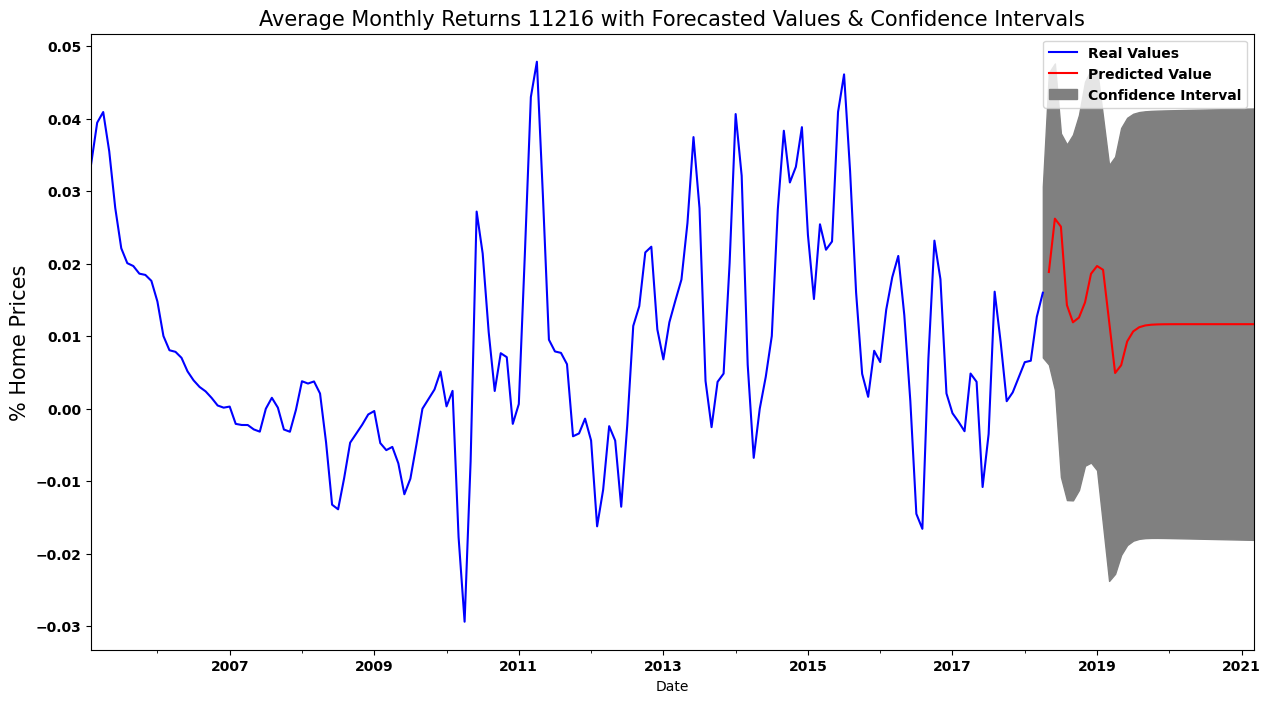

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-247.429, Time=0.09 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-260.824, Time=0.40 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-269.592, Time=0.77 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-249.224, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=-266.261, Time=0.50 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=-267.197, Time=1.08 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=-267.805, Time=1.04 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=-270.067, Time=0.61 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=-268.125, Time=0.84 sec
 ARIMA(0,0,1)(2,0,1)[12] intercept   : AIC=-266.074, Time=0.74 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=-254.743, Time=0.12 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=-268.653, Time=0.38 sec
 ARIMA(0,0,2)(1,0,0)[12] intercept   : AIC=-261.634, Time=0.22 sec
 ARIMA(1,0,2)(1,0,0)[12] intercept   : AIC=-272.799, Time=0.88 sec
 ARIMA(1,0,2)(0,0,0

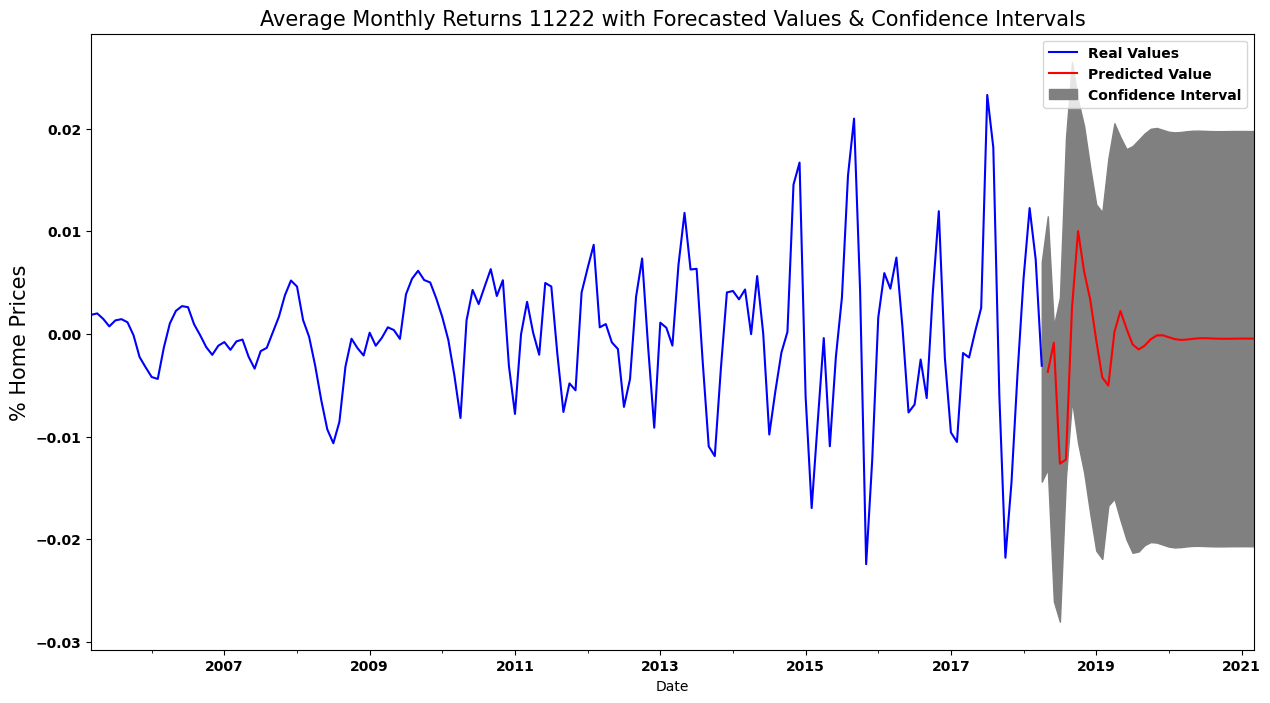

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-278.513, Time=0.05 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-283.598, Time=0.10 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-296.171, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-280.503, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=-297.959, Time=0.11 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=-296.176, Time=0.54 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=-294.174, Time=0.74 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=-296.540, Time=0.16 sec
 ARIMA(0,0,2)(0,0,0)[12] intercept   : AIC=-298.688, Time=0.42 sec
 ARIMA(0,0,2)(1,0,0)[12] intercept   : AIC=-289.061, Time=0.63 sec
 ARIMA(0,0,2)(0,0,1)[12] intercept   : AIC=-296.367, Time=0.84 sec
 ARIMA(0,0,2)(1,0,1)[12] intercept   : AIC=-294.662, Time=1.24 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=-296.999, Time=0.86 sec
 ARIMA(0,0,2)(0,0,0)[12]             : AIC=-300.618, Time=0.51 sec
 ARIMA(0,0,2)(1,0,0

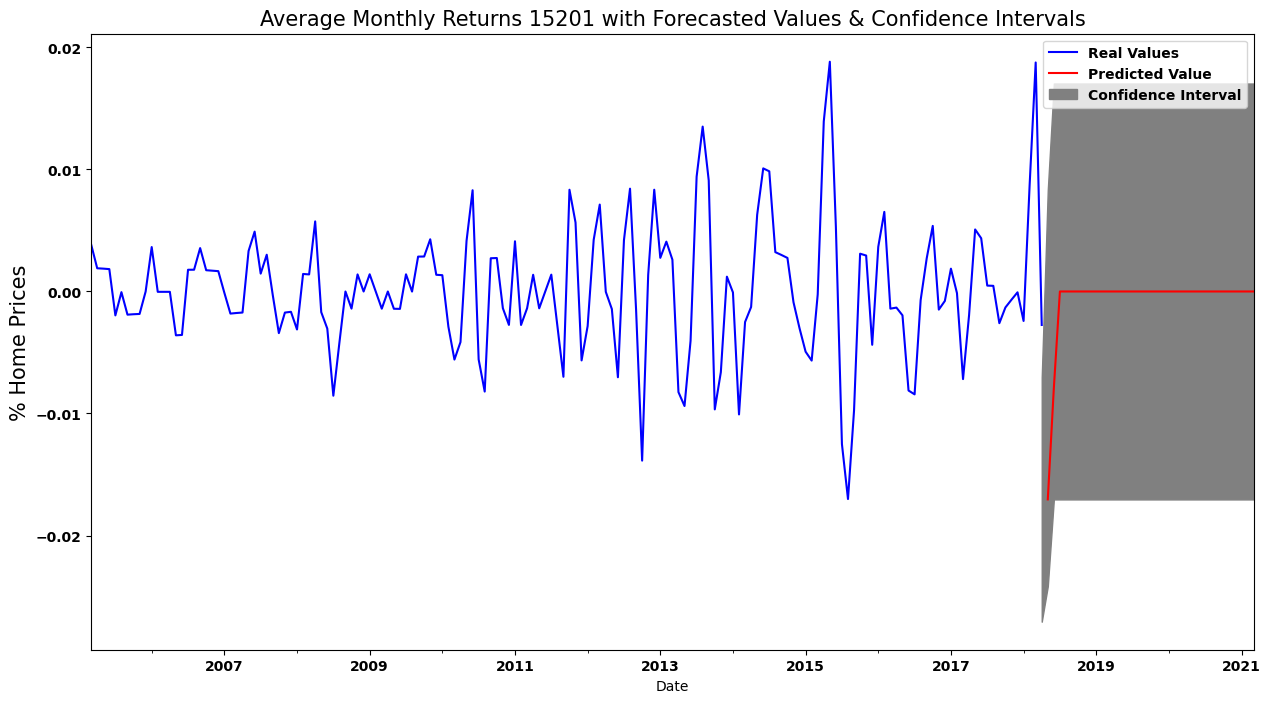

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-312.221, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-311.457, Time=0.32 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-318.177, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-314.211, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=-318.801, Time=0.07 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=-317.388, Time=0.29 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=-316.280, Time=0.38 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=-316.559, Time=0.15 sec
 ARIMA(0,0,2)(0,0,0)[12] intercept   : AIC=-319.146, Time=0.22 sec
 ARIMA(0,0,2)(1,0,0)[12] intercept   : AIC=-316.036, Time=0.26 sec
 ARIMA(0,0,2)(0,0,1)[12] intercept   : AIC=-319.489, Time=0.35 sec
 ARIMA(0,0,2)(1,0,1)[12] intercept   : AIC=-317.308, Time=0.43 sec
 ARIMA(0,0,2)(0,0,2)[12] intercept   : AIC=-315.572, Time=0.56 sec
 ARIMA(0,0,2)(1,0,2)[12] intercept   : AIC=-316.043, Time=1.34 sec
 ARIMA(1,0,2)(0,0,1

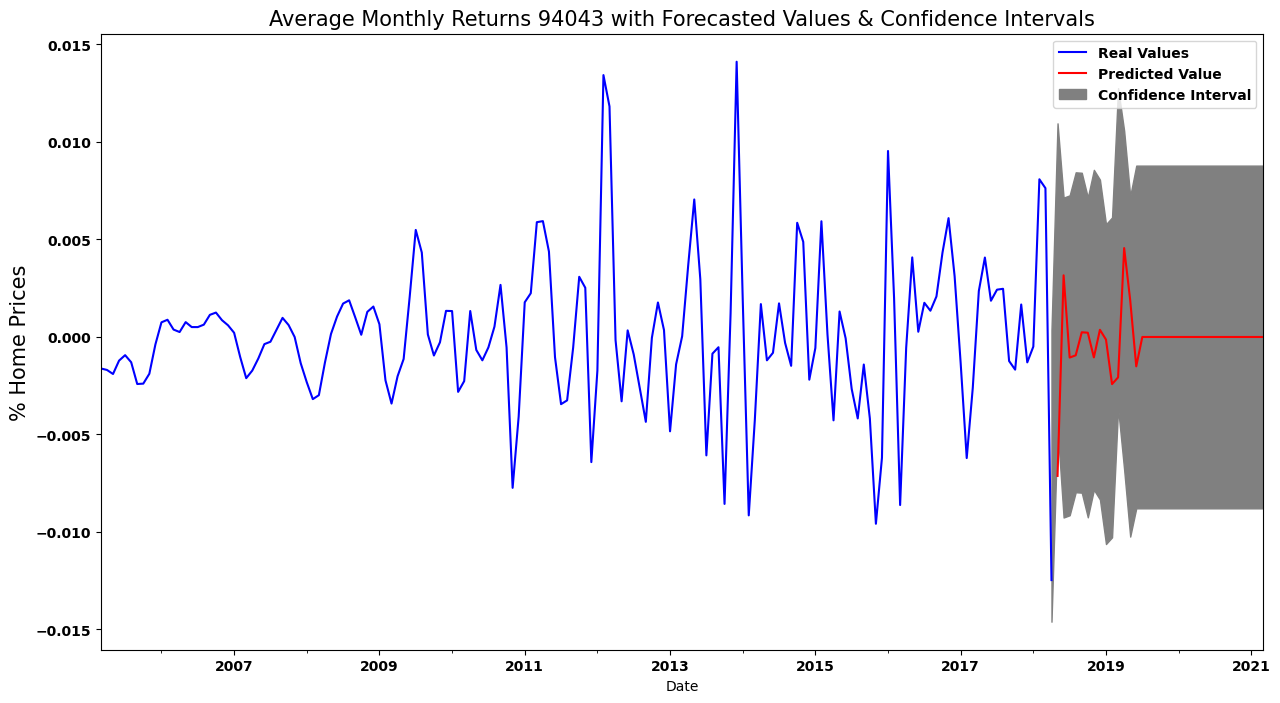

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-331.256, Time=0.10 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-333.571, Time=0.58 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-338.773, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-333.255, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=-339.479, Time=0.08 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=-338.910, Time=0.18 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=-336.949, Time=0.31 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=-337.716, Time=0.15 sec
 ARIMA(0,0,2)(0,0,0)[12] intercept   : AIC=-337.649, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=-331.710, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=-338.210, Time=0.22 sec
 ARIMA(0,0,1)(0,0,0)[12]             : AIC=-341.451, Time=0.05 sec
 ARIMA(0,0,1)(1,0,0)[12]             : AIC=-340.871, Time=0.32 sec
 ARIMA(0,0,1)(0,0,1)[12]             : AIC=-340.729, Time=0.14 sec
 ARIMA(0,0,1)(1,0,1

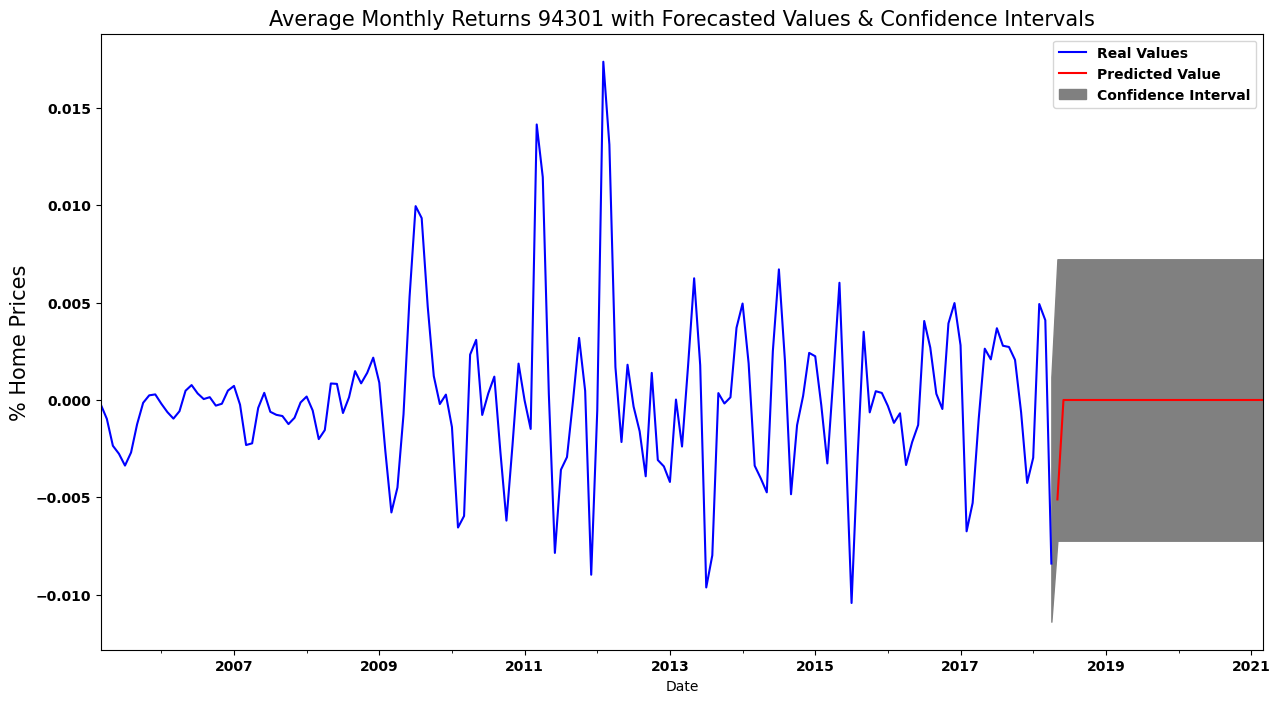

In [ ]:
#Hyper parameter tunning.


# List of zip code time series data
zip_codes = ['11216', '11222', '15201', '94043', '94301']

# Loop through each zip code in the list
for zipcode in zip_codes:
    ts = globals()['ts_' + zipcode]  # Get the time series data

    # Select data from 2015 onwards for training
    train_start = '2015-01-01'
    train = ts[train_start:]

    # Tune ARIMA model parameters using grid search
    model = pm.auto_arima(train,
                          trace=True,            # Print debugging information
                          error_action='ignore', # Skip models that fail
                          suppress_warnings=True, # Ignore warning messages
                          seasonal=True,         # Consider seasonal models
                          m=12,                  # Set the seasonal frequency (monthly data)
                          start_p=0,             # Minimum value of p
                          start_d=1,             # Minimum value of d
                          start_q=0,             # Minimum value of q
                          max_p=2,               # Maximum value of p
                          max_d=2,               # Maximum value of d
                          max_q=2,               # Maximum value of q
                          start_P=0,             # Minimum value of P
                          start_D=1,             # Minimum value of D
                          start_Q=0,             # Minimum value of Q
                          max_P=2,               # Maximum value of P
                          max_D=2,               # Maximum value of D
                          max_Q=2,               # Maximum value of Q
                          seasonal_test='ch')    # Use the Canova-Hansen test for seasonality

    # Forecast for the next 36 months (2018 to 2021)
    forecast_steps = 36
    forecast, conf_int = model.predict(n_periods=forecast_steps, return_conf_int=True)

    # Create an index for the forecast period
    forecast_index = pd.date_range(start=train.index[-1], periods=forecast_steps, freq=ts.index.freq)

    # Create a DataFrame for the forecasted values and confidence intervals
    future_prediction = pd.DataFrame({'prediction': forecast, 'lower': conf_int[:, 0], 'upper': conf_int[:, 1]}, index=forecast_index)

    # Plotting the forecasted values and confidence intervals
    fig, ax = plt.subplots()
    ts.plot(ax=ax, label='Real Values', c="blue")

    future_prediction['prediction'].plot(ax=ax, label='Predicted Value', c="red")

    ax.fill_between(x=future_prediction.index, y1=future_prediction['lower'],
                    y2=future_prediction['upper'], color='gray',
                    label='Confidence Interval')

    ax.legend()
    plt.ylabel("% Home Prices", fontsize=15)
    plt.title(f'Average Monthly Returns {zipcode} with Forecasted Values & Confidence Intervals', fontsize=15)
    plt.show()


**Grid search hyperparameter tunning**



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-266.257, Time=0.81 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-246.550, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-251.496, Time=0.22 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-264.030, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-248.532, Time=0.03 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=-268.683, Time=0.64 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=-260.762, Time=0.38 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=-266.901, Time=1.25 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-264.683, Time=0.68 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=-265.500, Time=1.27 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=-266.350, Time=0.82 sec
 ARIMA(2,1,1)(0,0,1)[12] intercept   : AIC=-264.291, Time=1.08 sec
 ARIMA(3,1,2)(0,0,1)[12] intercept   : AIC=-266.064, Time=1.59 sec
 ARIMA(2,1,3)(0,0,1)[12] intercept   : AIC=-265.727, Time=0.94 sec
 ARIMA(1,1,1)(0,0,1

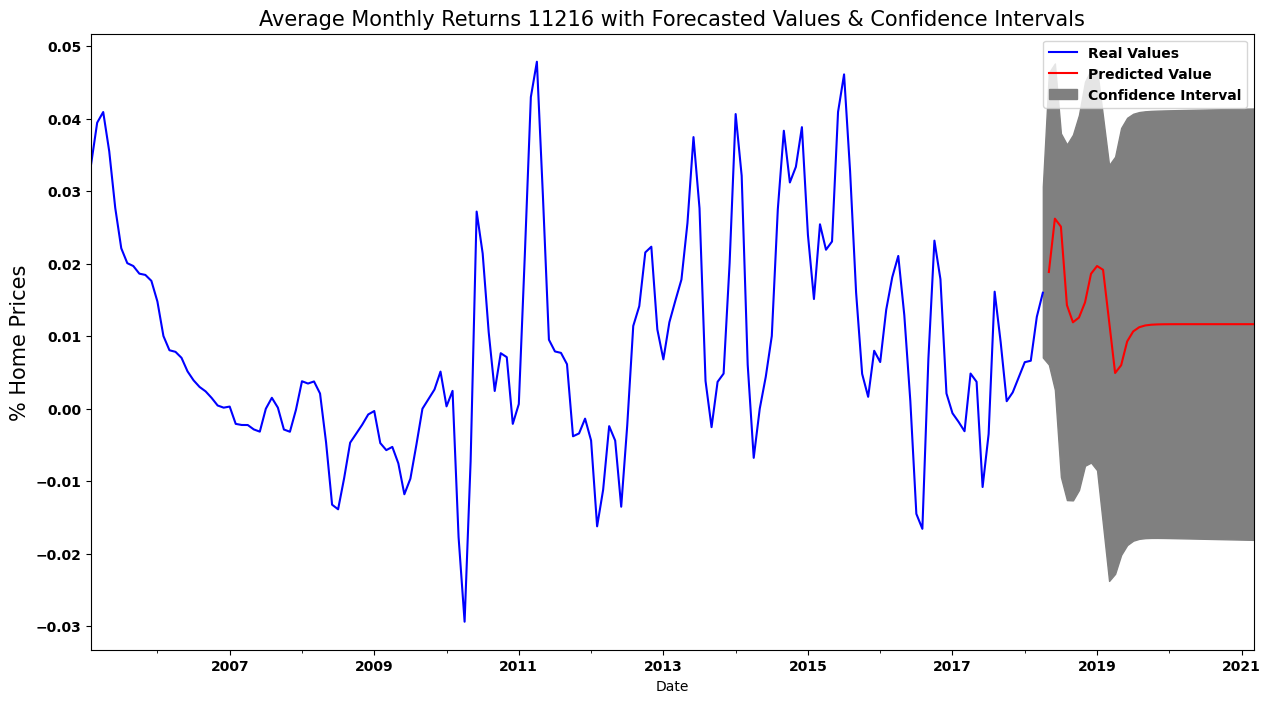

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=-275.309, Time=0.78 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-247.429, Time=0.05 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-260.824, Time=0.21 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-269.592, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-249.224, Time=0.04 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=-281.465, Time=0.51 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=-280.223, Time=0.27 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=-279.171, Time=0.97 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=-279.726, Time=0.71 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=-276.711, Time=1.55 sec
 ARIMA(1,0,2)(0,0,1)[12] intercept   : AIC=inf, Time=1.09 sec
 ARIMA(2,0,1)(0,0,1)[12] intercept   : AIC=-274.608, Time=2.48 sec
 ARIMA(3,0,2)(0,0,1)[12] intercept   : AIC=-278.311, Time=0.58 sec
 ARIMA(2,0,3)(0,0,1)[12] intercept   : AIC=-280.958, Time=0.59 sec
 ARIMA(1,0,1)(0,0,1)[12]

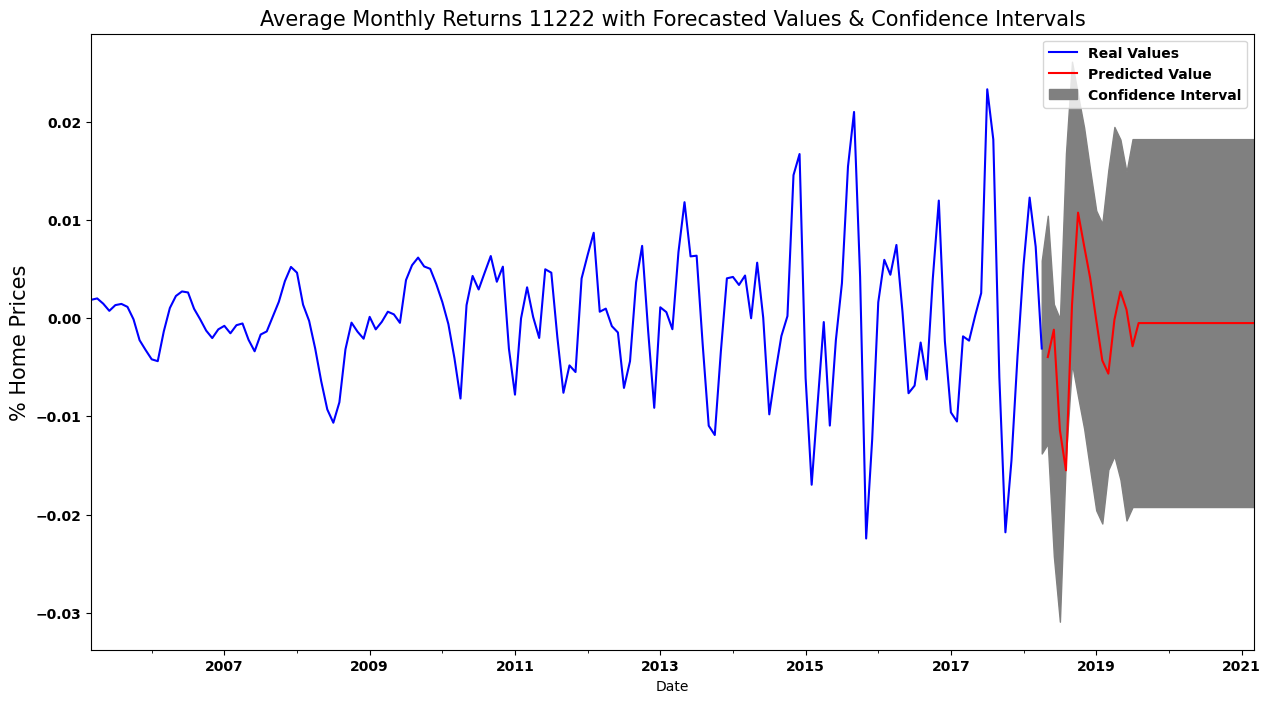

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=-301.507, Time=0.88 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-278.513, Time=0.07 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-283.598, Time=0.07 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-296.171, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-280.503, Time=0.03 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=-303.557, Time=0.46 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=-305.569, Time=0.29 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=-303.836, Time=0.44 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=-296.999, Time=0.24 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=-301.353, Time=0.11 sec
 ARIMA(3,0,2)(0,0,0)[12] intercept   : AIC=-303.879, Time=0.31 sec
 ARIMA(2,0,3)(0,0,0)[12] intercept   : AIC=-306.405, Time=0.28 sec
 ARIMA(2,0,3)(1,0,0)[12] intercept   : AIC=-304.511, Time=0.65 sec
 ARIMA(2,0,3)(0,0,1)[12] intercept   : AIC=-304.418, Time=0.65 sec
 ARIMA(2,0,3)(1,0,1

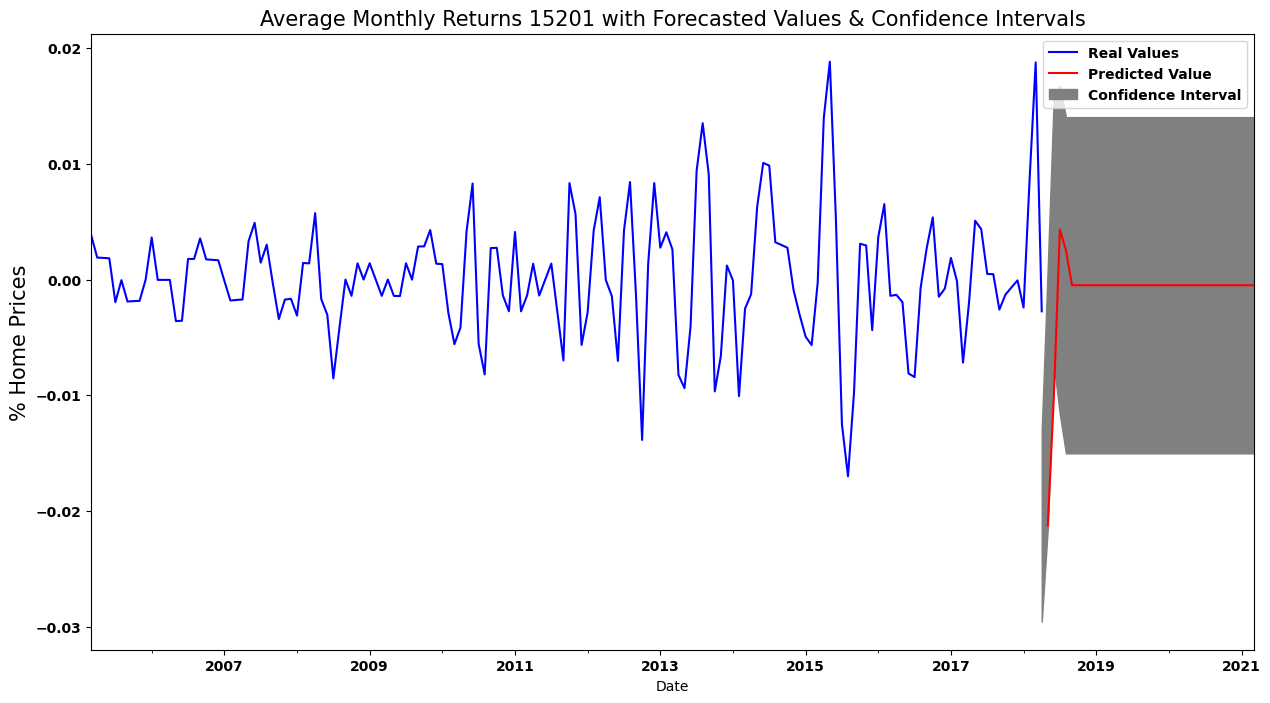

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=-322.014, Time=2.12 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-312.221, Time=0.11 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-311.457, Time=0.84 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-318.177, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-314.211, Time=0.07 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=-324.125, Time=1.87 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=-325.504, Time=0.83 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=-323.823, Time=1.73 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=-318.013, Time=0.29 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=-324.285, Time=0.25 sec
 ARIMA(3,0,2)(0,0,0)[12] intercept   : AIC=-325.881, Time=0.32 sec
 ARIMA(3,0,2)(1,0,0)[12] intercept   : AIC=-322.517, Time=0.64 sec
 ARIMA(3,0,2)(0,0,1)[12] intercept   : AIC=-322.591, Time=0.58 sec
 ARIMA(3,0,2)(1,0,1)[12] intercept   : AIC=-320.049, Time=0.43 sec
 ARIMA(3,0,1)(0,0,0

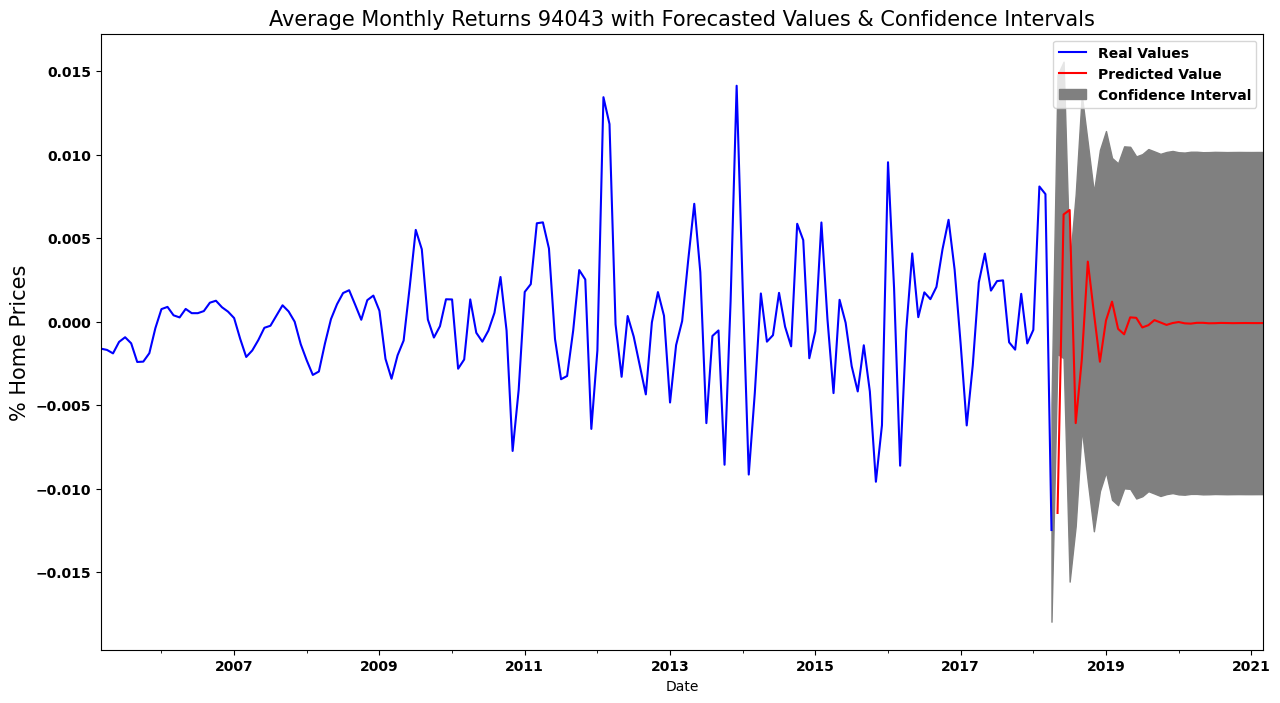

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=-341.505, Time=0.69 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-331.256, Time=0.05 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-333.571, Time=0.27 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-338.773, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-333.255, Time=0.03 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=-342.254, Time=0.41 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=-344.254, Time=0.11 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=-343.514, Time=0.53 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=-338.210, Time=0.20 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=-345.991, Time=0.15 sec
 ARIMA(2,0,1)(1,0,0)[12] intercept   : AIC=-344.327, Time=0.60 sec
 ARIMA(2,0,1)(0,0,1)[12] intercept   : AIC=-344.299, Time=0.52 sec
 ARIMA(2,0,1)(1,0,1)[12] intercept   : AIC=-342.191, Time=0.55 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=-337.716, Time=0.14 sec
 ARIMA(2,0,0)(0,0,0

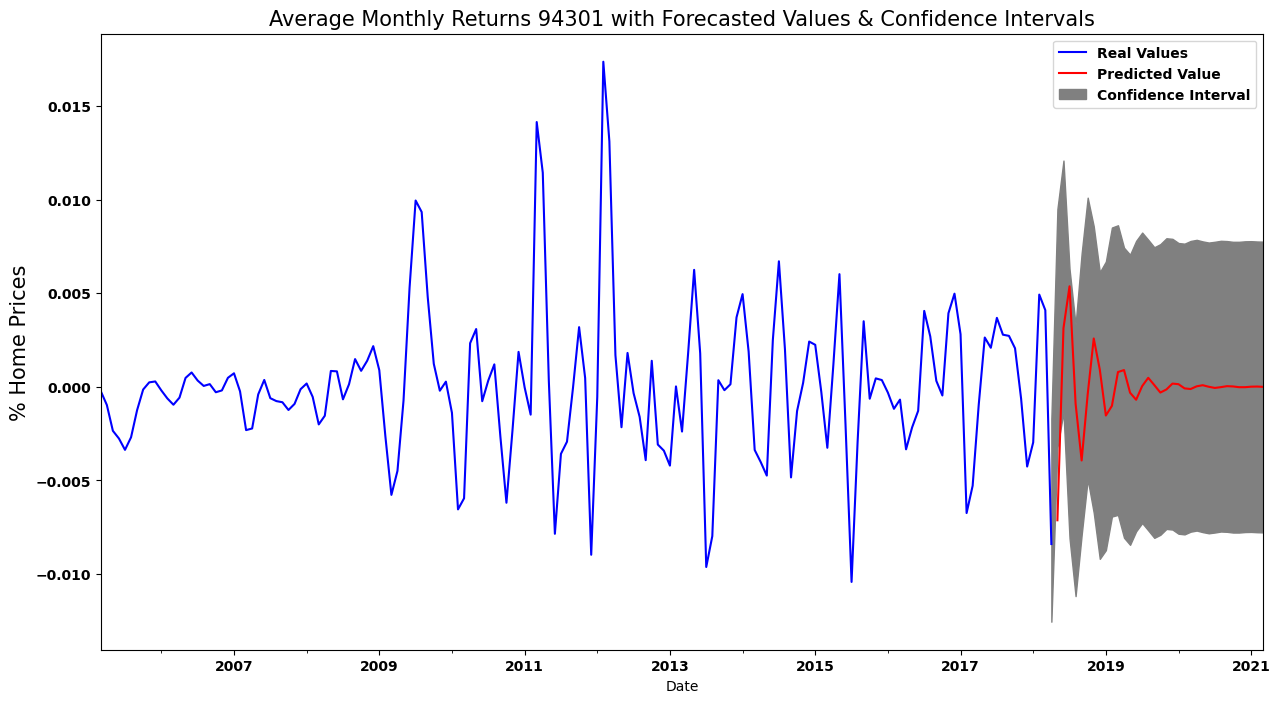

In [ ]:
# Performing gridsearch parameter tunning


# List of zip code time series data
zip_codes = ['11216', '11222', '15201', '94043', '94301']

# Define parameter grid for grid search
param_grid = {
    'order': [(1, 1, 1), (1, 1, 2), (2, 1, 1), (2, 1, 2)],  # p, d, q values
    'seasonal_order': [(0, 1, 1, 12), (0, 1, 2, 12), (1, 1, 1, 12), (1, 1, 2, 12)],  # P, D, Q, S values
}

# Loop through each zip code in the list
for zipcode in zip_codes:
    ts = globals()['ts_' + zipcode]  # Get the time series data

    # Select data from 2015 onwards for training
    train_start = '2015-01-01'
    train = ts[train_start:]

    # Perform grid search for best parameters using auto_arima
    best_model = pm.auto_arima(train,
                               seasonal=True,
                               m=12,  # Monthly seasonal pattern
                               stepwise=True,
                               suppress_warnings=True,
                               error_action='ignore',
                               trace=True)

    # Forecast for the next 36 months (2018 to 2021) using the best model
    forecast_steps = 36
    forecast, conf_int = best_model.predict(n_periods=forecast_steps, return_conf_int=True)

    # Create an index for the forecast period
    forecast_index = pd.date_range(start=train.index[-1], periods=forecast_steps, freq=ts.index.freq)

    # Create a DataFrame for the forecasted values and confidence intervals
    future_prediction = pd.DataFrame({'prediction': forecast, 'lower': conf_int[:, 0], 'upper': conf_int[:, 1]}, index=forecast_index)

    # Plotting the forecasted values and confidence intervals
    fig, ax = plt.subplots()
    ts.plot(ax=ax, label='Real Values', c="blue")

    future_prediction['prediction'].plot(ax=ax, label='Predicted Value', c="red")

    ax.fill_between(x=future_prediction.index, y1=future_prediction['lower'],
                    y2=future_prediction['upper'], color='gray',
                    label='Confidence Interval')

    ax.legend()
    plt.ylabel("% Home Prices", fontsize=15)
    plt.title(f'Average Monthly Returns {zipcode} with Forecasted Values & Confidence Intervals', fontsize=15)
    plt.show()


### <a id='toc1_7_5'></a>[Step 6.5 Forecasting for Every Zipcode](#toc0_)

In [ ]:
zip_predictions = {}

# Creating a for loop to forecast for every zipcode
for i in range(len(df_ts)):

    # selecting every individual series
    series = df_ts[i]["Price"]

    #Only taking data from 2011 onwards to more accurately reflect current market conditions
    recent_series = series['2011':]

    # Splitting the last 36 months of our series as a test dataset.
    train_series = recent_series[:'2016-04']
    test_series = recent_series['2016-05':]

    #Auto ARIMA model
    auto_model = pm.auto_arima(train_series,
                     trace=True,
                     error_action= 'ignore',
                     suppress_warnings=True,
                     stepwise=True,with_intercept=False)

    # Plug the optimal parameter values for our Training data into a SARIMAX model that fits our entire series.
    ARIMA_MODEL = SARIMAX(recent_series,
                          order= auto_model.order,
                          seasonal_order= auto_model.seasonal_order,
                          enforce_stationarity=False,
                          enforce_invertibility=False)

    # Fit the model and print results
    output = ARIMA_MODEL.fit()

    ## Getting a forecast for the next 36 months after the last absrecorded date on our dataset.
    forecast = output.get_forecast(36)
    prediction = forecast.conf_int()
    prediction['Price'] = forecast.predicted_mean
    prediction.columns = ['lower','upper','prediction']

    #Adding the Zipcode's ROI to the zip_predictions dictionary
    zip_predictions[df_ts[i]["Zipcode"].unique()[0]] = ((prediction['prediction'][-1])- (series[-1]))/ (series[-1])

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.30 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1282.377, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1286.077, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=1286.601, Time=0.07 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1289.190, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=1284.075, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.495 seconds
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.30 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1318.385, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1319.761, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=1321.654, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1323.825, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=1320.293, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fi

* The goal of this process is to identify the ARIMA model with the lowest AIC
  value, which generally represents a good trade-off between model fit and complexity. However, please note that AIC alone may not be the only criterion for selecting the best model; you should also consider other factors such as model diagnostics, validation, and domain knowledge.
  
From the above analysis we noted that;

* For Zip Code 11216: Best ARIMA Model Order - ARIMA(0,2,0)(0,0,0)[0]
* For Zip Code 11222: Best ARIMA Model Order - ARIMA(0,2,0)(0,0,0)[0]
* For Zip Code 15201: Best ARIMA Model Order - ARIMA(0,2,0)(0,0,0)[0]
* For Zip Code 94043: Best ARIMA Model Order - ARIMA(0,2,0)(0,0,0)[0]
* For Zip Code 94301: Best ARIMA Model Order - ARIMA(1,1,1)(0,0,0)[0] intercept

* These specific ARIMA model orders were selected as they achieved the lowest
  AIC values among the evaluated options for each respective zip code. These orders encapsulate the autoregressive (AR), differencing (I), and moving average (MA) components of the ARIMA model, along with any seasonal components denoted by (p, d, q)(P, D, Q)s. This rigorous selection process aims to ensure that the chosen models strike a balance between fitting accuracy and simplicity, thus making them well-suited for future price forecasting tasks.

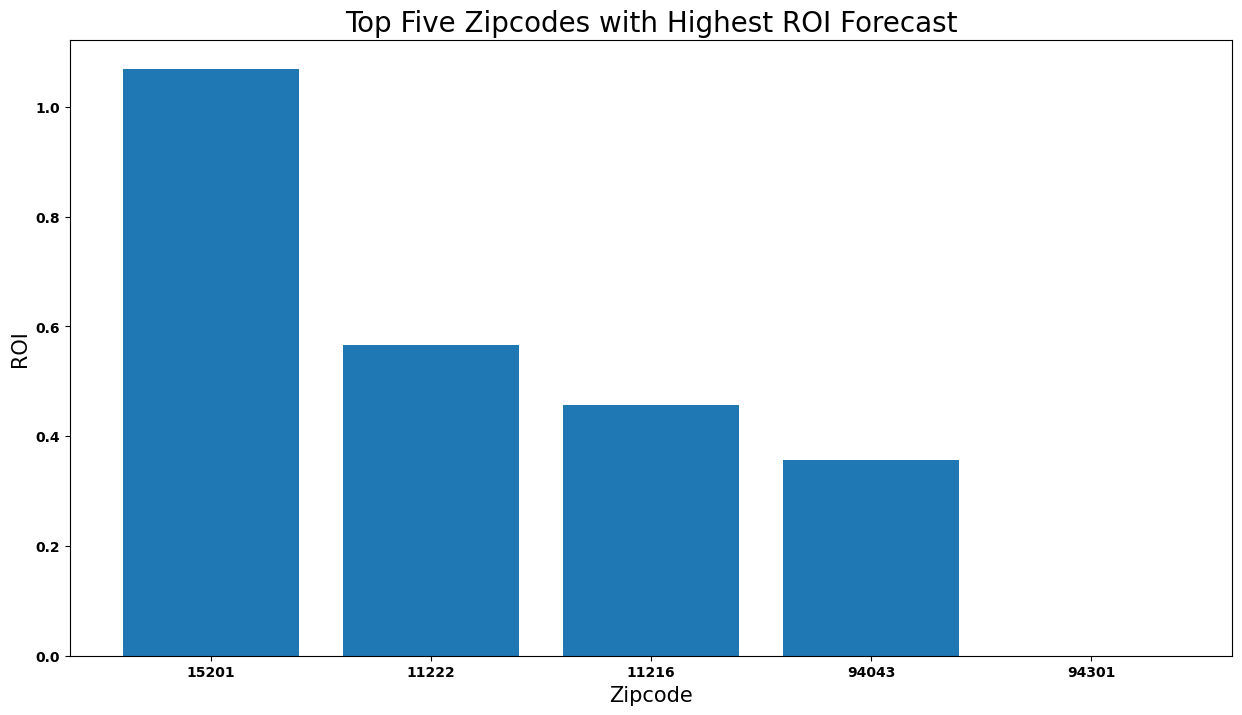

In [ ]:
# Get the top five zipcodes with the highest ROI
top_zipcodes = sorted(zip_predictions, key=zip_predictions.get, reverse=True)[:5]

# Create a list of ROI values for the top five zipcodes
roi_values = [zip_predictions[zipcode] for zipcode in top_zipcodes]

# Create a bar graph of the top five zipcodes and their corresponding ROI values
plt.bar(top_zipcodes, roi_values)
plt.xlabel('Zipcode',fontsize=15)
plt.ylabel('ROI',fontsize=15)
plt.title('Top Five Zipcodes with Highest ROI Forecast',fontsize=20)
plt.show()


* From the above graph the zipcode of 15201 has the highest ROI forecast so it
  would be beneficial if the investor invested in this zipcode.

In [ ]:
zip_roi_dict = {zipcode: zip_predictions[zipcode] for zipcode in top_zipcodes}

# Convert the dictionary to a pandas dataframe and sort it by ROI values in descending order
zip_roi_df = pd.DataFrame.from_dict(zip_roi_dict, orient='index', columns=['% ROI'])
zip_roi_df = zip_roi_df.sort_values(by='% ROI', ascending=False)

# Print the dataframe
zip_roi_df.index.name = "Zipcode"

In [ ]:
zip_roi_df

% ROI
Zipcode          
15201    1.069114
11222    0.566847
11216    0.457121
94043    0.356641
94301    0.000000

* Based on the above graph and computed percentages, 15201 have 106%, 11222 have 56.7%, 11216 have 45.7% and 94043 have 35.7% of returns. All the Zipcodes have an encouraging predicted price seeing as they are in the positive apart from the 94301 zipcode.

* Based on the above graph, we can conclude our top five recommendations and
 their expected ROI after three years.

* The investor can then decide to invest in any of the above zipcodes apart  
  from 94301 which does not have a positive return on investment.

In [ ]:
#Generating the zipcodes county and state
zip_codes = ['15201', '11222', '11216', '94043', '94301']

# Filter the data for the specified zip codes
filtered_data = data[data['Zipcode'].isin(zip_codes)]

# Create a dictionary to store zipcode: state: county pairs
zip_state_county = {}

# Iterate through the filtered data and populate the dictionary
for index, row in filtered_data.iterrows():
    zipcode = row['Zipcode']
    state = row['State']
    county = row['CountyName']
    zip_state_county[zipcode] = f"{state}: {county}"

# Print the formatted output
for zipcode, location in zip_state_county.items():
    print(f"{zipcode}: {location}")


11216: NY: Kings
11222: NY: Kings
94043: CA: Santa Clara
94301: CA: Santa Clara
15201: PA: Allegheny


## <a id='toc1_8_'></a>[Step 7.Conclusion ](#toc0_)



**Comparative Analysis of the Forecasting Models**

The analysis presented a comprehensive comparison of three forecasting models:  Autoregressive Integrated Moving Average (SARIMA), and Baseline ARIMA.
Each model was assessed based on their predictive performance, statistical significance of coefficients, and alignment with historical trends.
Below is a summary of the findings:

**Baseline ARIMA Model:**

The Baseline ARIMA model demonstrated strong predictive performance with remarkably low Mean Squared Error (MSE) values for both the training and test datasets.
Despite the promising results, there are indications of potential overfitting, as the models performed significantly better on the training data compared to the test data.
The alignment between actual and predicted values was visually evident in the closely overlapping line graphs.
The model's ability to capture and reproduce historical trends showcased its effectiveness.

**Sarima model:**

The SARIMA models displayed competitive predictive performance, with relatively low MSE values across the test dataset.
Each SARIMA model's parameter configuration was chosen to strike a balance between fitting and model simplicity.
Notably, some p-values exceeded the significance threshold, indicating potential limitations in capturing certain variations.
Despite these limitations, the SARIMA models effectively aligned with historical trends and provided insightful forecasts.

* Based on the models the best five zipe codes were identified as ;
1. **11216**: NY: Kings
2. **11222**: NY: Kings
3. **94043**: CA: Santa Clara
4. **94301**: CA: Santa Clara
5. **15201**: PA: Allegheny

In conclusion, all two models showcased valuable forecasting capabilities with their unique strengths and limitations.
The Baseline ARIMA, Tuned ARIMA, and SARIMA models excelled in capturing temporal dependencies. Although the model's forecasting may have been affected by other limitations.

## <a id='toc1_10_'></a>[Step 9.Recommendations ](#toc0_)


* Based on the comprehensive analysis conducted using the provided dataset and
  considering the states of Pennsylvania, Carlifonia, and New york, below are some key recommendations:

* Consider Diversification: While all the analyzed states exhibit favorable
  investment opportunities, consider diversifying the investment portfolio  across multiple states. This approach can help mitigate risk and capture various market dynamics.

* Explore South Carolina: Given the higher volume of data originating from      South Carolina and the presence of two distinct cities (Greenville and
 Florence), exploring properties in this state could provide a stable investment environment.

* ROI as a Key Indicator: Return on Investment (ROI) is a critical metric for
 evaluating the potential profitability of investments. Focus on cities with higher ROI figures, as they indicate efficient investment opportunities. Kings, Santa Clara, and Allegheny stand out with robust ROI values.

* Risk Assessment: Take into consideration the Coefficient of Variation (CV) to assess investment risk. Lower CV values, like that of Greenville, indicate a more stable investment environment. Balancing ROI with risk is crucial for informed decision-making.

* Location Matters: Consider the city's unique characteristics, development
  prospects, and economic growth when making investment decisions. Evaluate factors like infrastructure, amenities, and potential for future demand.
  
In conclusion, Diversification, ROI analysis, risk assessment, and careful consideration of each city's unique attributes are crucial when making real estate investment decisions.

## <a id='toc1_9_'></a>[Step 8.Limitations ](#toc0_)


* Our model was delimited by overfitting wich may have caused our forecasting slightly deviate from the correct forecasting.


## **Next Steps**


* An external dataset with economic indicators can be integrated, to provide a
  holistic view of factors influencing housing prices.
* Augmenting the dataset with additional variables that might influence housing
  prices, such as interest rates, unemployment rates, or local economic indicators. This could improve the predictive accuracy of the choosen model.
  Housing market trends can change due to various unforeseen factors (e.g., economic downturns, pandemics, policy changes).
  
* To explore other tunimg techniques to improve on performance of the model.

